In [1]:
#Imports lib
from scipy.stats import pearsonr
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plt2
import seaborn as sns

In [2]:
#Import CSV 
Funct_Assays = pd.read_csv("/home/jjimenez/Desktop/FunctionalAssays/functionalAssays1.csv") 

In [3]:
#Visualize groups 
Funct_Assays.groupby('dms_id').size()

dms_id
Brca1_E3          4872
Brca1_Y2H         1748
E1_Ubiquitin      1085
E3_ligase          899
PSD95pdz3         1577
Pab1              1188
Ubiquitin         1249
WW_domain          363
beta-lactamase    5198
gb1               1045
hsp90             4021
kka2_1:2          5300
dtype: int64

In [4]:
#Take a group ID and save it to CSV
Brca1_E3 = Funct_Assays[(Funct_Assays.dms_id=='Brca1_E3')]
brac1_e3 = Brca1_E3.drop([Brca1_E3.columns[0]], axis = 'columns')
del Brca1_E3

Brca1_Y2H = Funct_Assays[(Funct_Assays.dms_id=='Brca1_Y2H')]
brac1_y2h = Brca1_Y2H.drop([Brca1_Y2H.columns[0]], axis = 'columns')
del Brca1_Y2H

E1_ubiquitin = Funct_Assays[(Funct_Assays.dms_id=='E1_Ubiquitin')]
e1_ubiquitin = E1_ubiquitin.drop([E1_ubiquitin.columns[0]], axis = 'columns')
del E1_ubiquitin

E3_ligase = Funct_Assays[(Funct_Assays.dms_id=='E3_ligase')]
e3_ligase = E3_ligase.drop([E3_ligase.columns[0]], axis = 'columns')
del E3_ligase

PSD95pdz3 = Funct_Assays[(Funct_Assays.dms_id=='PSD95pdz3')]
pSD95pdz3 = PSD95pdz3.drop([PSD95pdz3.columns[0]], axis = 'columns')
del PSD95pdz3

Pab1 = Funct_Assays[(Funct_Assays.dms_id=='Pab1')]
pab1 = Pab1.drop([Pab1.columns[0]], axis = 'columns')
del Pab1

Ubiquitin = Funct_Assays[(Funct_Assays.dms_id=='Ubiquitin')]
ubiquitin = Ubiquitin.drop([Ubiquitin.columns[0]], axis = 'columns')
del Ubiquitin

WW_domain = Funct_Assays[(Funct_Assays.dms_id=='WW_domain')]
ww_domain = WW_domain.drop([WW_domain.columns[0]], axis = 'columns')
del WW_domain

betalactamase = Funct_Assays[(Funct_Assays.dms_id=='beta-lactamase')]
beta_lactamase = betalactamase.drop([betalactamase.columns[0]], axis = 'columns')
del betalactamase

gb1 = Funct_Assays[(Funct_Assays.dms_id=='gb1')]
data_gb1 = gb1.drop([gb1.columns[0]], axis = 'columns')
del gb1

Hsp90 = Funct_Assays[(Funct_Assays.dms_id=='hsp90')]
hsp90 = Hsp90.drop([Hsp90.columns[0]], axis = 'columns')
del Hsp90

kka2_1 = Funct_Assays[(Funct_Assays.dms_id=='kka2_1:2')]
kka2_1_2 = kka2_1.drop([kka2_1.columns[0]], axis = 'columns')
del kka2_1

In [5]:
#We already have the groups to merge (brac1_e3 && brac1_y2h excluded)
##BuildMSA, ##Then read the file without the first 13 rows 

In [6]:
#e1_ubiquitin
P0CG63 = pd.read_csv('/home/jjimenez/Desktop/PatMut/results/P0CG63.arff',skiprows=13)
P0CG63.columns=['variant','uniportID','vdwVolume','hydrophobicity','substitutionMatrix','pssm-native','entropy','impRes','tag']

In [7]:
#e3_ligase
Q9ES00 = pd.read_csv('/home/jjimenez/Desktop/PatMut/results/Q9ES00.arff',skiprows=13)
Q9ES00.columns=['variant','uniportID','vdwVolume','hydrophobicity','substitutionMatrix','pssm-native','entropy','impRes','tag']

In [8]:
#pSD95pdz3
P31016 = pd.read_csv('/home/jjimenez/Desktop/PatMut/results/P31016.arff',skiprows=13)
P31016.columns=['variant','uniportID','vdwVolume','hydrophobicity','substitutionMatrix','pssm-native','entropy','impRes','tag']

In [9]:
#pab1
P04147 = pd.read_csv('/home/jjimenez/Desktop/PatMut/results/P04147.arff',skiprows=13)
P04147.columns=['variant','uniportID','vdwVolume','hydrophobicity','substitutionMatrix','pssm-native','entropy','impRes','tag']

In [10]:
##Lets Merge
e1_ubiquitin_merged = pd.merge(e1_ubiquitin, P0CG63, on="variant")
e3_ligase_merged = pd.merge(e3_ligase,Q9ES00, on= "variant")
pSD95pdz3_merged = pd.merge(pSD95pdz3,P31016, on= "variant")
pab1_merged = pd.merge(pab1,P04147, on= "variant")

In [11]:
list(e1_ubiquitin_merged.columns)

['dms_id',
 'uniprotID',
 'protein',
 'variant',
 'score_raw',
 'normalized_score_s',
 'mut_type',
 'assay_type',
 'organism',
 'reference',
 'uniportID',
 'vdwVolume',
 'hydrophobicity',
 'substitutionMatrix',
 'pssm-native',
 'entropy',
 'impRes',
 'tag']

In [12]:
#Imports CSV
brac1_e3_merged = pd.read_csv("/home/jjimenez/Desktop/FunctionalAssays/brac1_e3_merged.csv")
brac1_y2h_merged = pd.read_csv("/home/jjimenez/Desktop/FunctionalAssays/brac1_y2h_merged.csv")

<h1>PLOTS</h1>

<h1>BRAC1_E3 </h1>

Text(0.5, 0.98, 'vdwVolume')

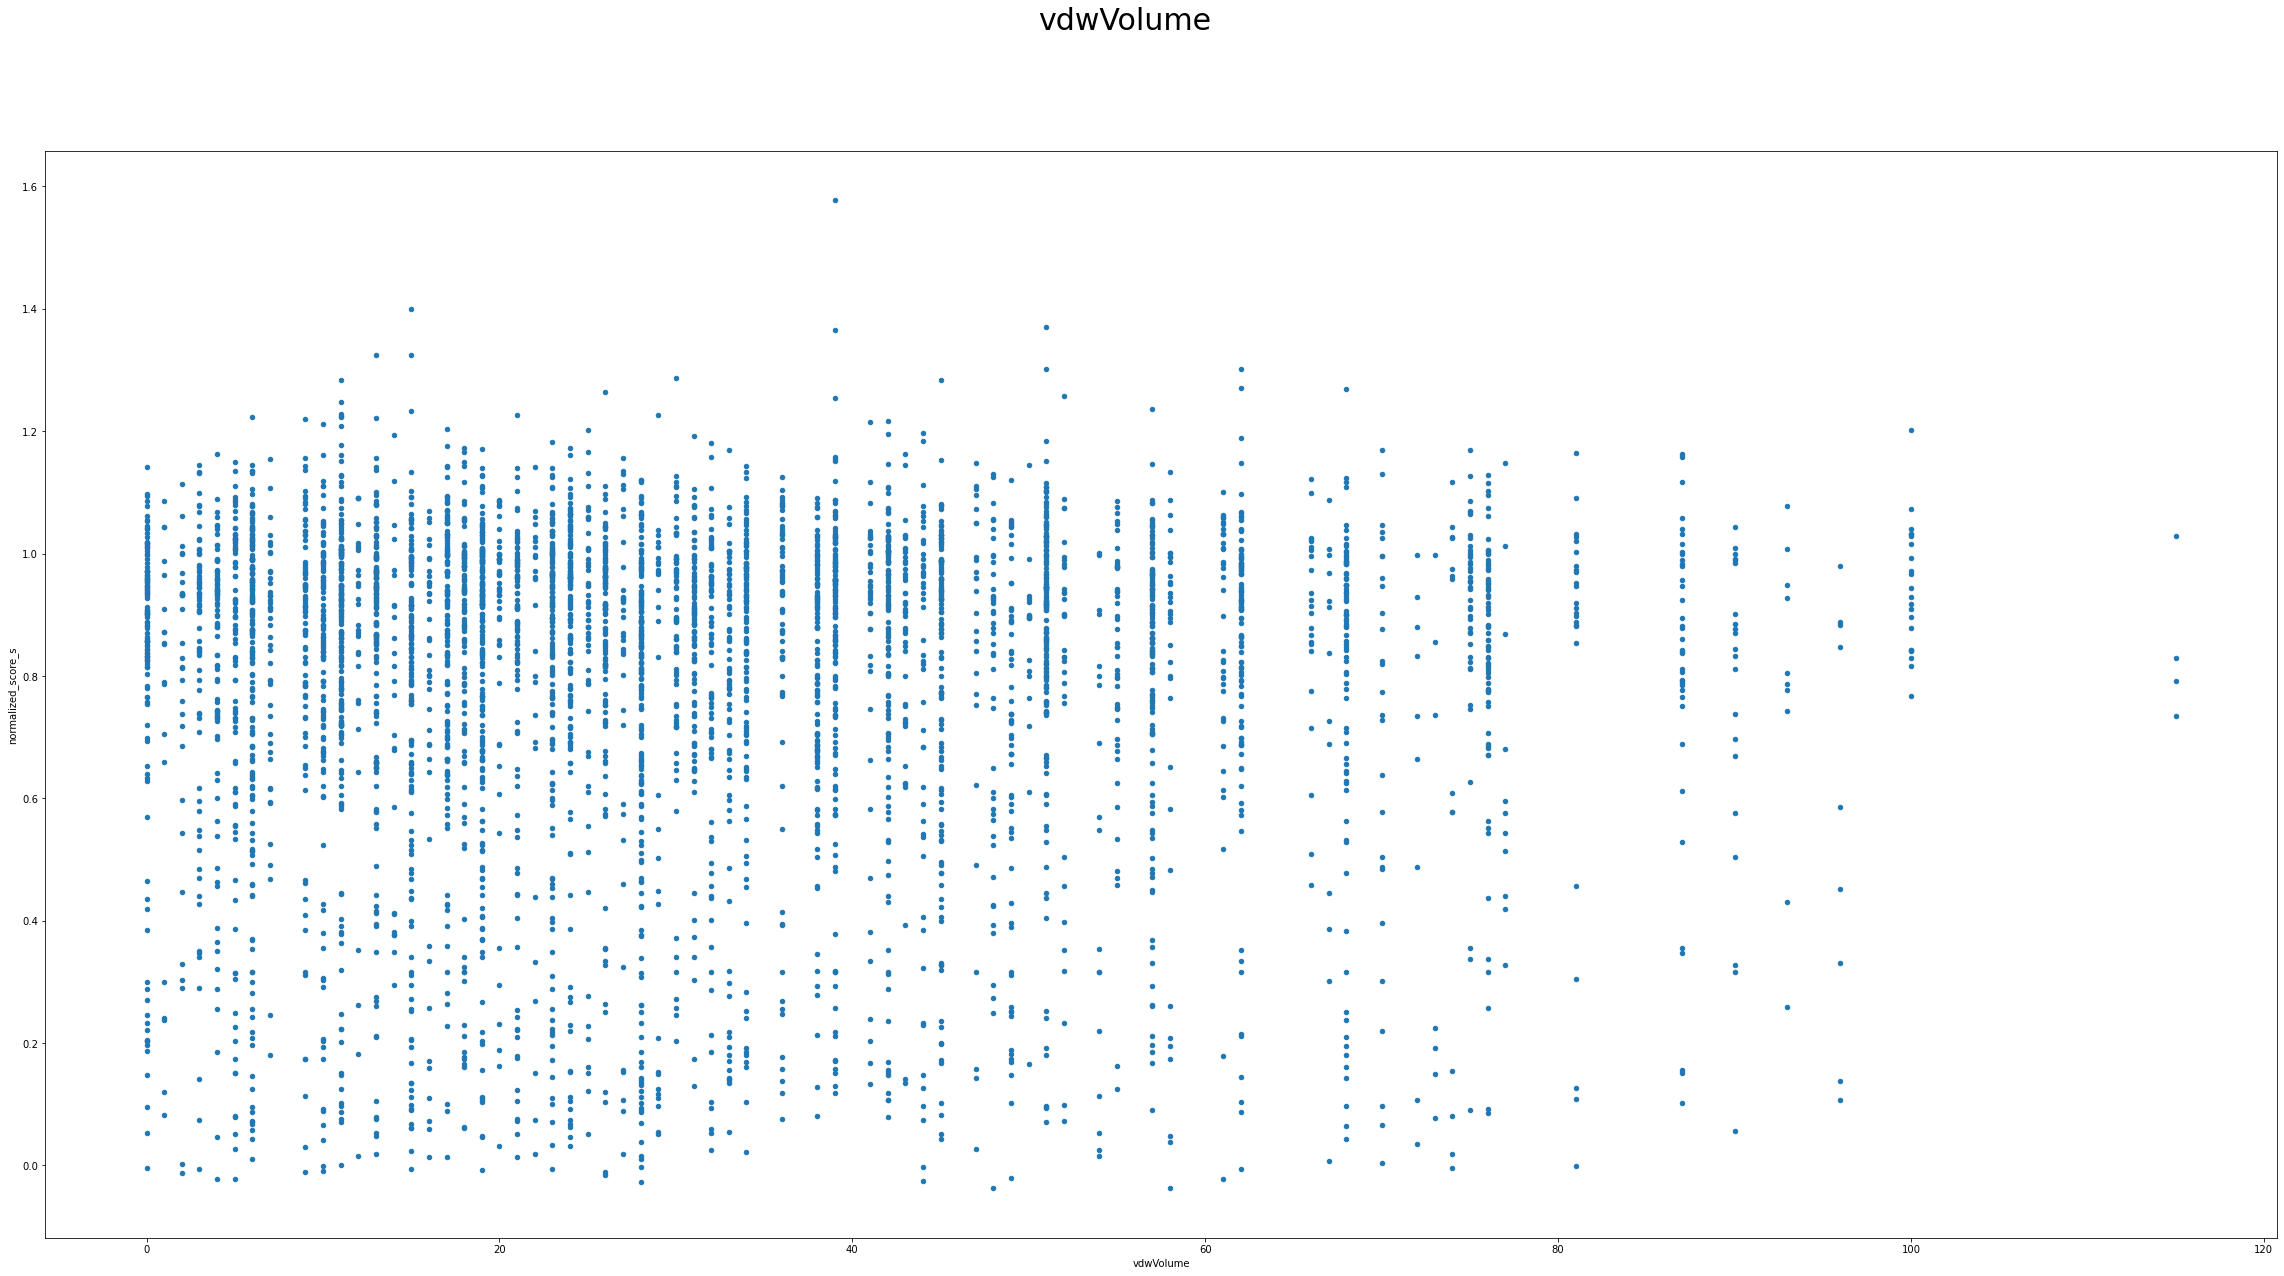

In [14]:
brac1_e3_merged.plot.scatter(y ='normalized_score_s',x = 'vdwVolume')
plt.rcParams['figure.figsize'] = (40,20)
plt.suptitle("vdwVolume", size=30)

Text(0.5, 0.98, 'Hydrophobicity')

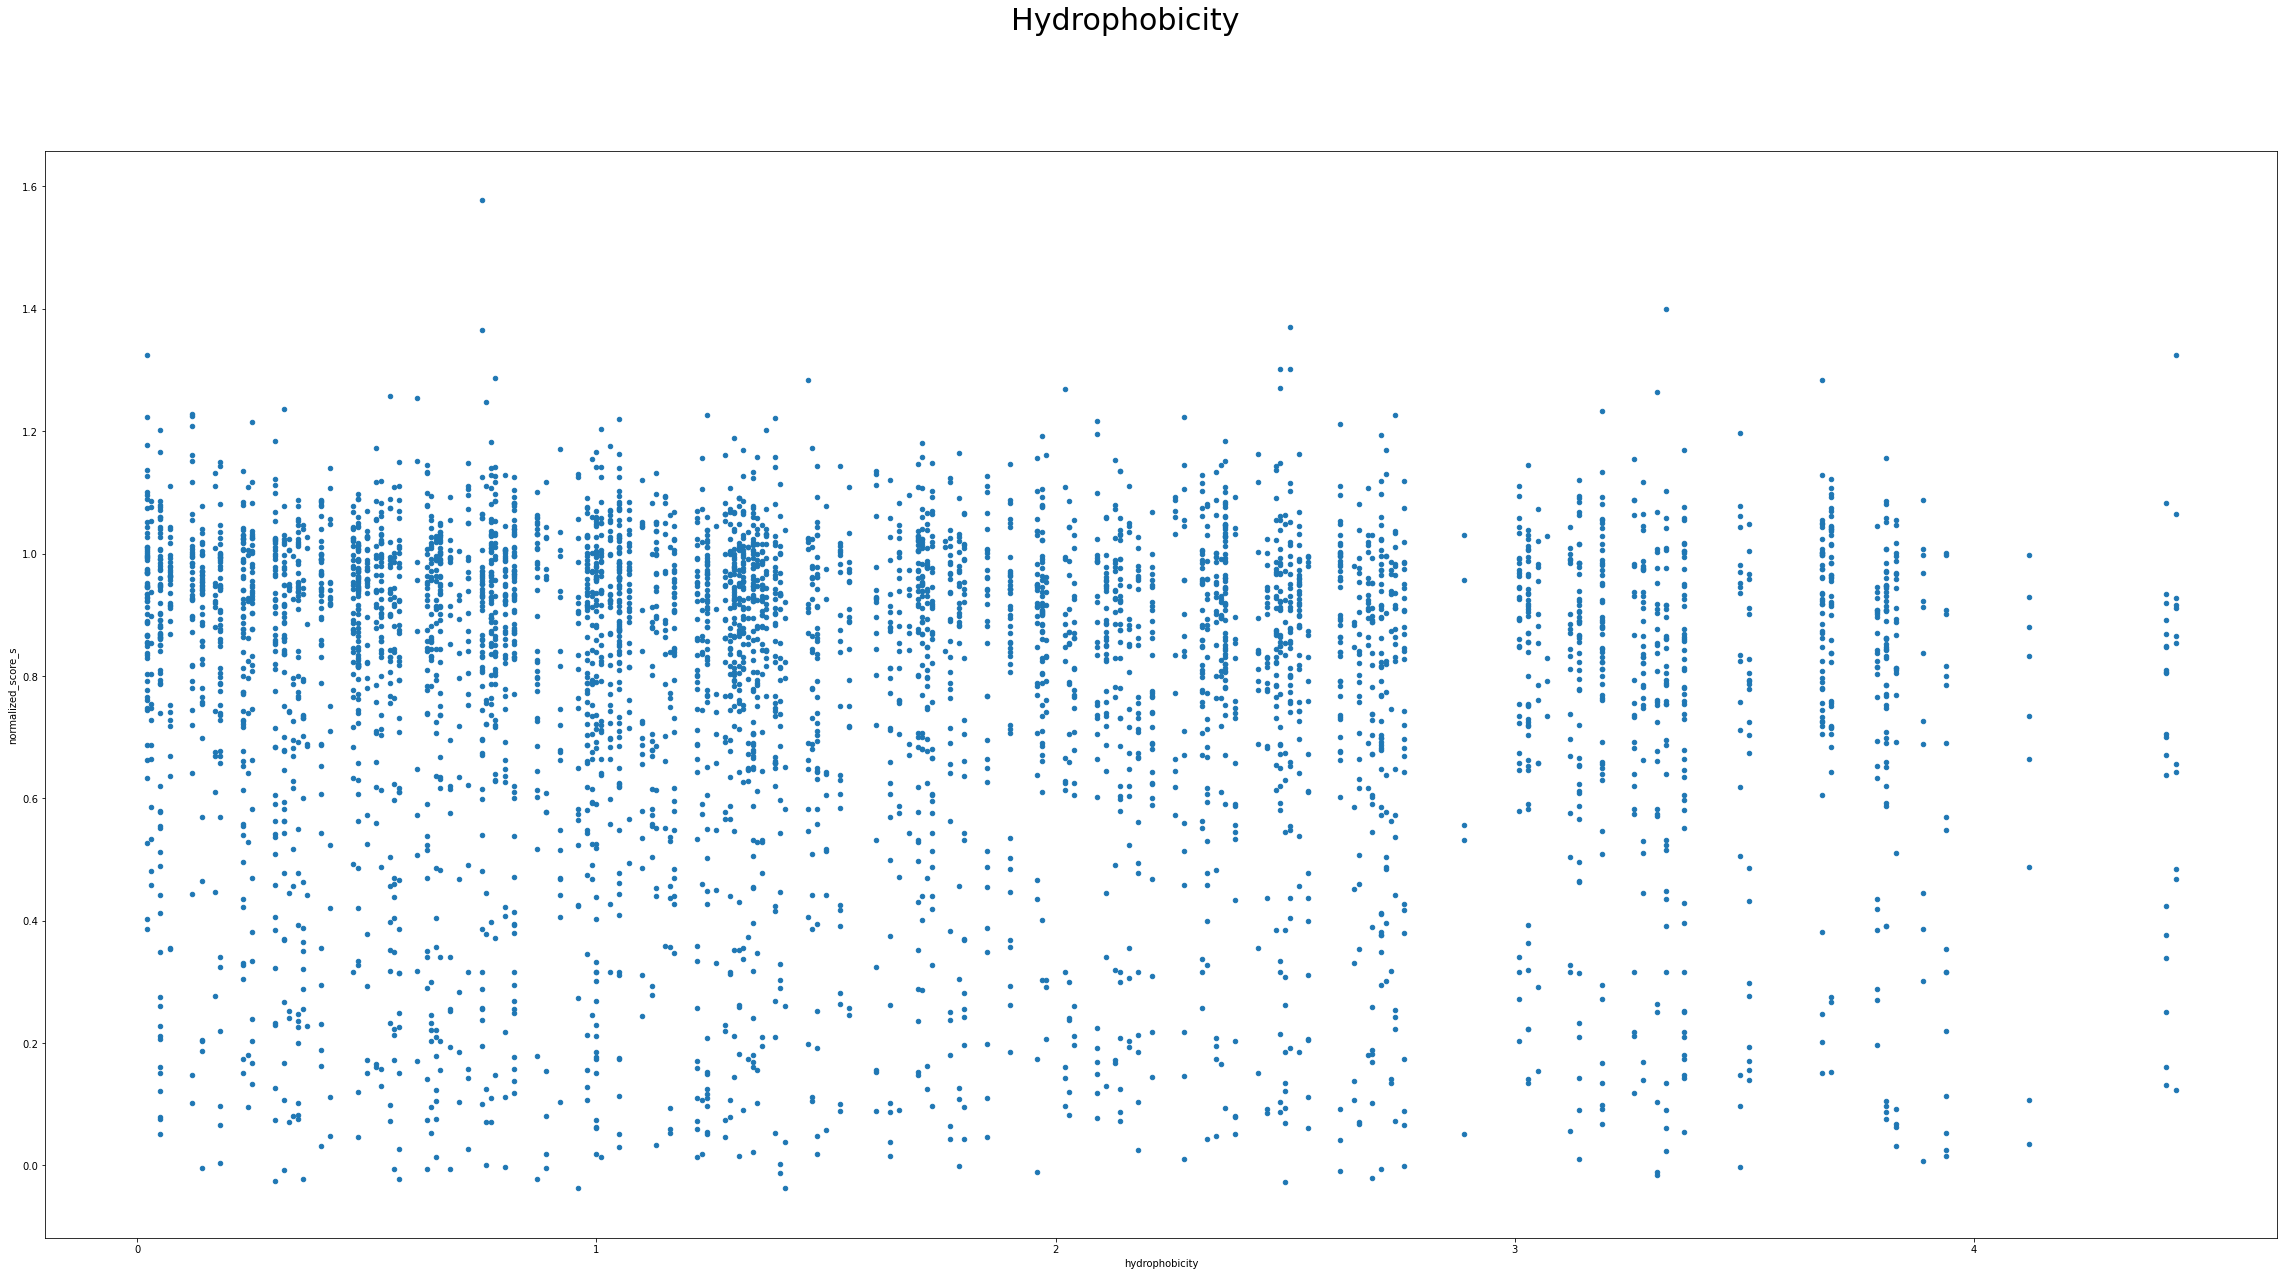

In [14]:
brac1_e3_merged.plot.scatter(y = 'normalized_score_s',x = 'hydrophobicity')
plt.suptitle("Hydrophobicity", size=30)

Text(0.5, 0.98, 'substitutionMatrix')

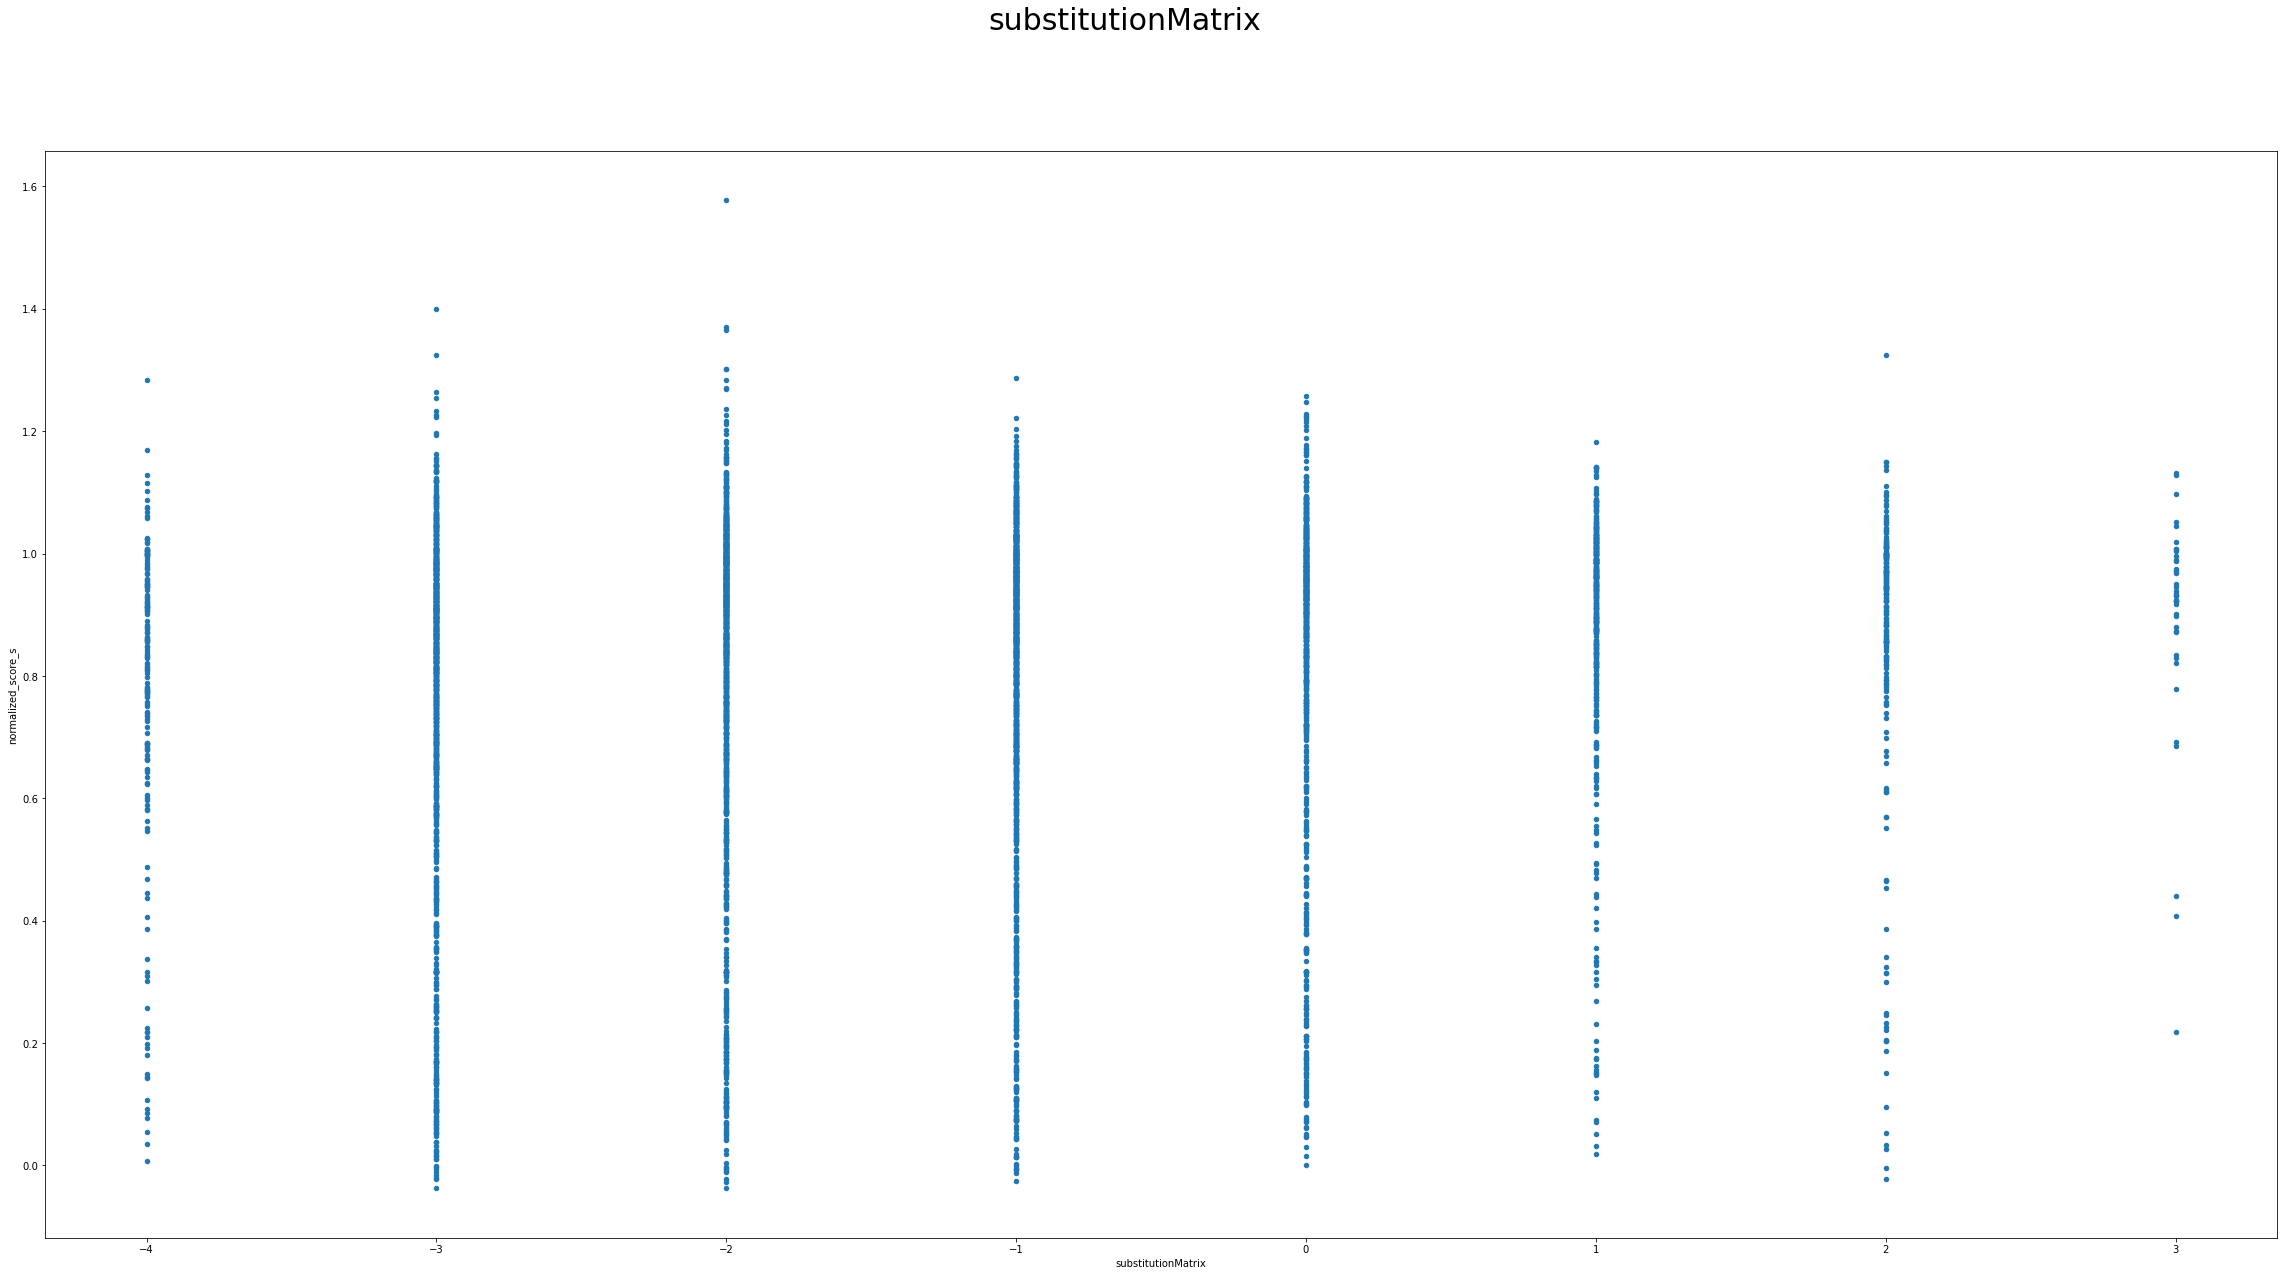

In [16]:
brac1_e3_merged.plot.scatter(y = 'normalized_score_s',x = 'substitutionMatrix')
plt.suptitle("substitutionMatrix", size=30)

Text(0.5, 0.98, 'pssm-native')

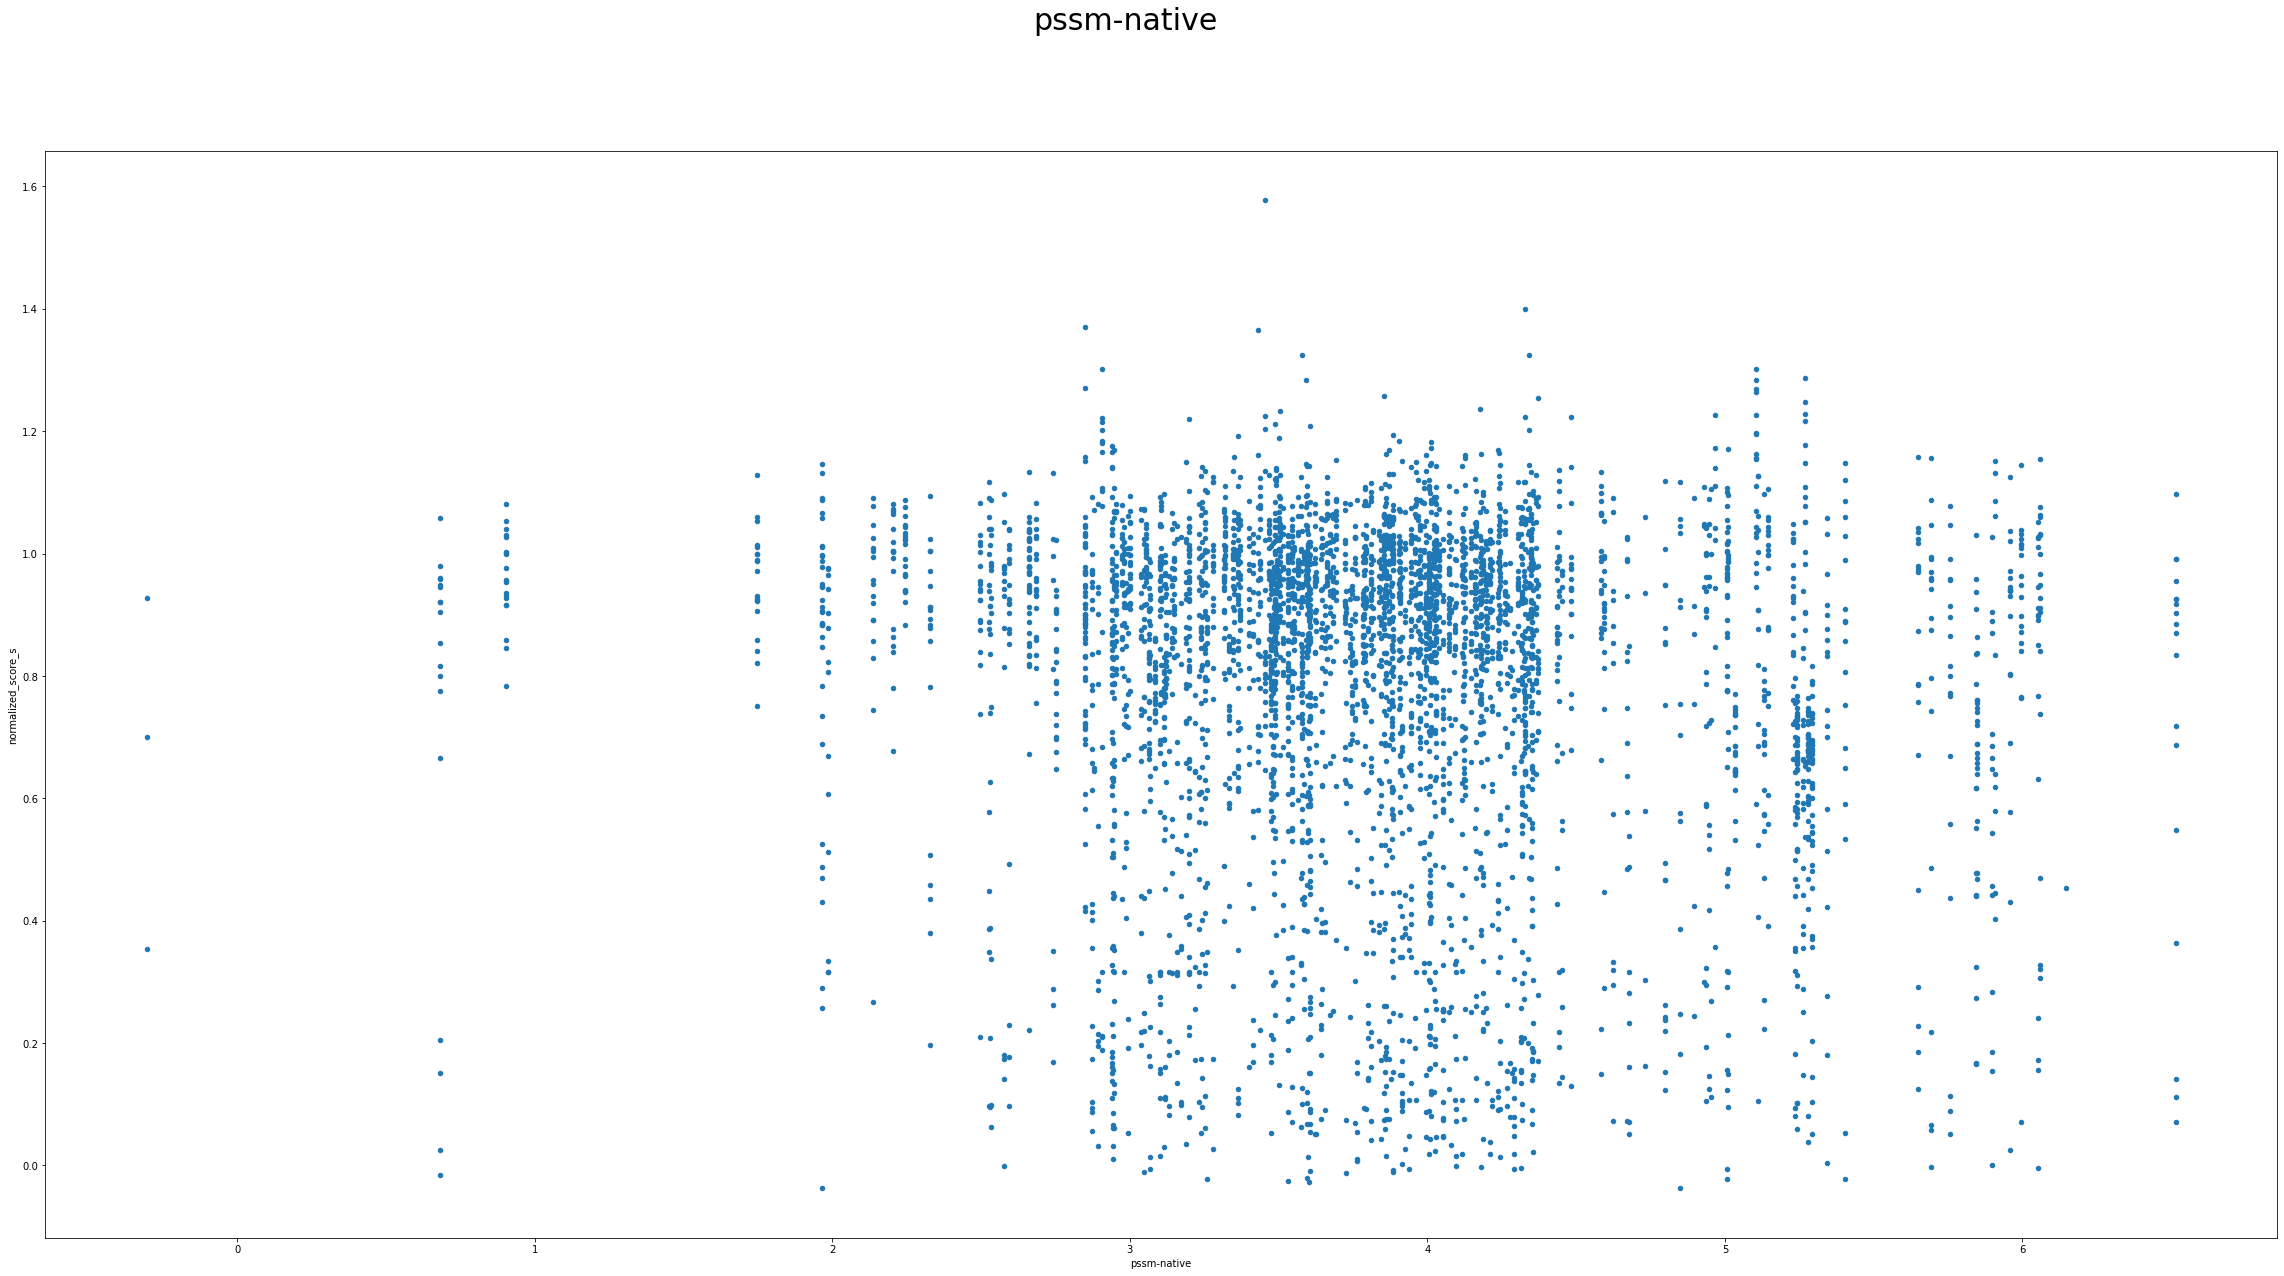

In [17]:
brac1_e3_merged.plot.scatter(y = 'normalized_score_s', x = 'pssm-native')
plt.suptitle("pssm-native", size=30)

Text(0.5, 0.98, 'pssm-mutated')

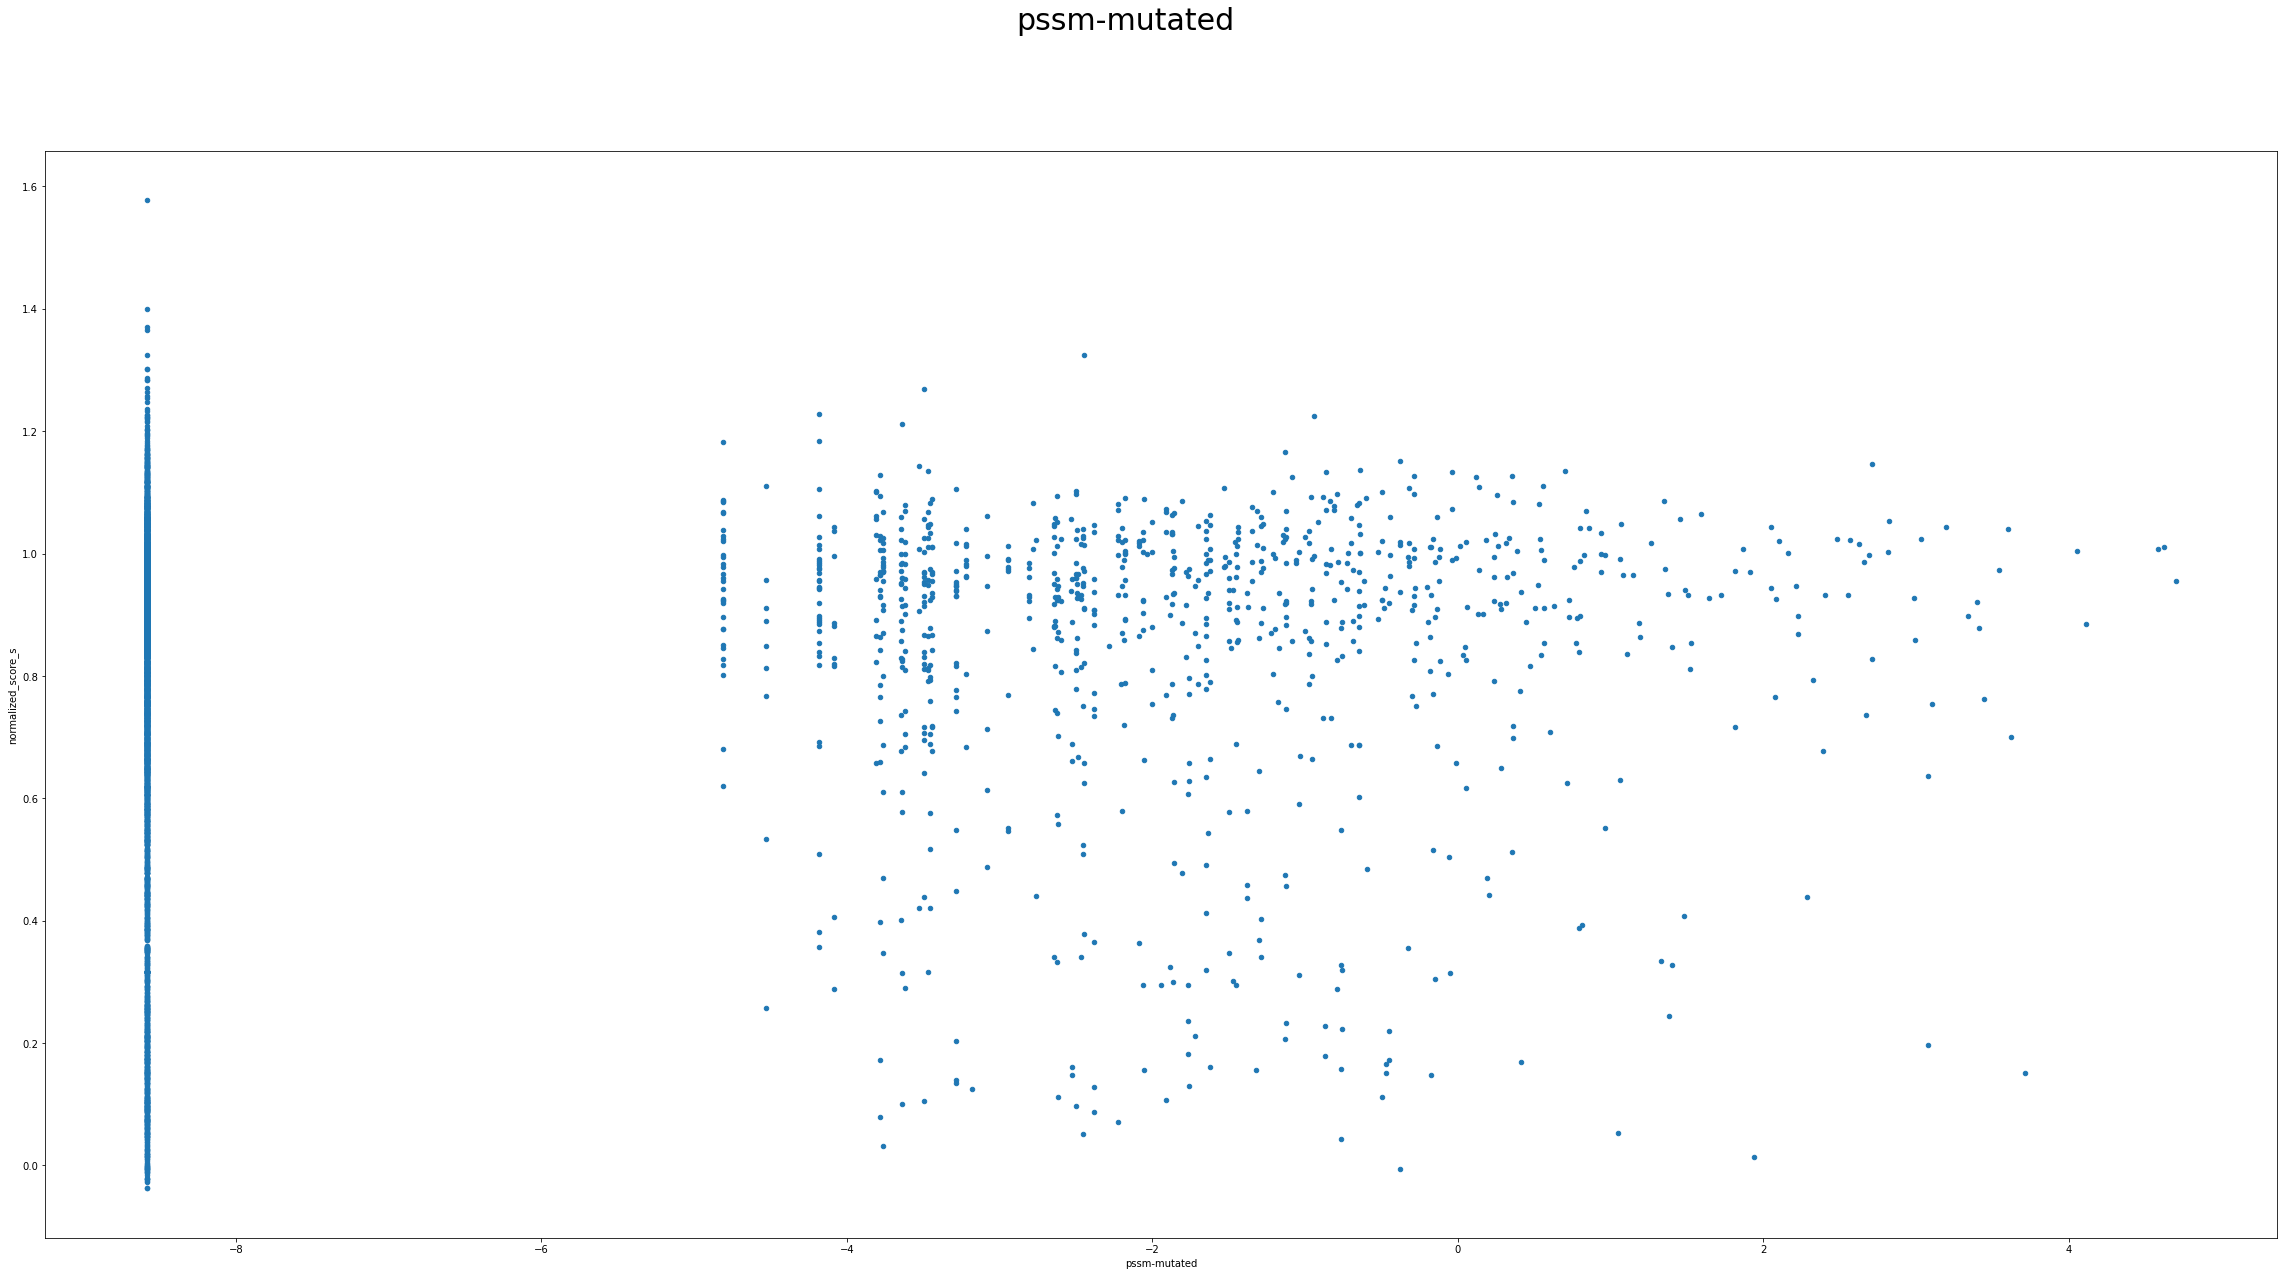

In [88]:
brac1_e3_merged.plot.scatter(y = 'normalized_score_s', x = 'pssm-mutated')
plt.suptitle("pssm-mutated", size=30)

Text(0.5, 0.98, 'entropy')

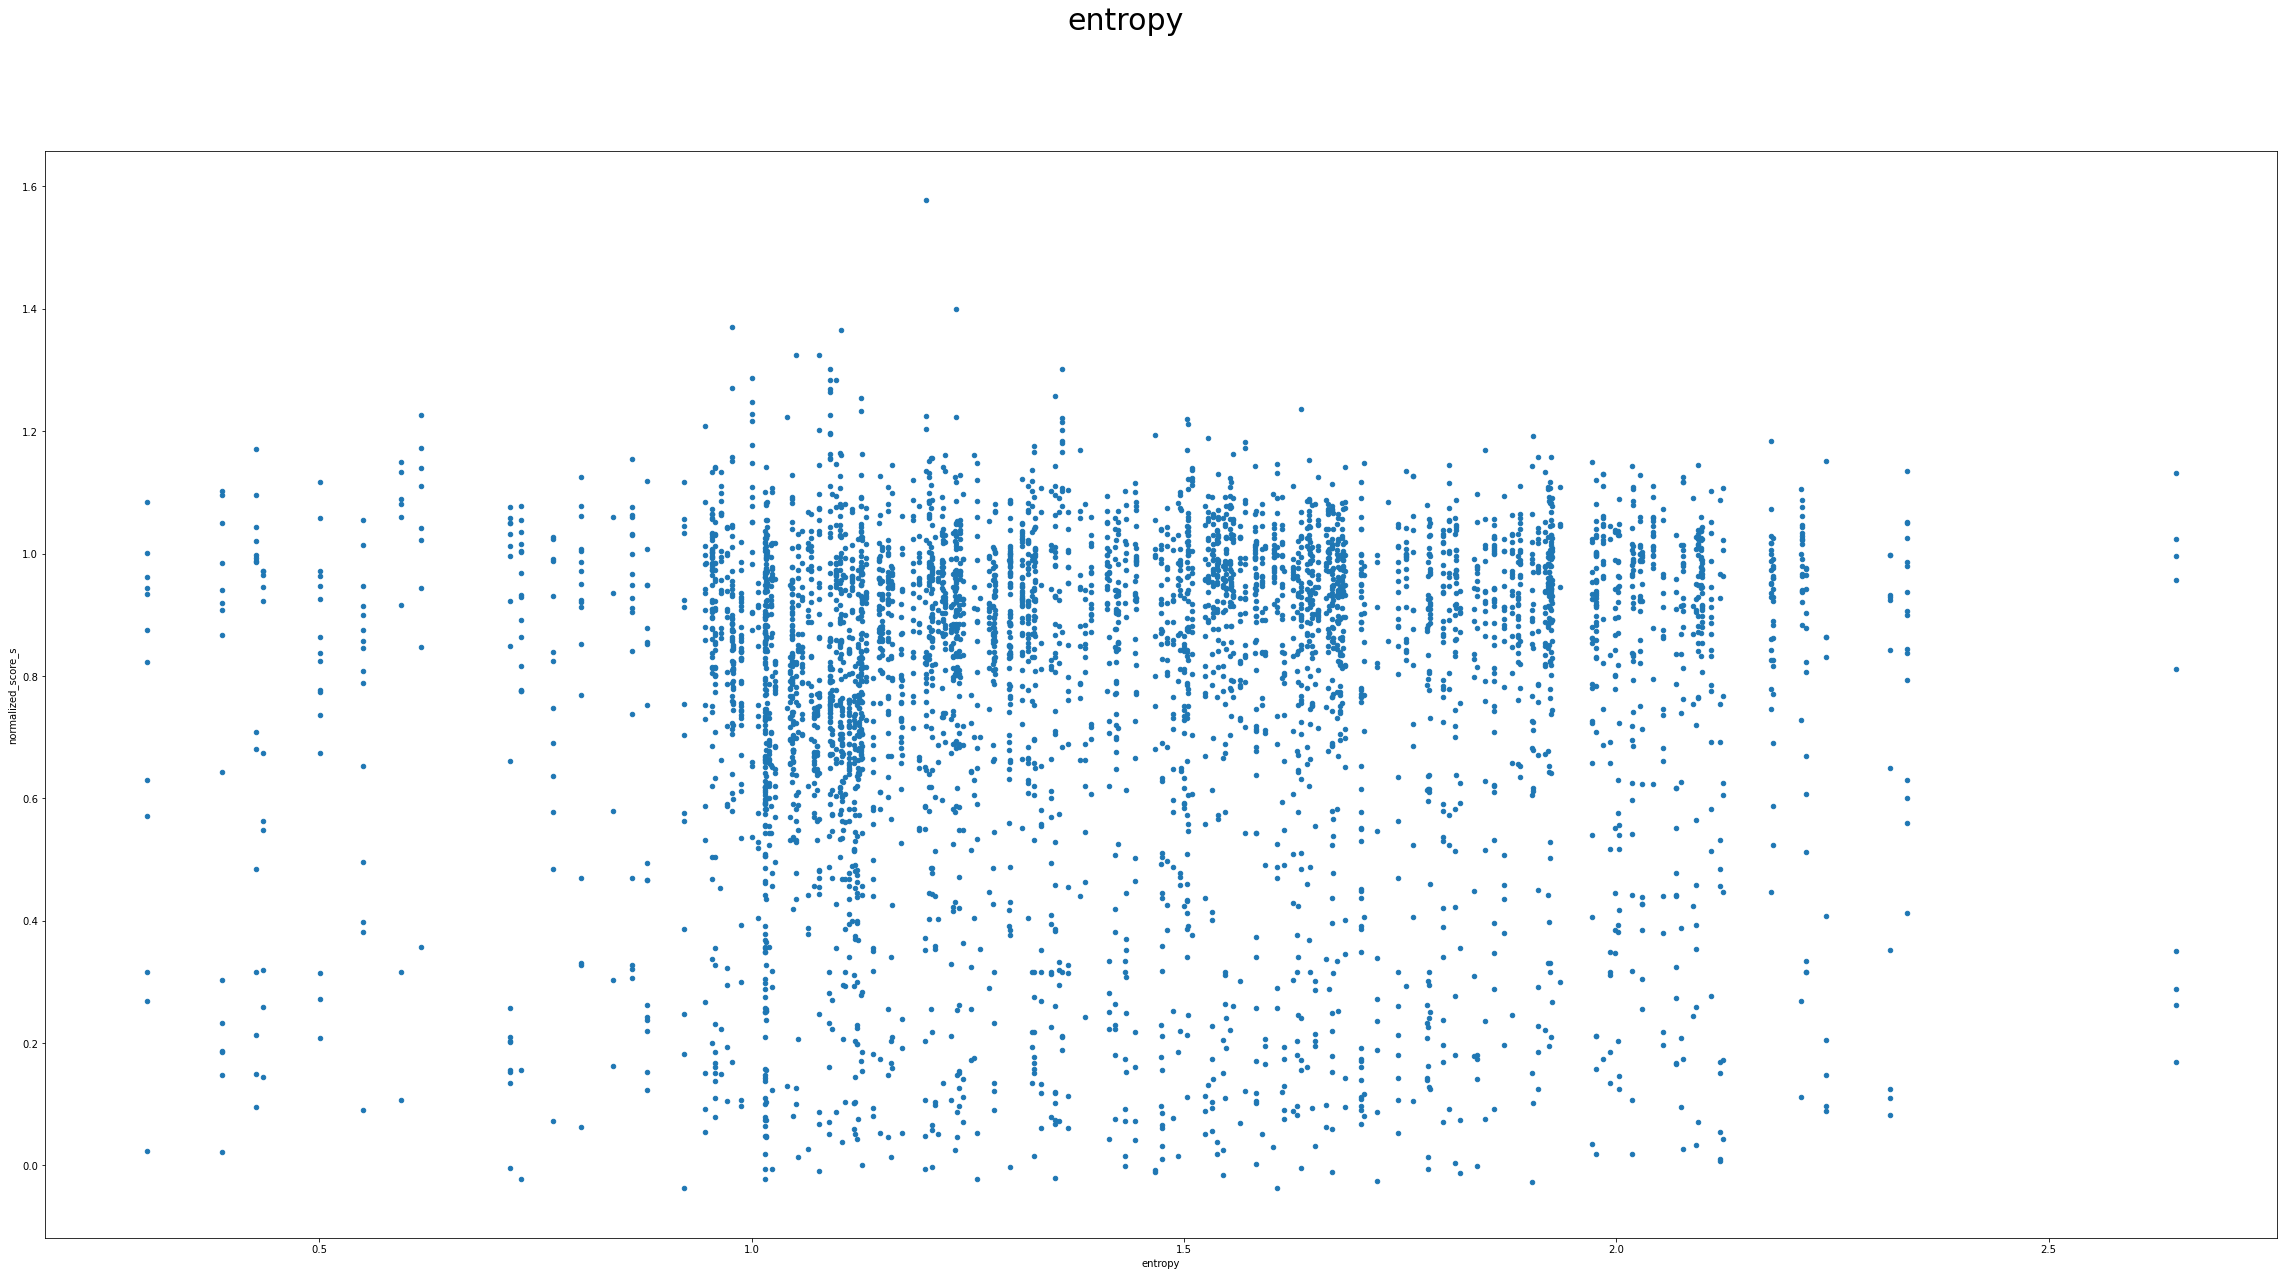

In [87]:
brac1_e3_merged.plot.scatter( y = 'normalized_score_s', x = 'entropy')
plt.suptitle("entropy", size=30)

Text(0.5, 0.98, 'freqGaps')

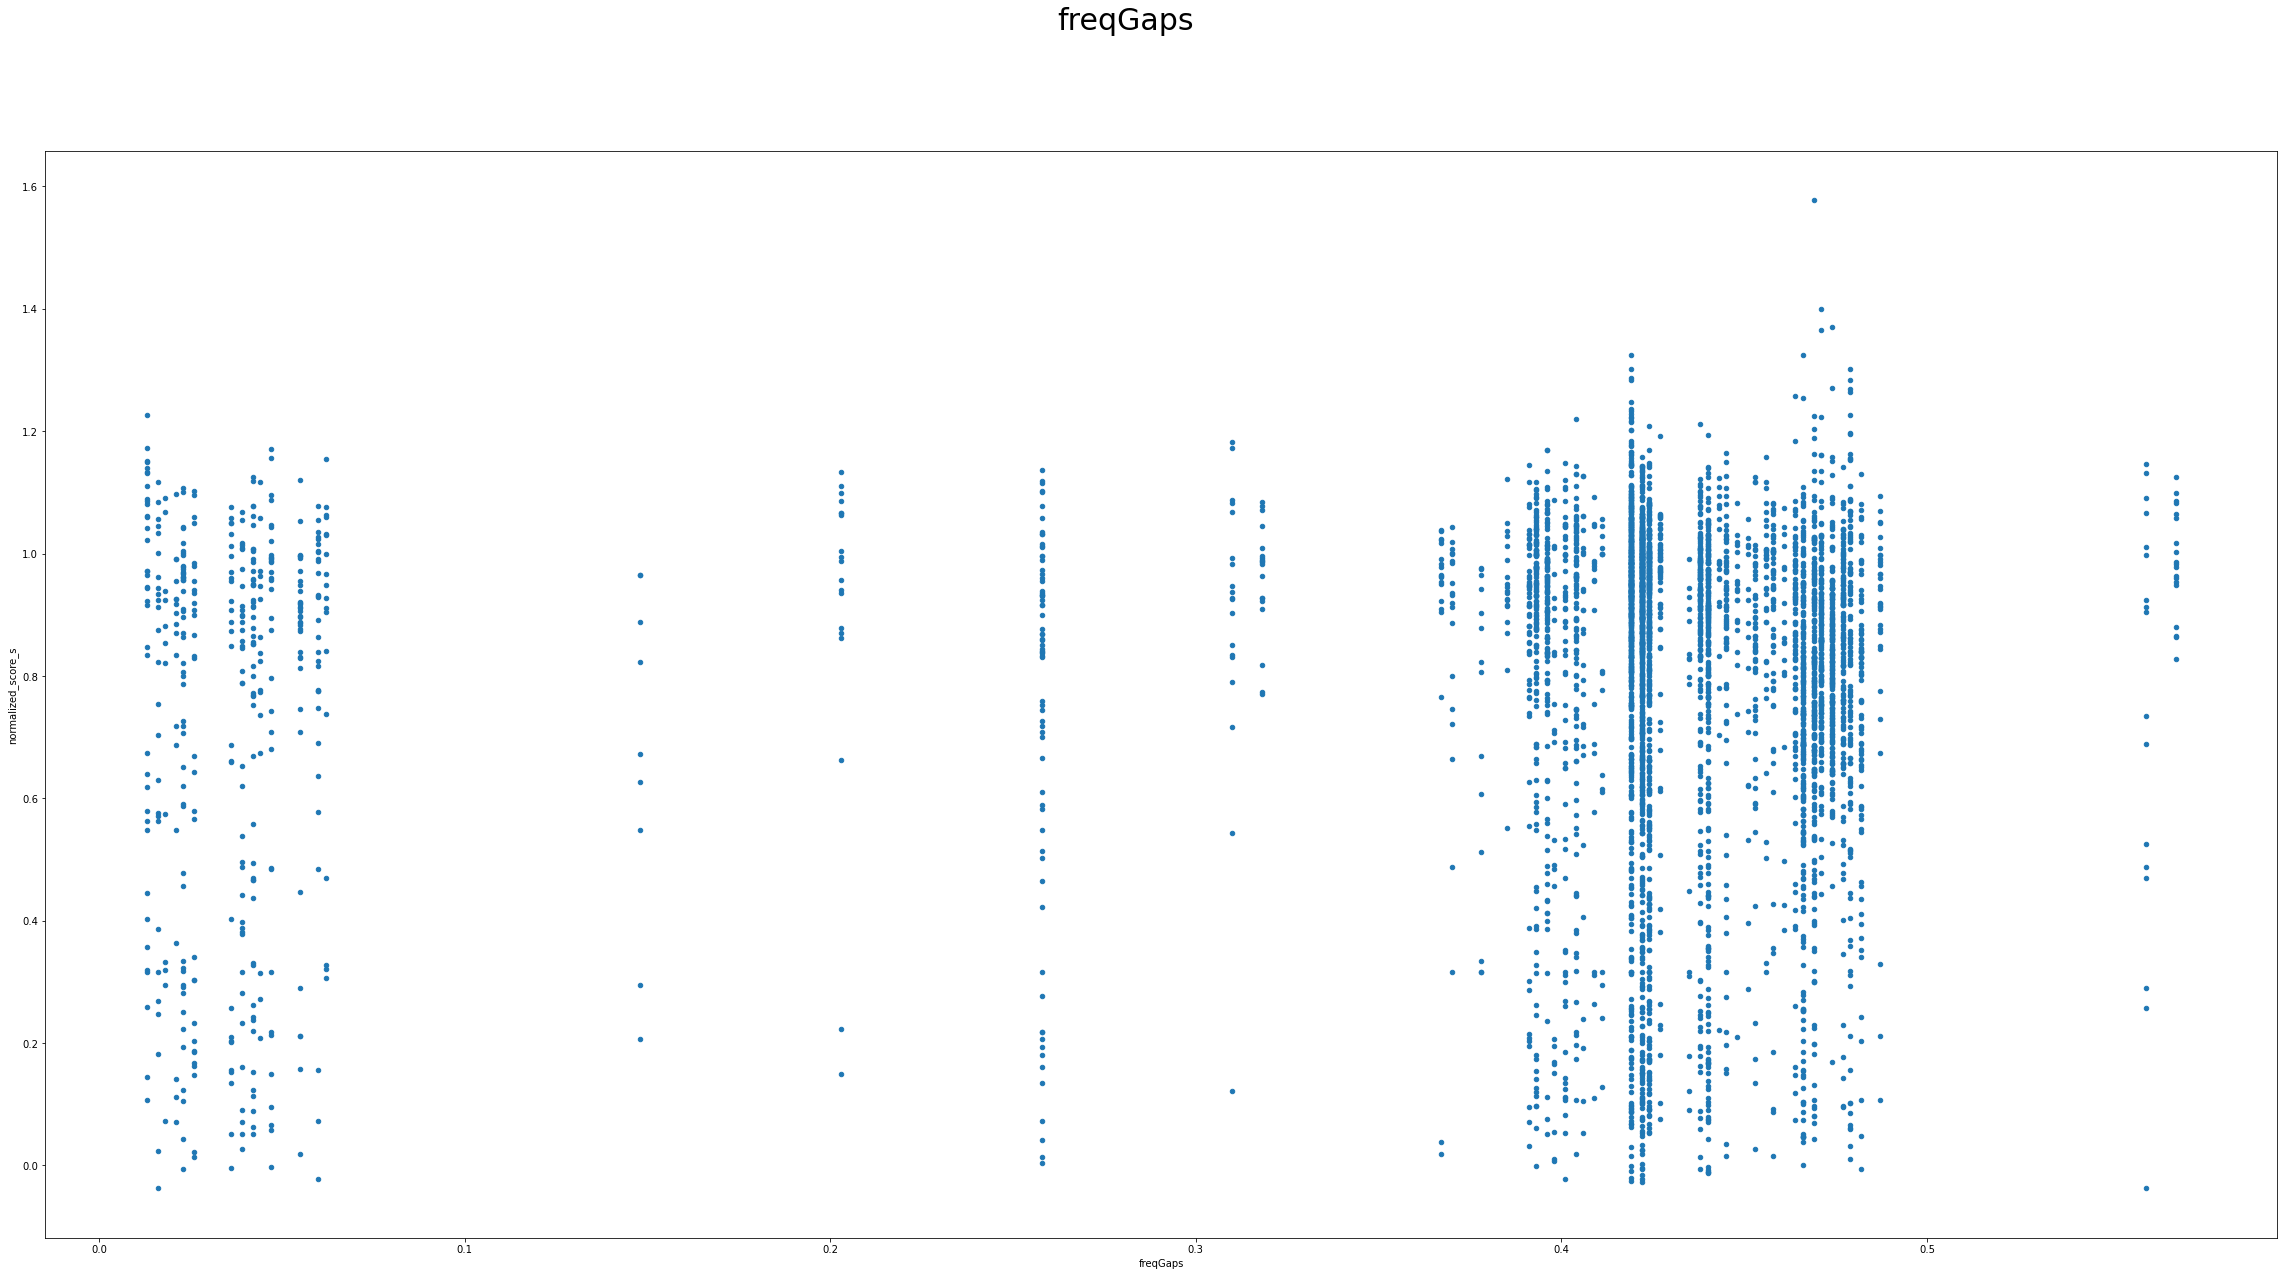

In [86]:
brac1_e3_merged.plot.scatter(y = 'normalized_score_s',x = 'freqGaps')
plt.suptitle("freqGaps", size=30)

<h1>Regression Line</h1>


Text(0.5, 0.98, 'vdwVolume')

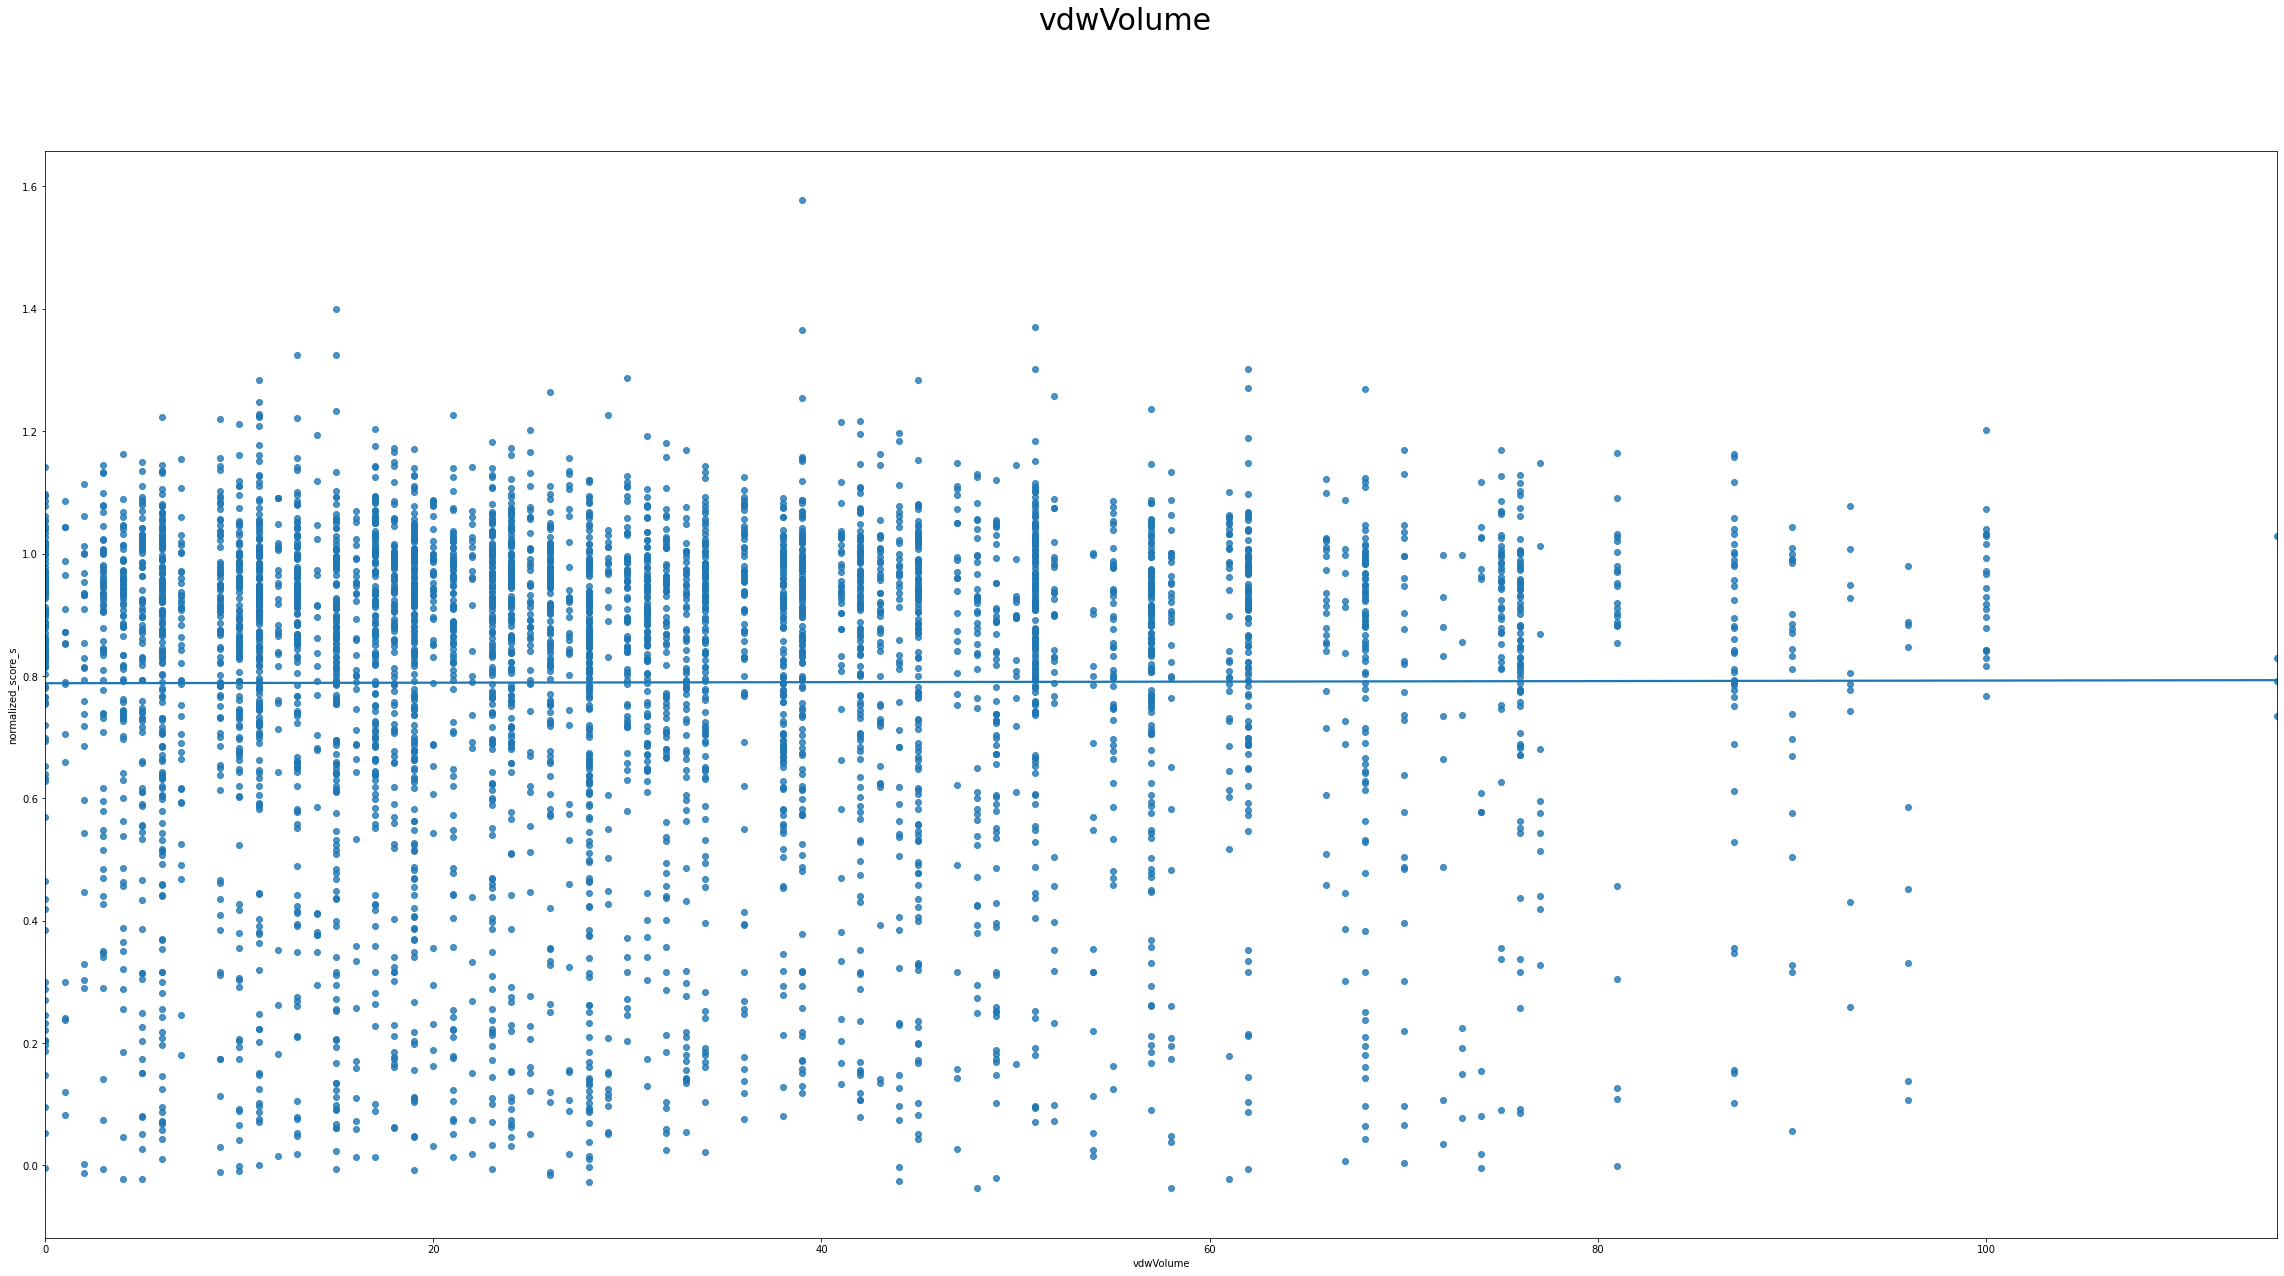

In [145]:
sns.regplot(y = 'normalized_score_s', x = 'vdwVolume', ci = None, data = brac1_e3_merged) 
plt.suptitle("vdwVolume", size=30)

Text(0.5, 0.98, 'hydrophobicity')

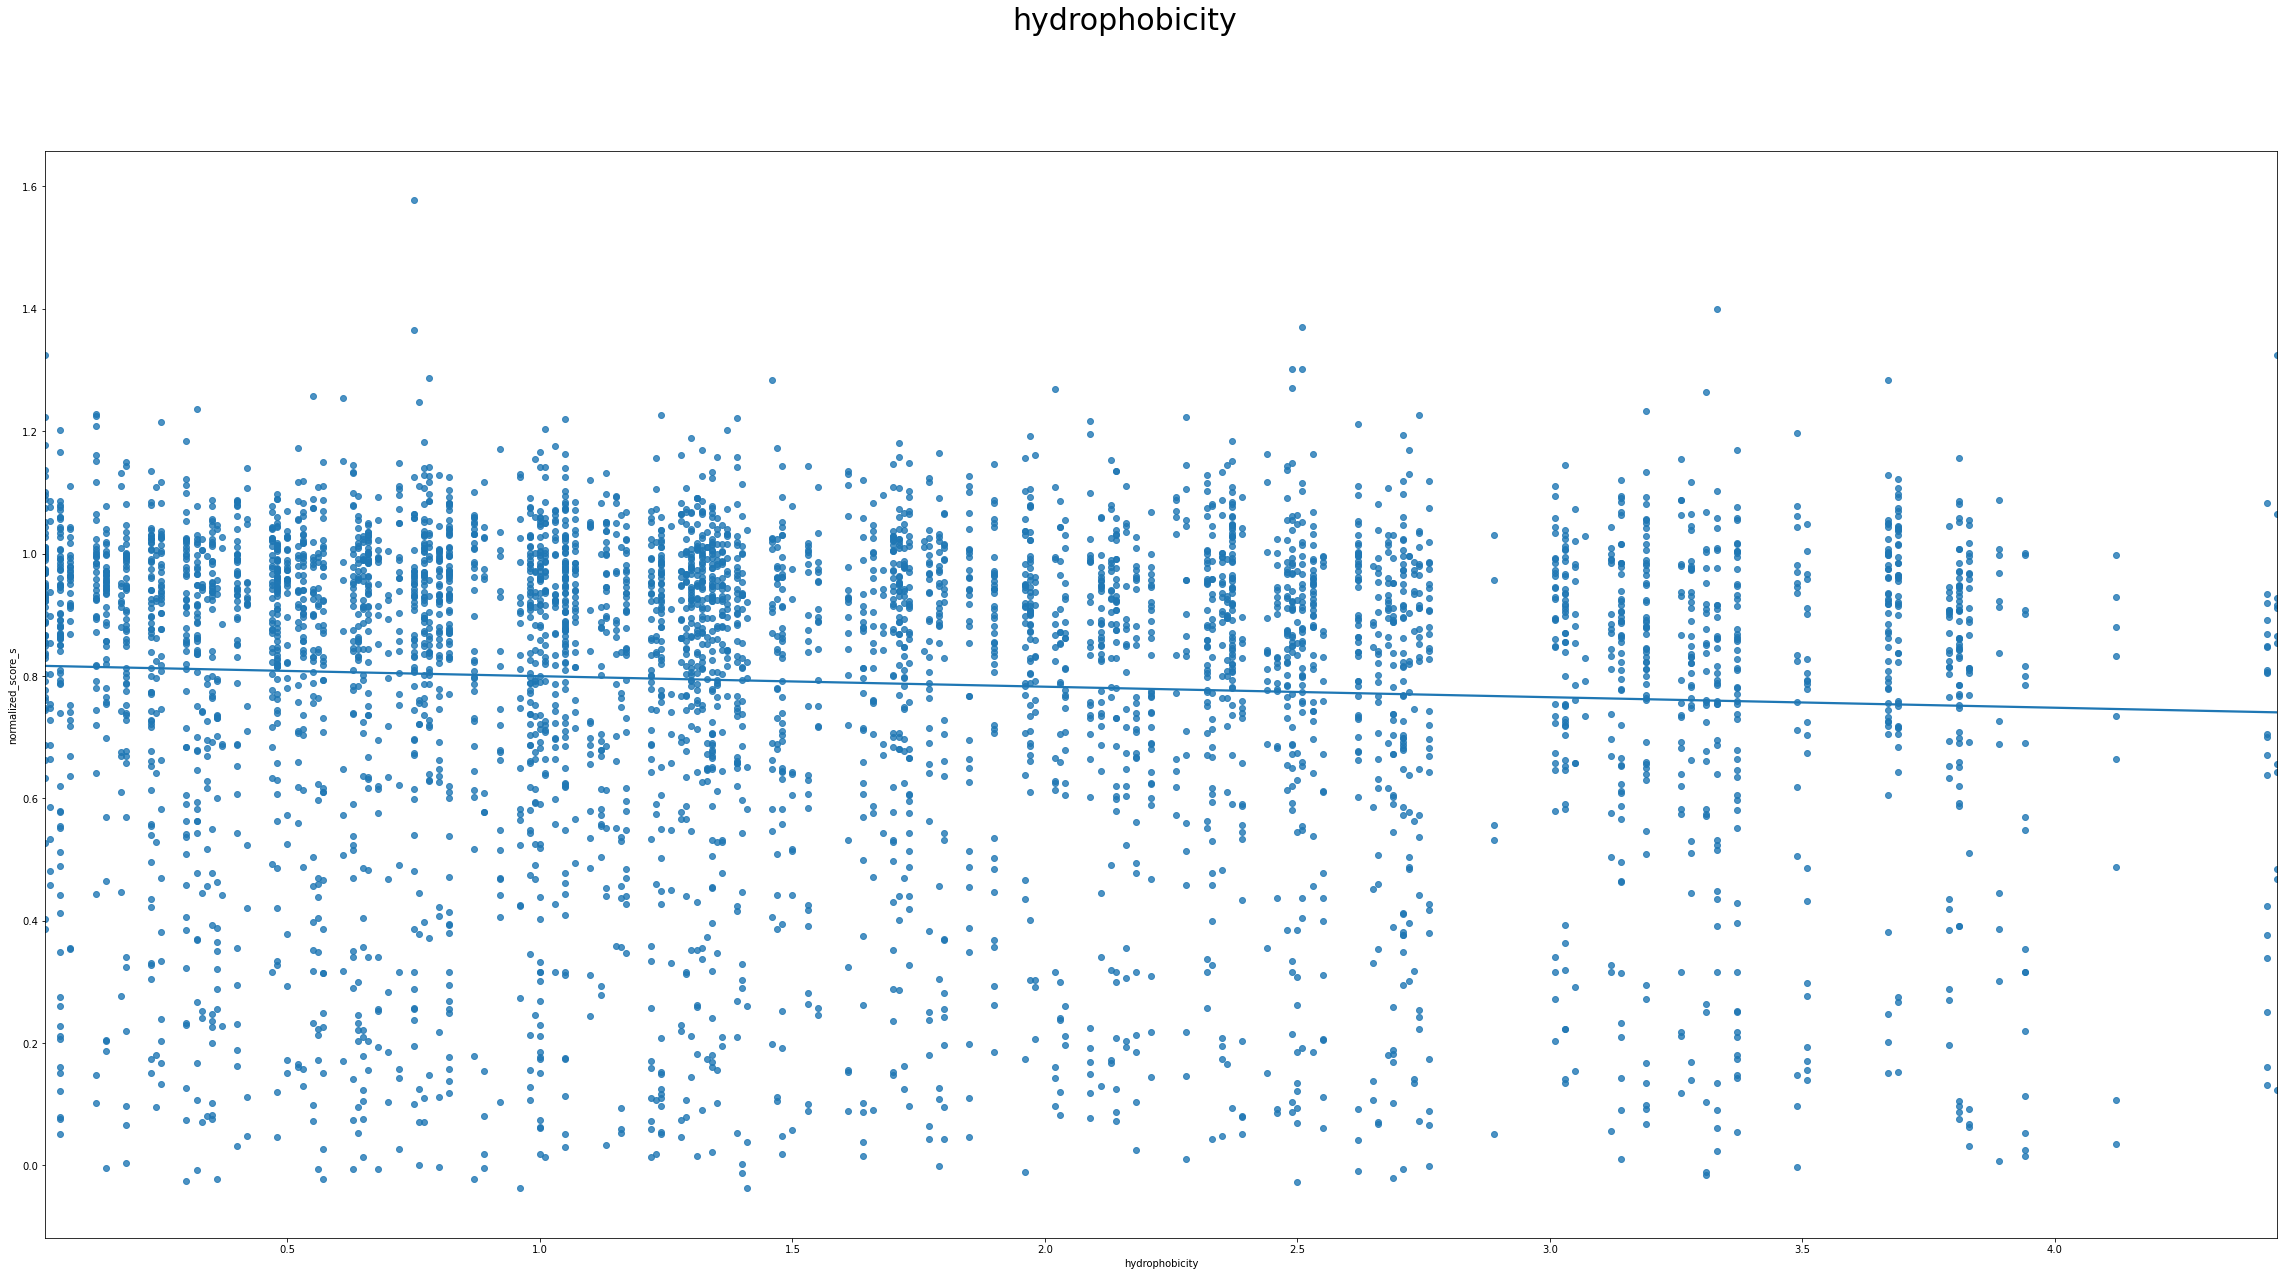

In [83]:
sns.regplot(y = 'normalized_score_s', x = 'hydrophobicity', ci = None, data = brac1_e3_merged)
plt.suptitle("hydrophobicity", size=30)

Text(0.5, 0.98, 'substitutionMatrix')

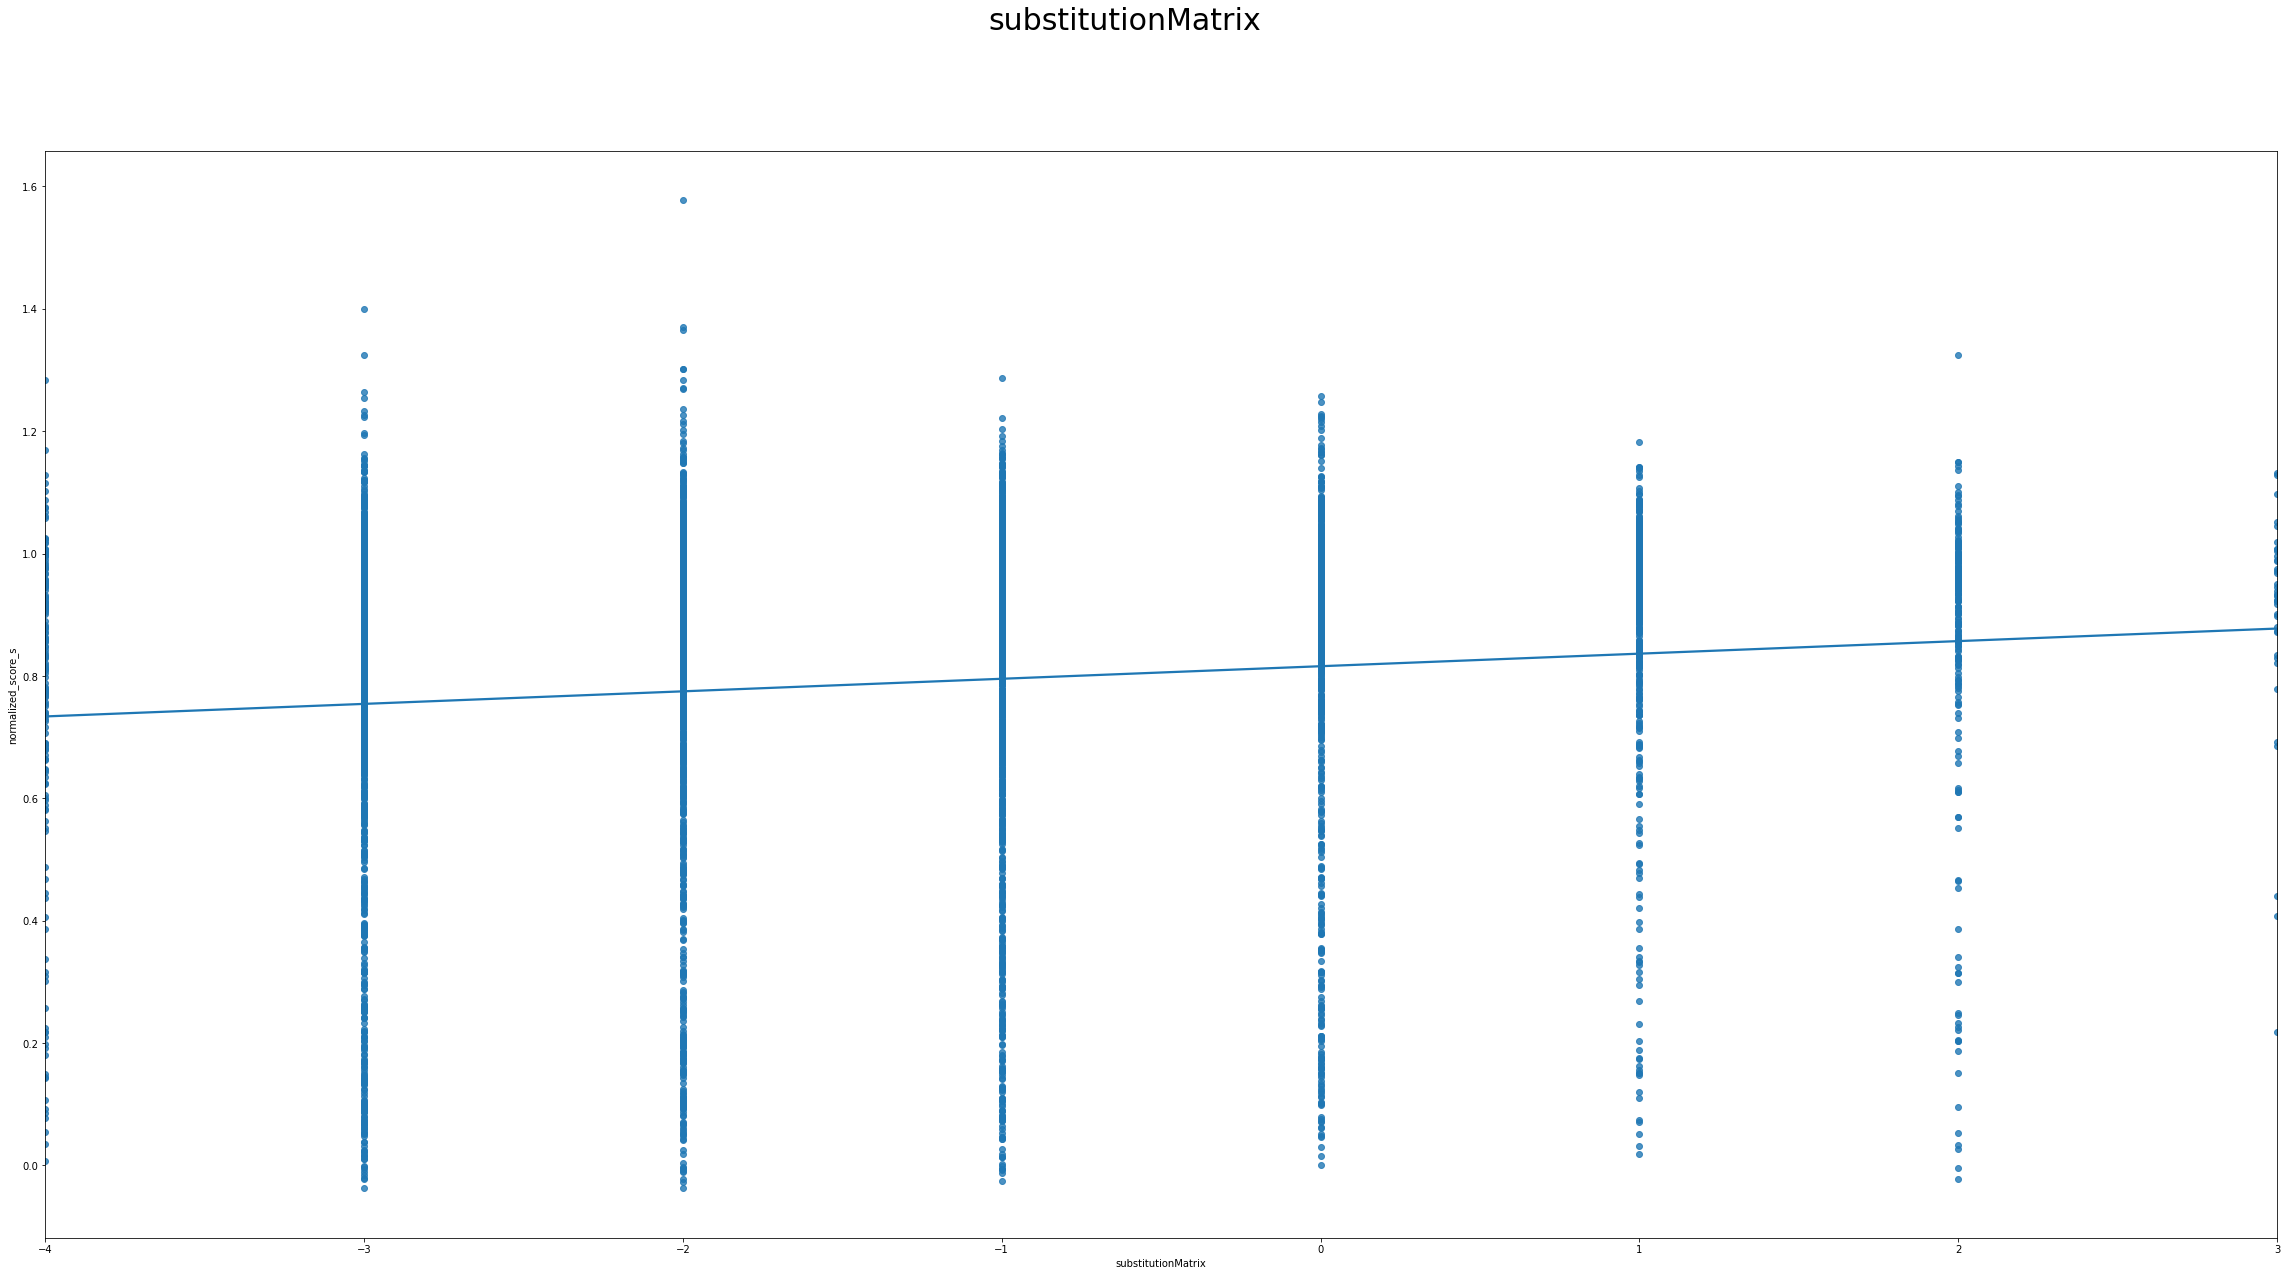

In [82]:
sns.regplot(y = 'normalized_score_s', x = 'substitutionMatrix', ci = None, data = brac1_e3_merged)
plt.suptitle("substitutionMatrix", size=30)

Text(0.5, 0.98, 'pssm-native')

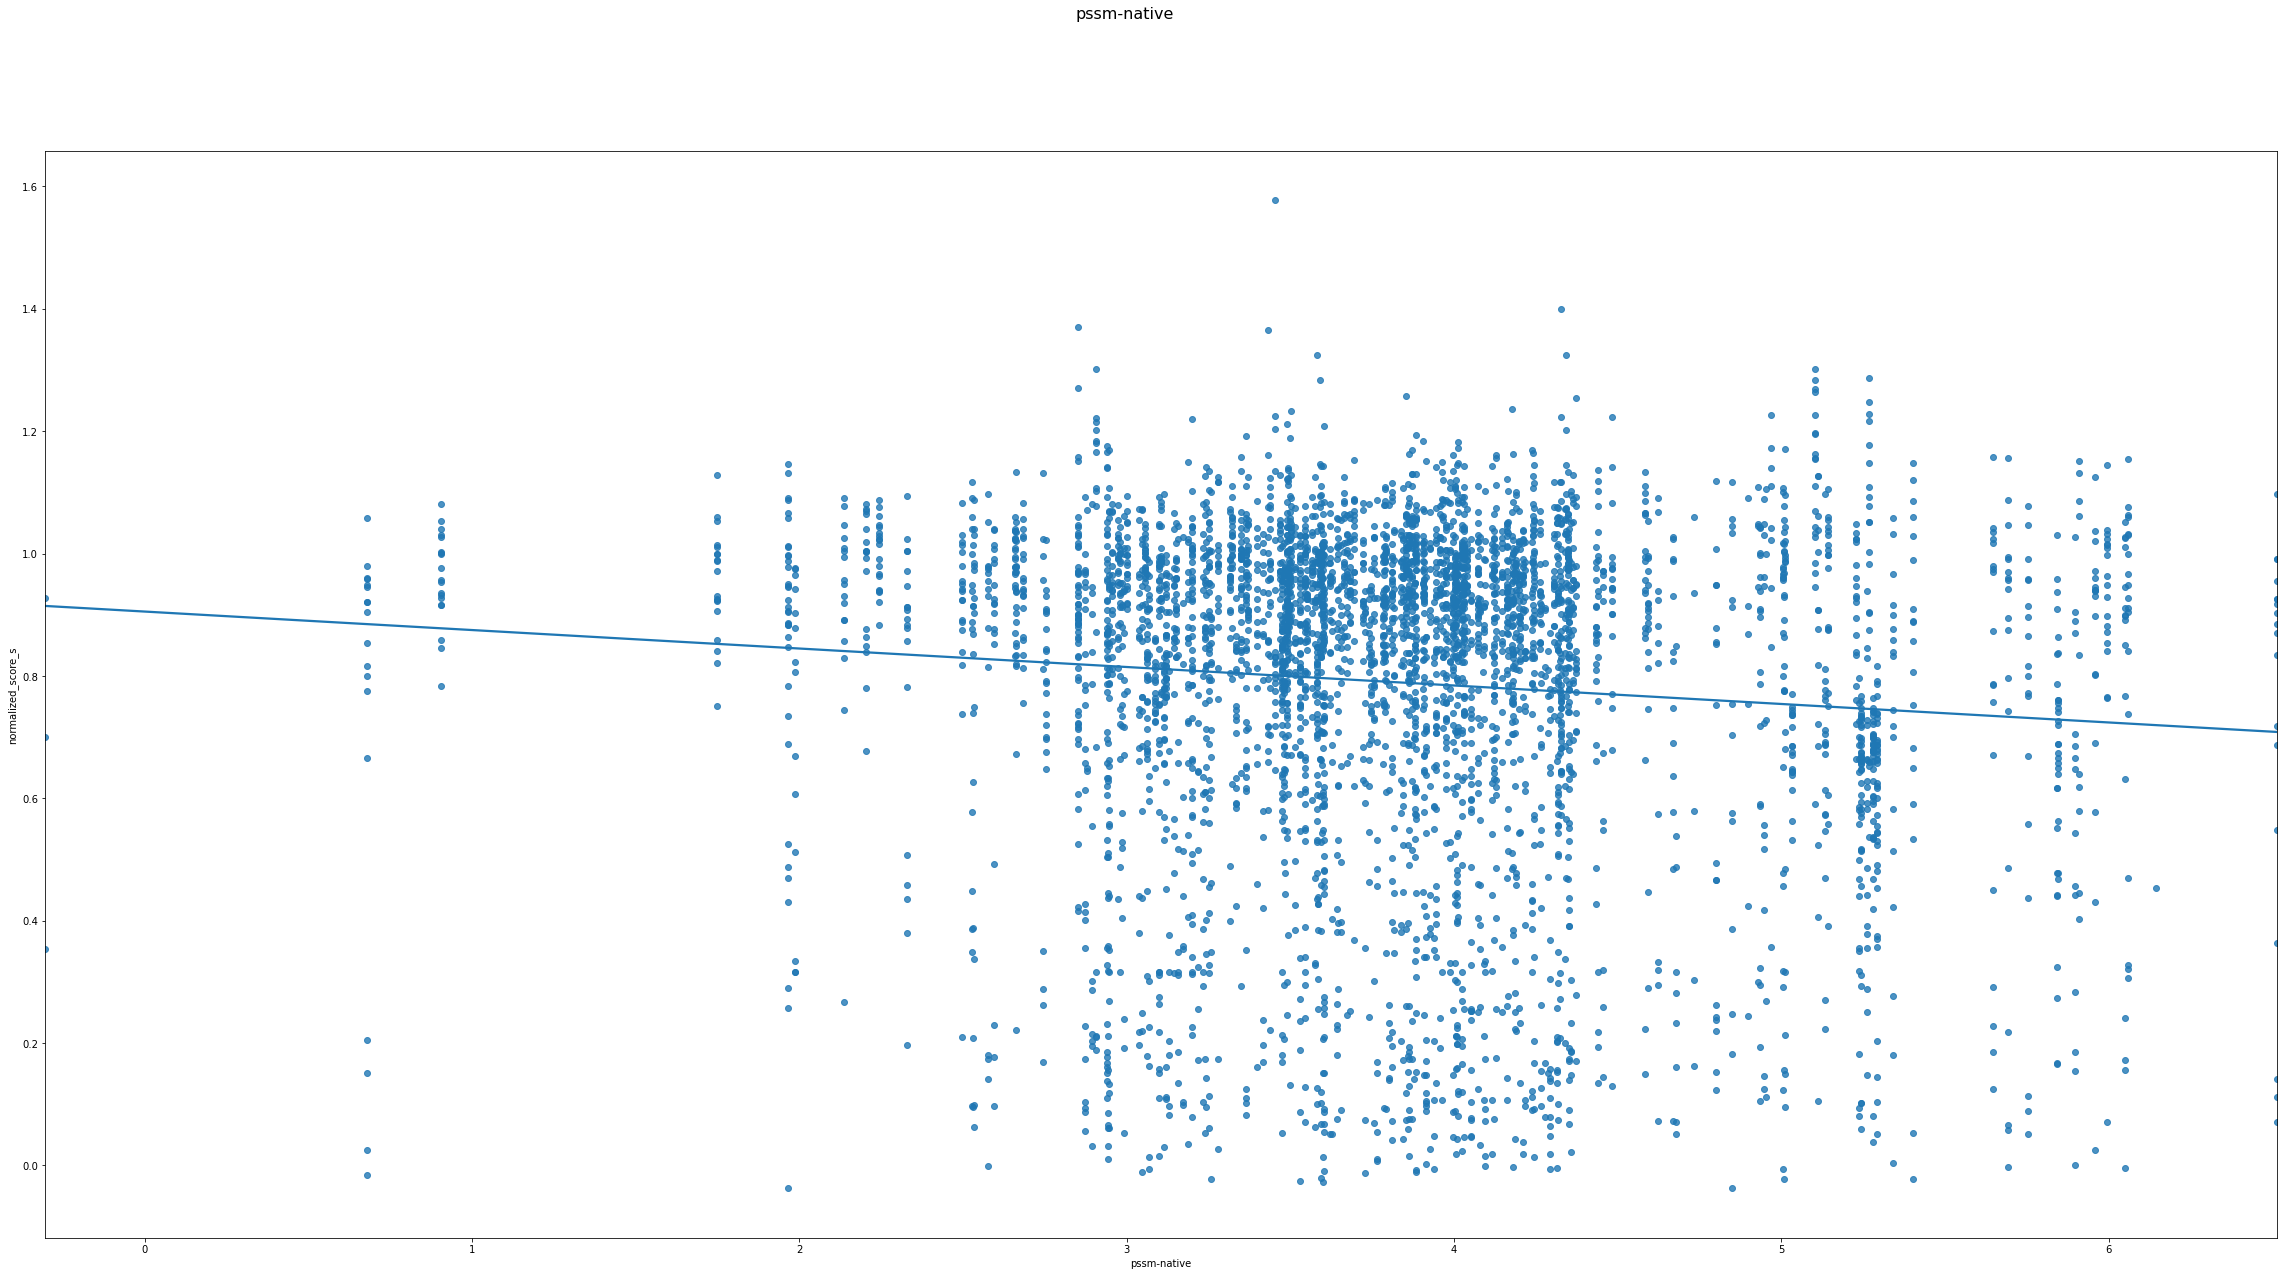

In [73]:
sns.regplot(y = 'normalized_score_s', x = 'pssm-native', ci = None, data = brac1_e3_merged)
plt.suptitle("pssm-native", size=16)

Text(0.5, 0.98, 'pssm-mutated')

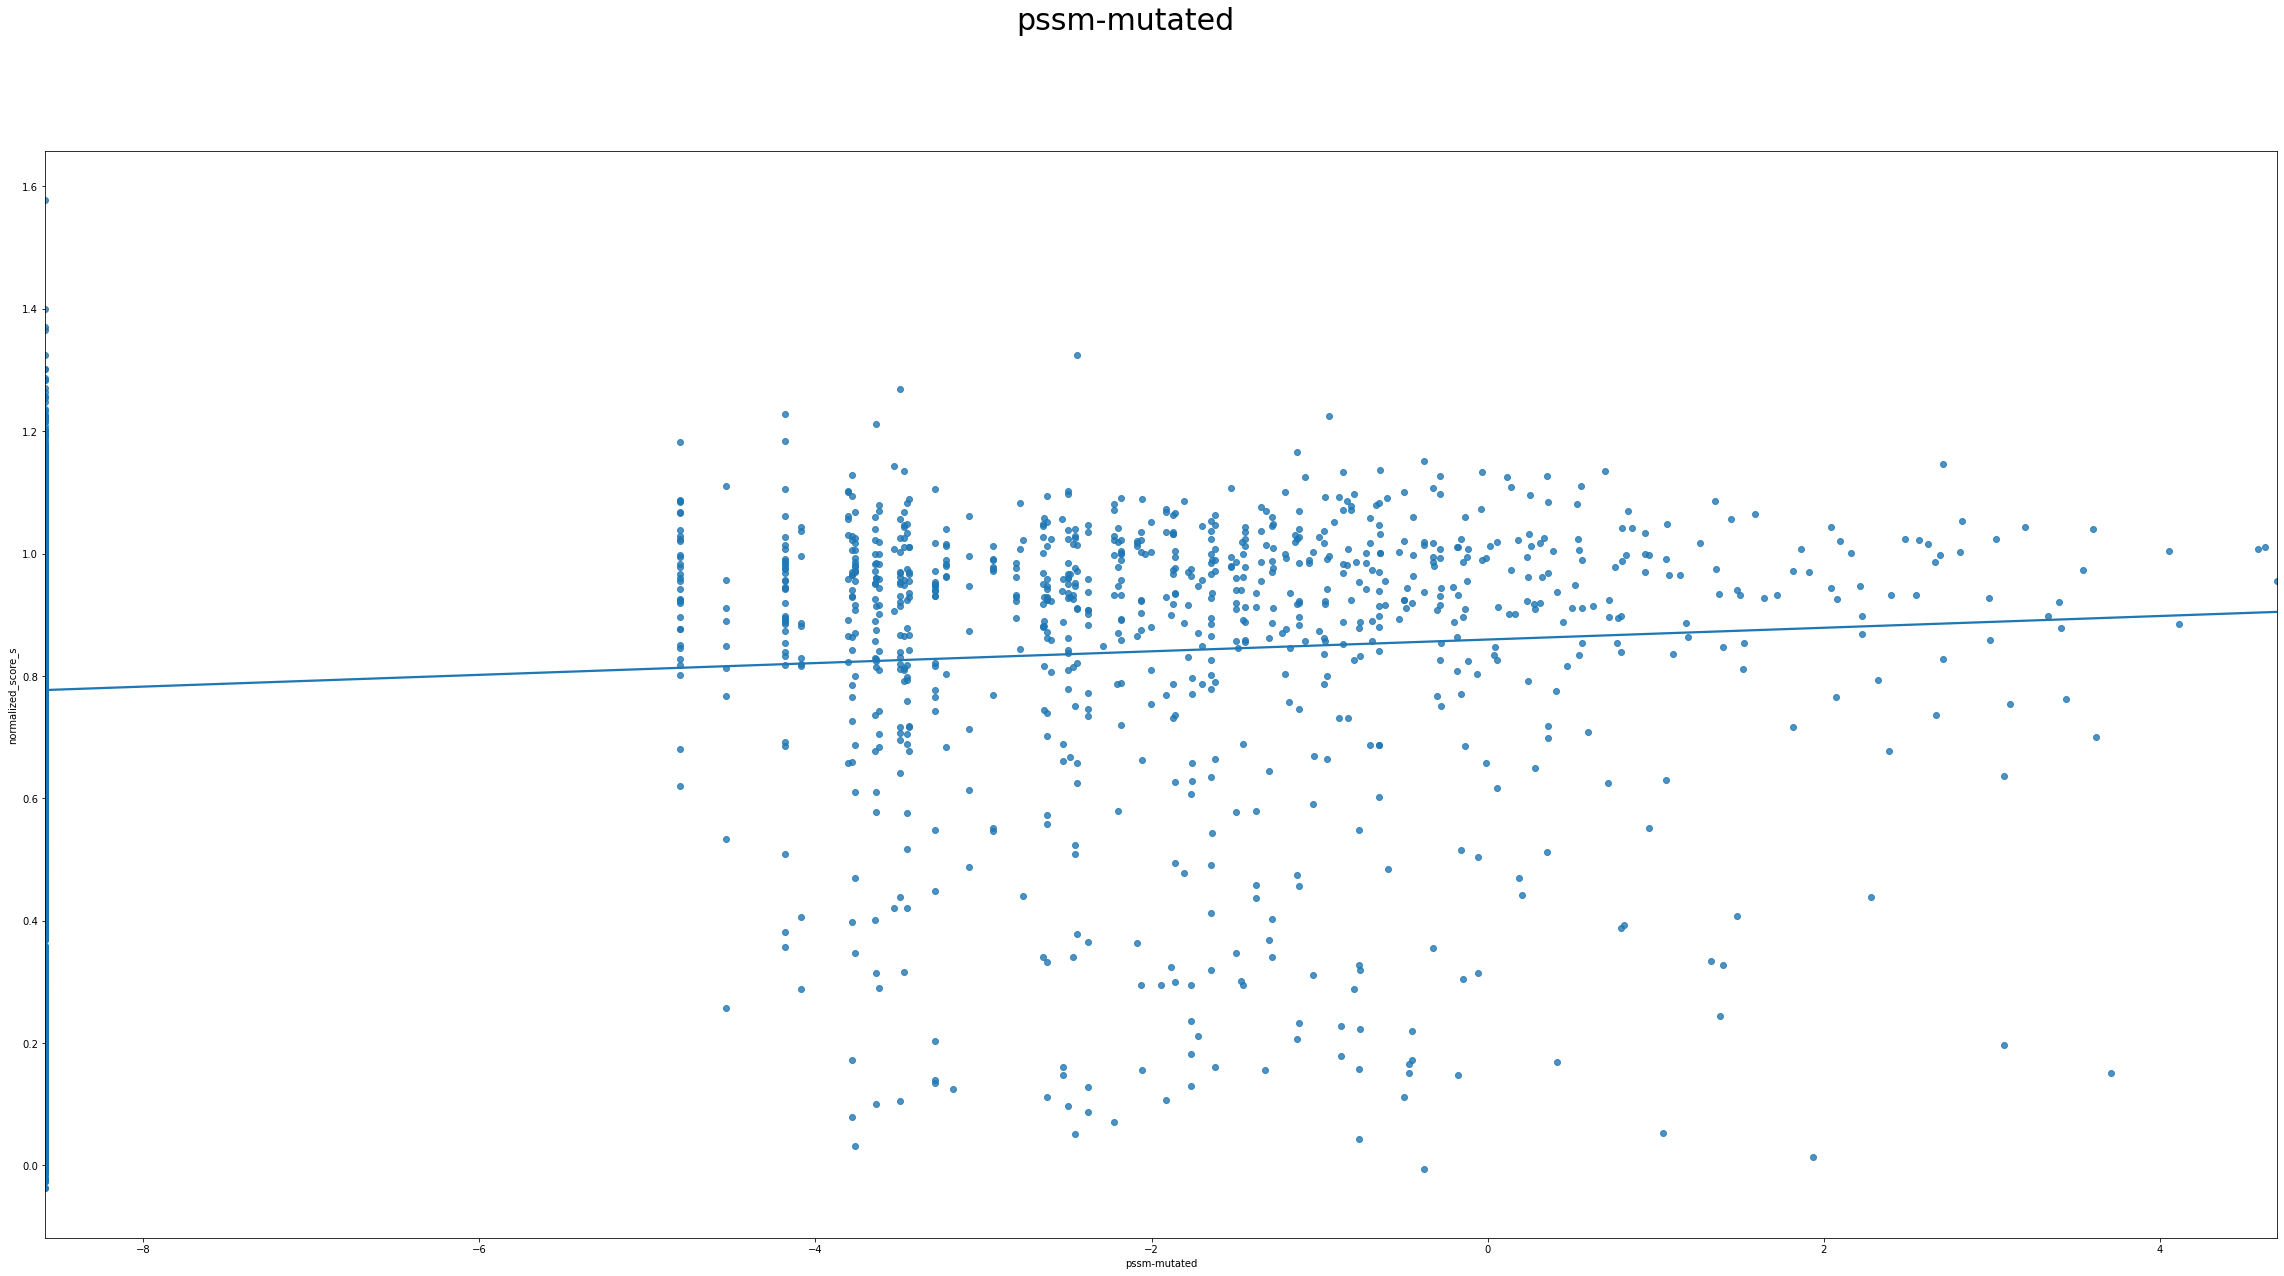

In [75]:
sns.regplot(y = 'normalized_score_s', x= 'pssm-mutated', ci = None, data = brac1_e3_merged)
plt.suptitle("pssm-mutated", size=30)

Text(0.5, 0.98, 'entropy')

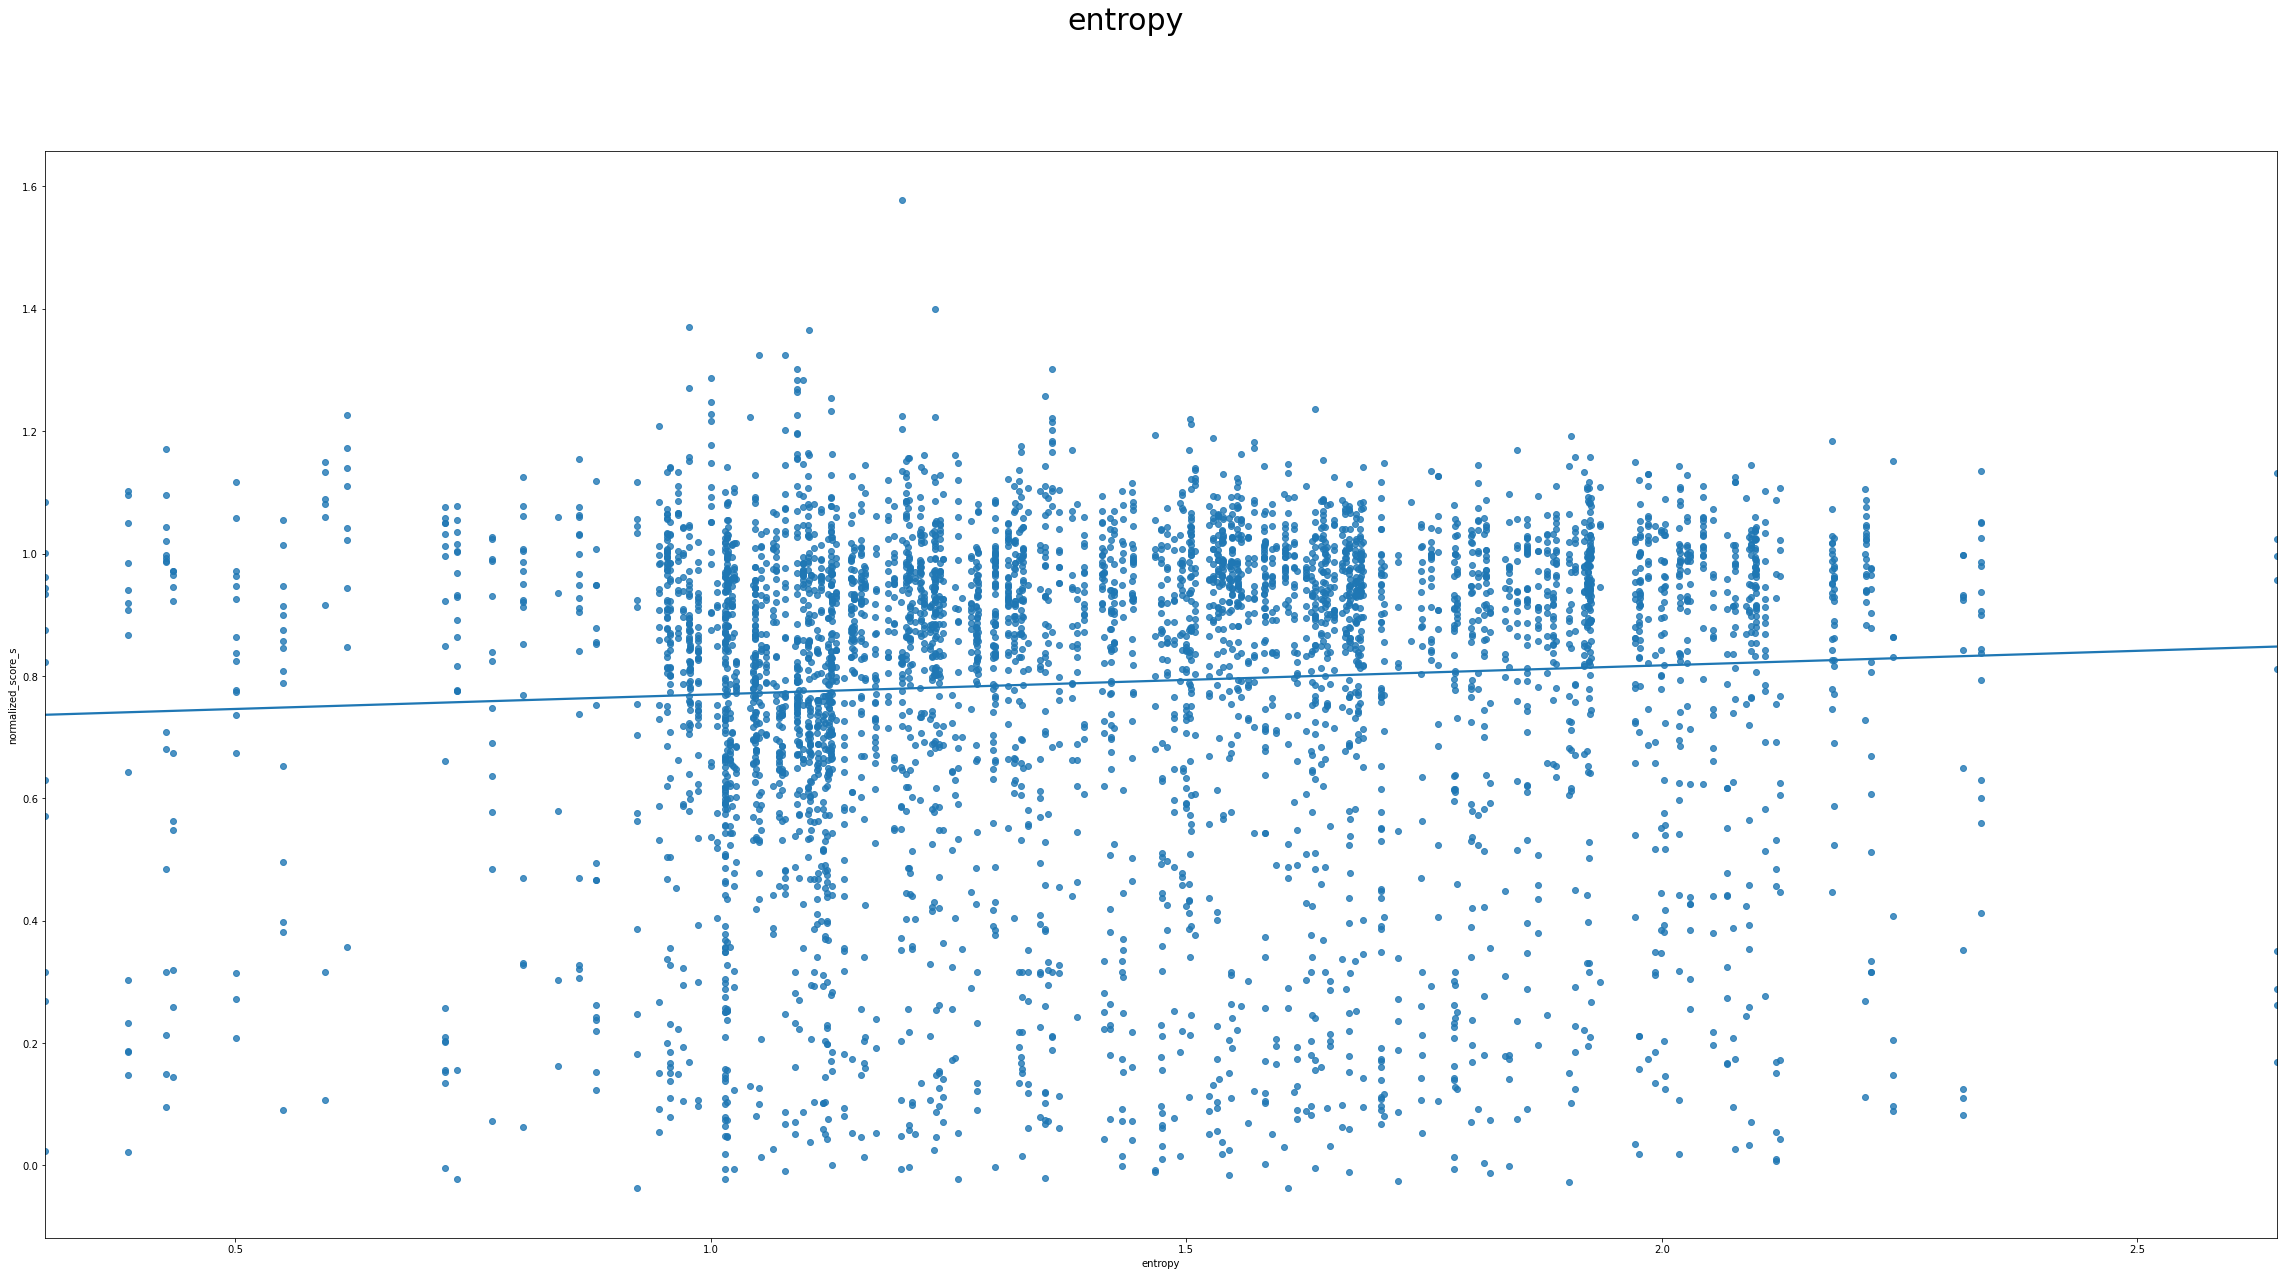

In [81]:
sns.regplot(y = 'normalized_score_s', x = 'entropy', ci = None, data = brac1_e3_merged)
plt.suptitle("entropy", size=30)

Text(0.5, 0.98, 'freqGaps')

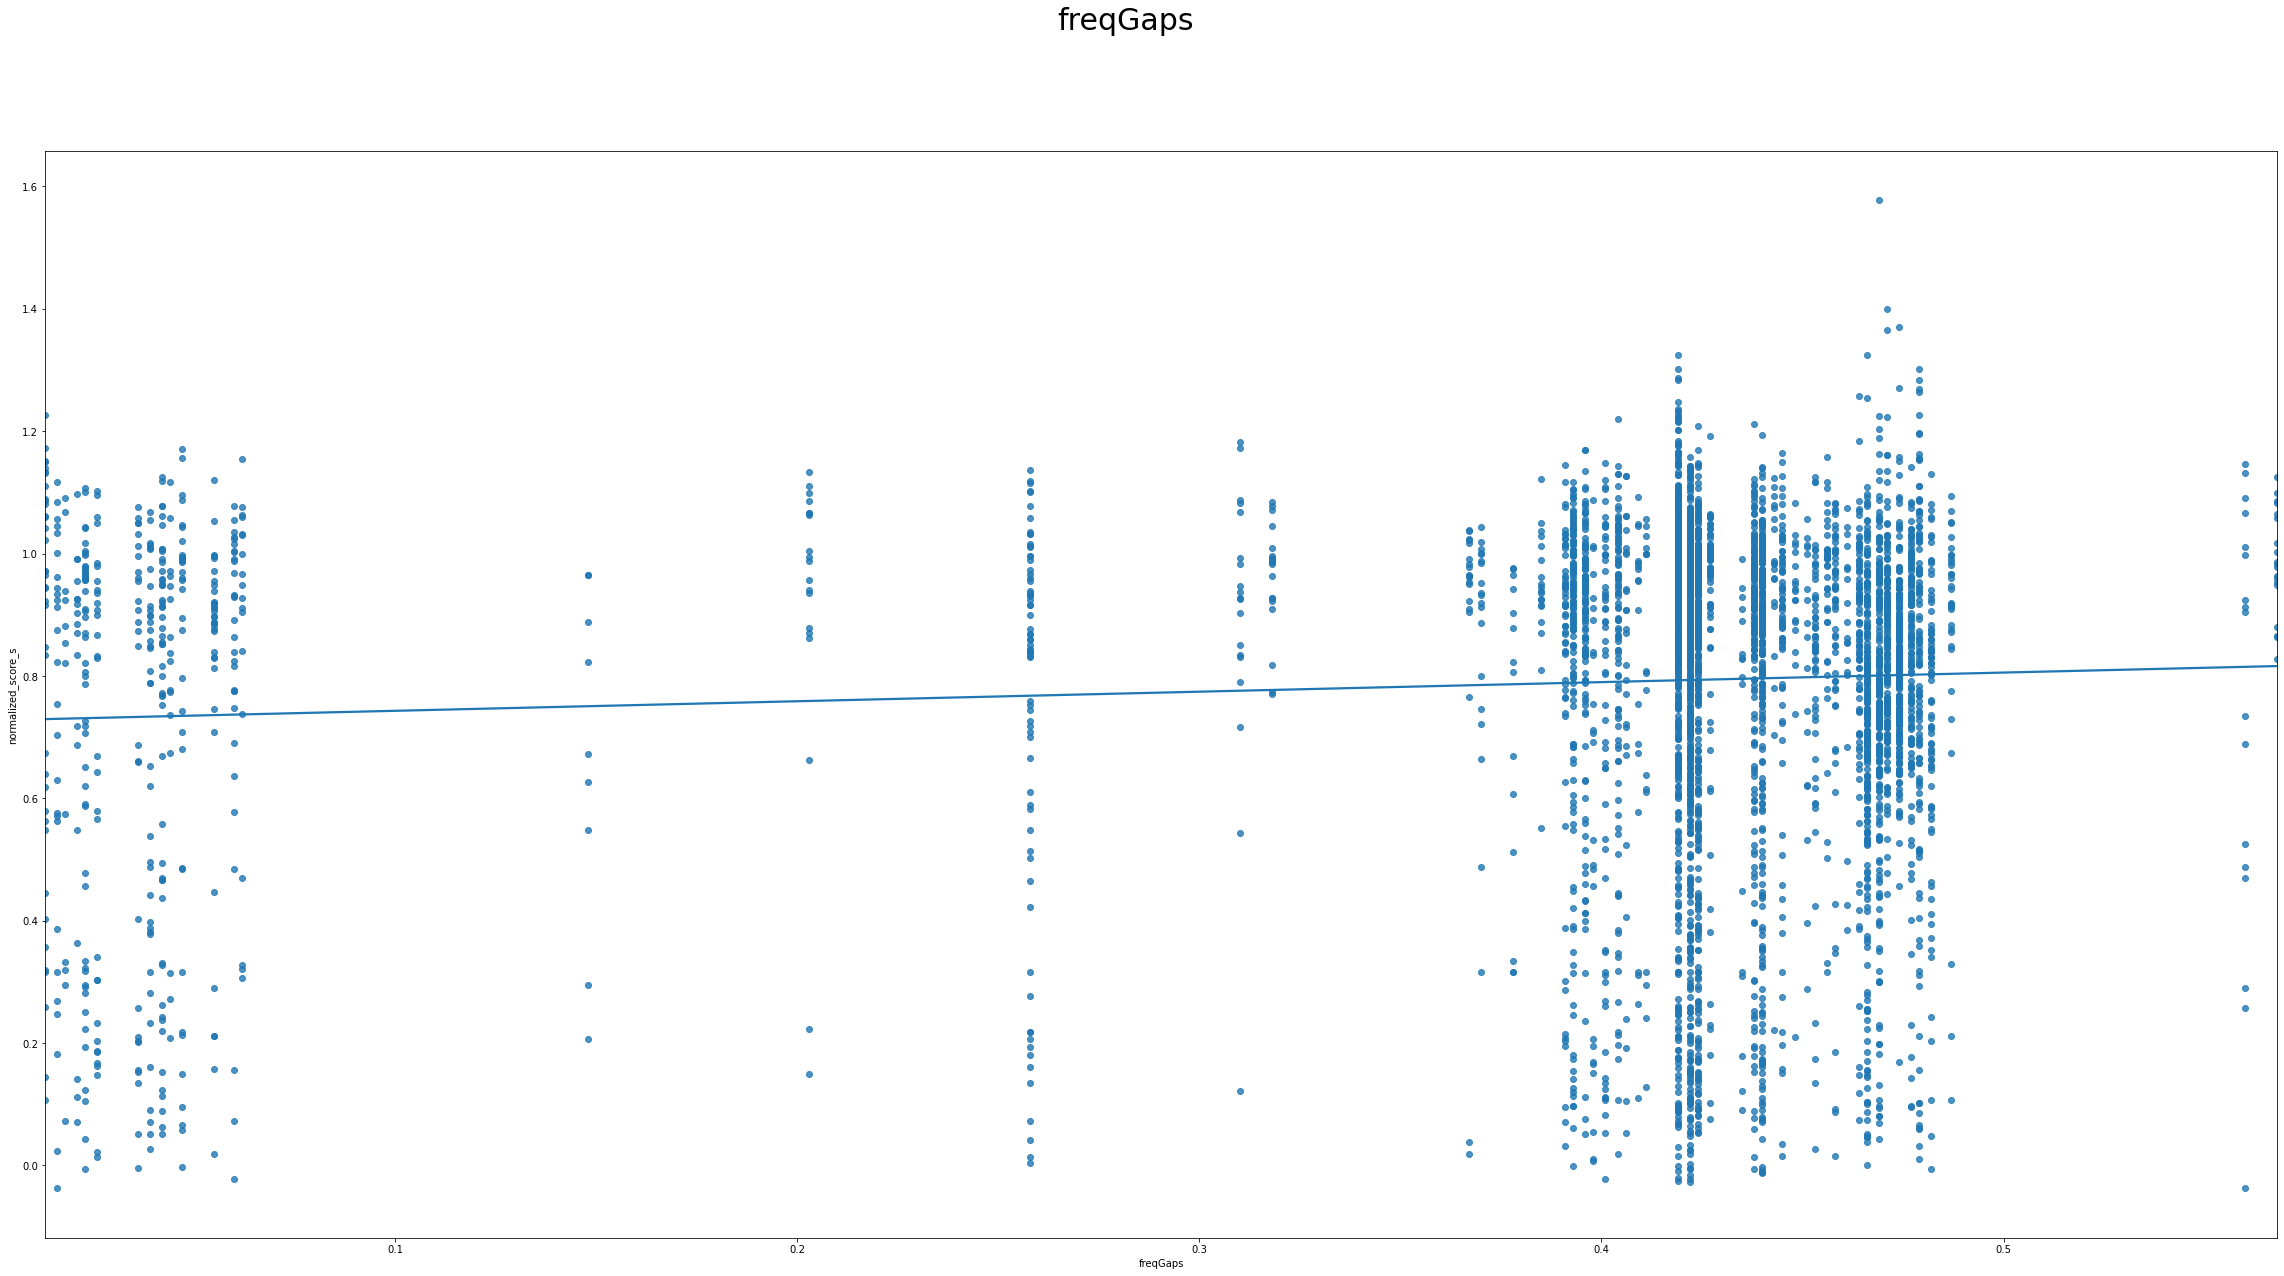

In [147]:
sns.regplot(y = 'normalized_score_s', x = 'freqGaps', ci = None, data = brac1_e3_merged) 
plt.suptitle("freqGaps", size=30)

<h1>## MAKE A SUBPLOT OF THEM</h1

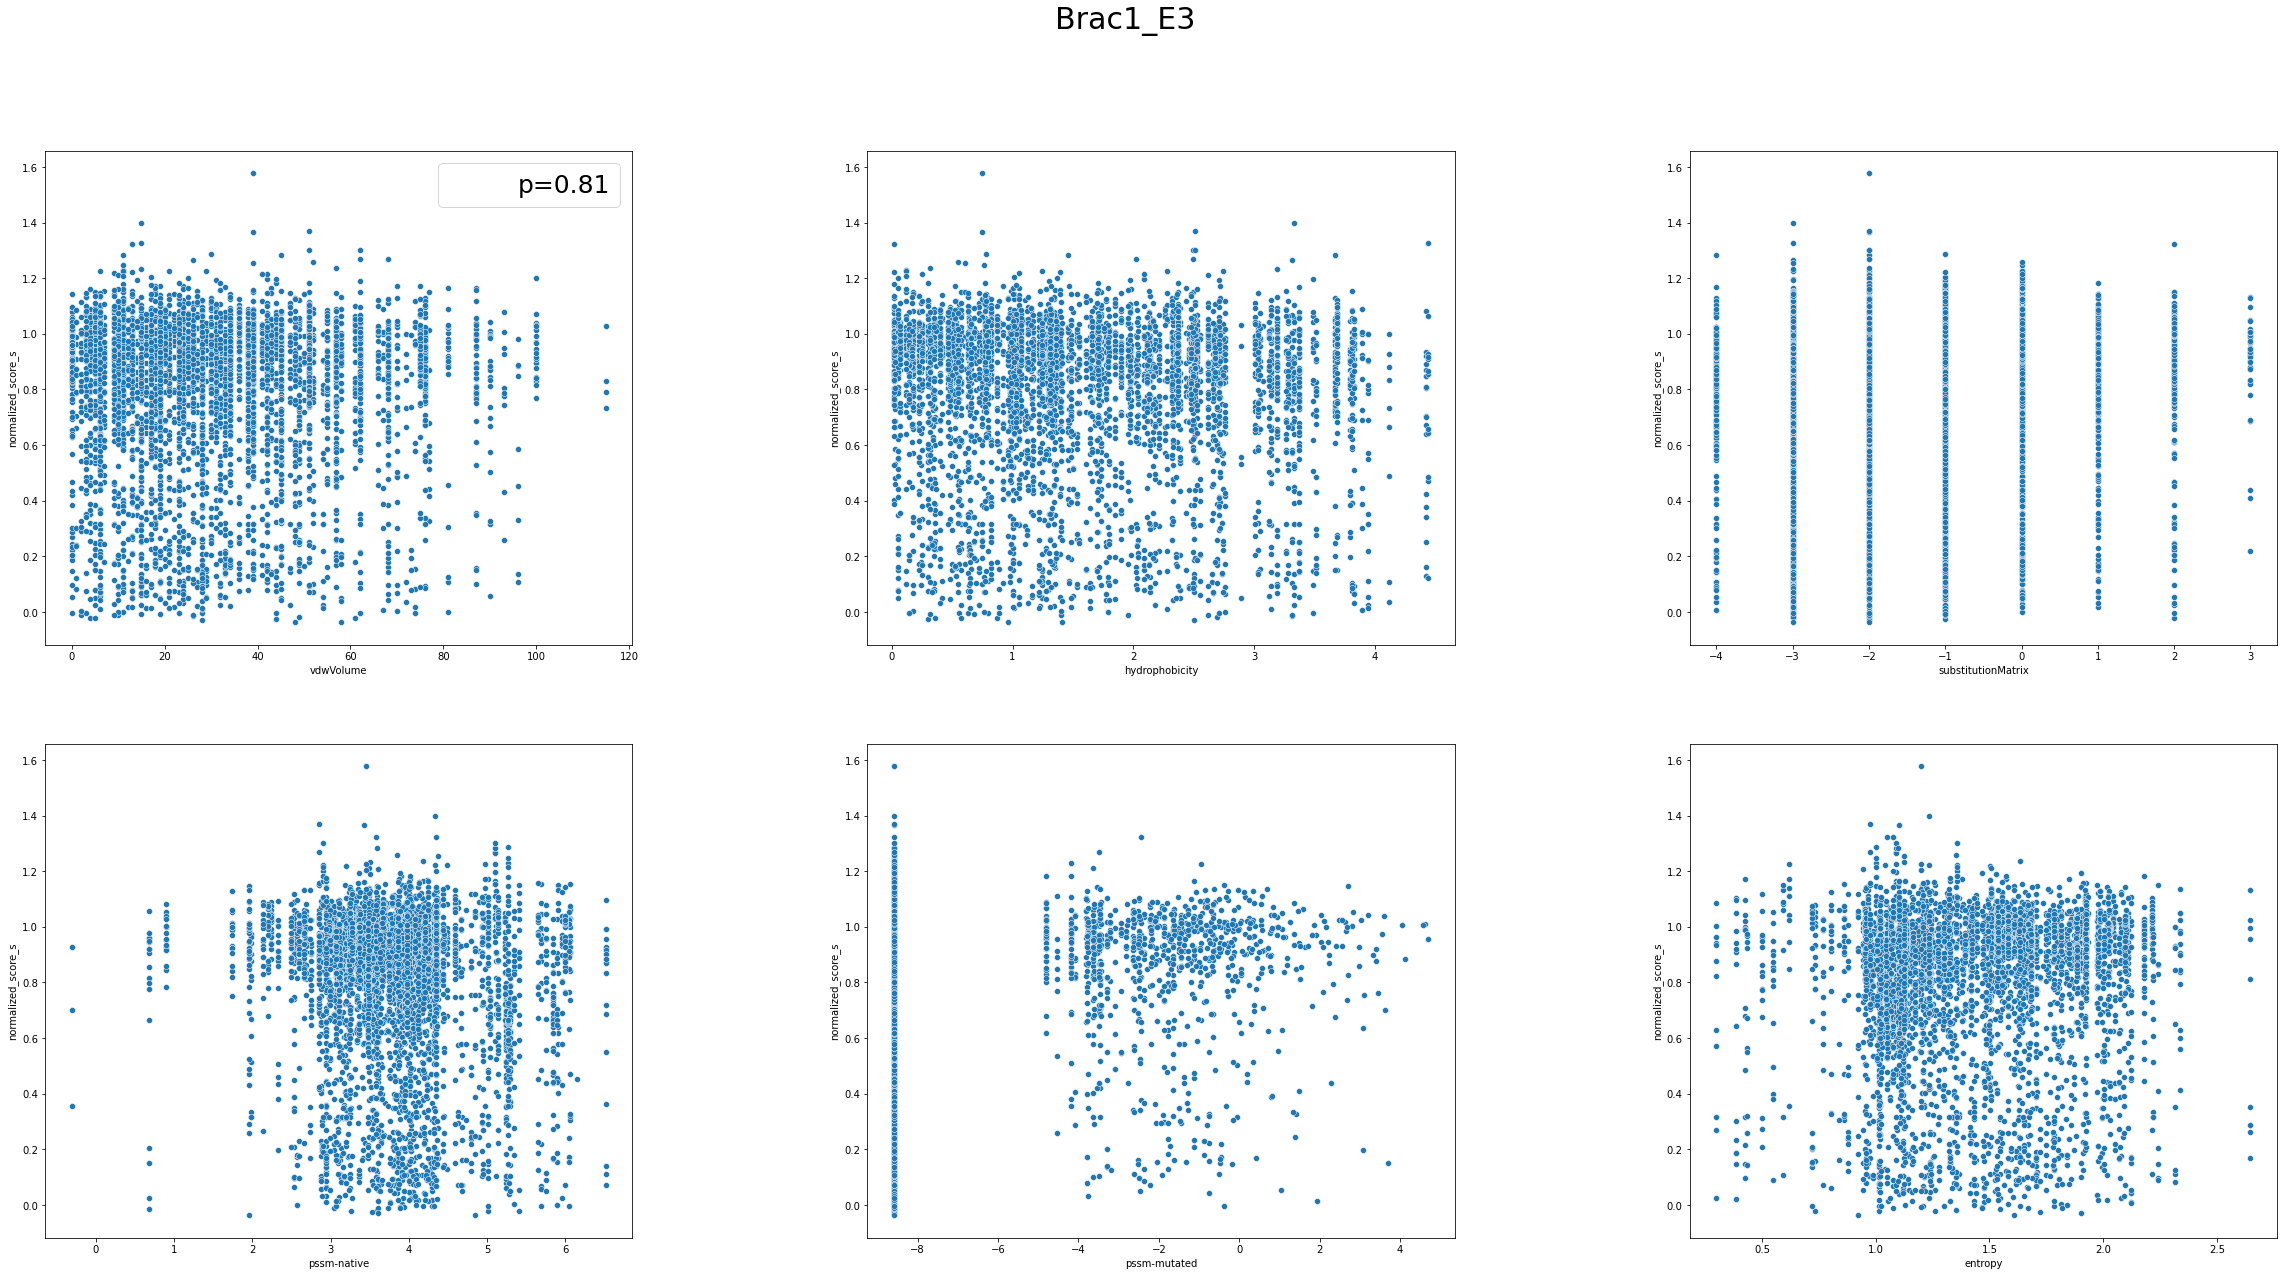

In [180]:
plt.subplots_adjust(wspace=0.4)
plt.suptitle("Brac1_E3", size=30)

plot1 = plt.subplot(2,3,1)
plot1 = sns.scatterplot(x ='vdwVolume',y = 'normalized_score_s', data=brac1_e3_merged)
r, p = stats.pearsonr(brac1_e3_merged["normalized_score_s"],brac1_e3_merged["vdwVolume"] )
phantom, = plot1.plot([], [], linestyle="", alpha=0)
plot1.legend([phantom],['p={:.2f}'.format(p)], fontsize=25)

plot2 = plt.subplot(2,3,2)
plot2 = sns.scatterplot(x ='hydrophobicity', y ='normalized_score_s', data=brac1_e3_merged)

plot3 = plt.subplot(2,3,3)
plot3 = sns.scatterplot(x ='substitutionMatrix', y ='normalized_score_s', data=brac1_e3_merged)

plot4 = plt.subplot(2,3,4)
plot4 = sns.scatterplot(x ='pssm-native', y ='normalized_score_s', data=brac1_e3_merged)

plot5 = plt.subplot(2,3,5)
plot5 = sns.scatterplot(x ='pssm-mutated', y ='normalized_score_s', data=brac1_e3_merged)

plot6 = plt.subplot(2,3,6)
plot6 = sns.scatterplot(x ='entropy', y ='normalized_score_s', data=brac1_e3_merged)


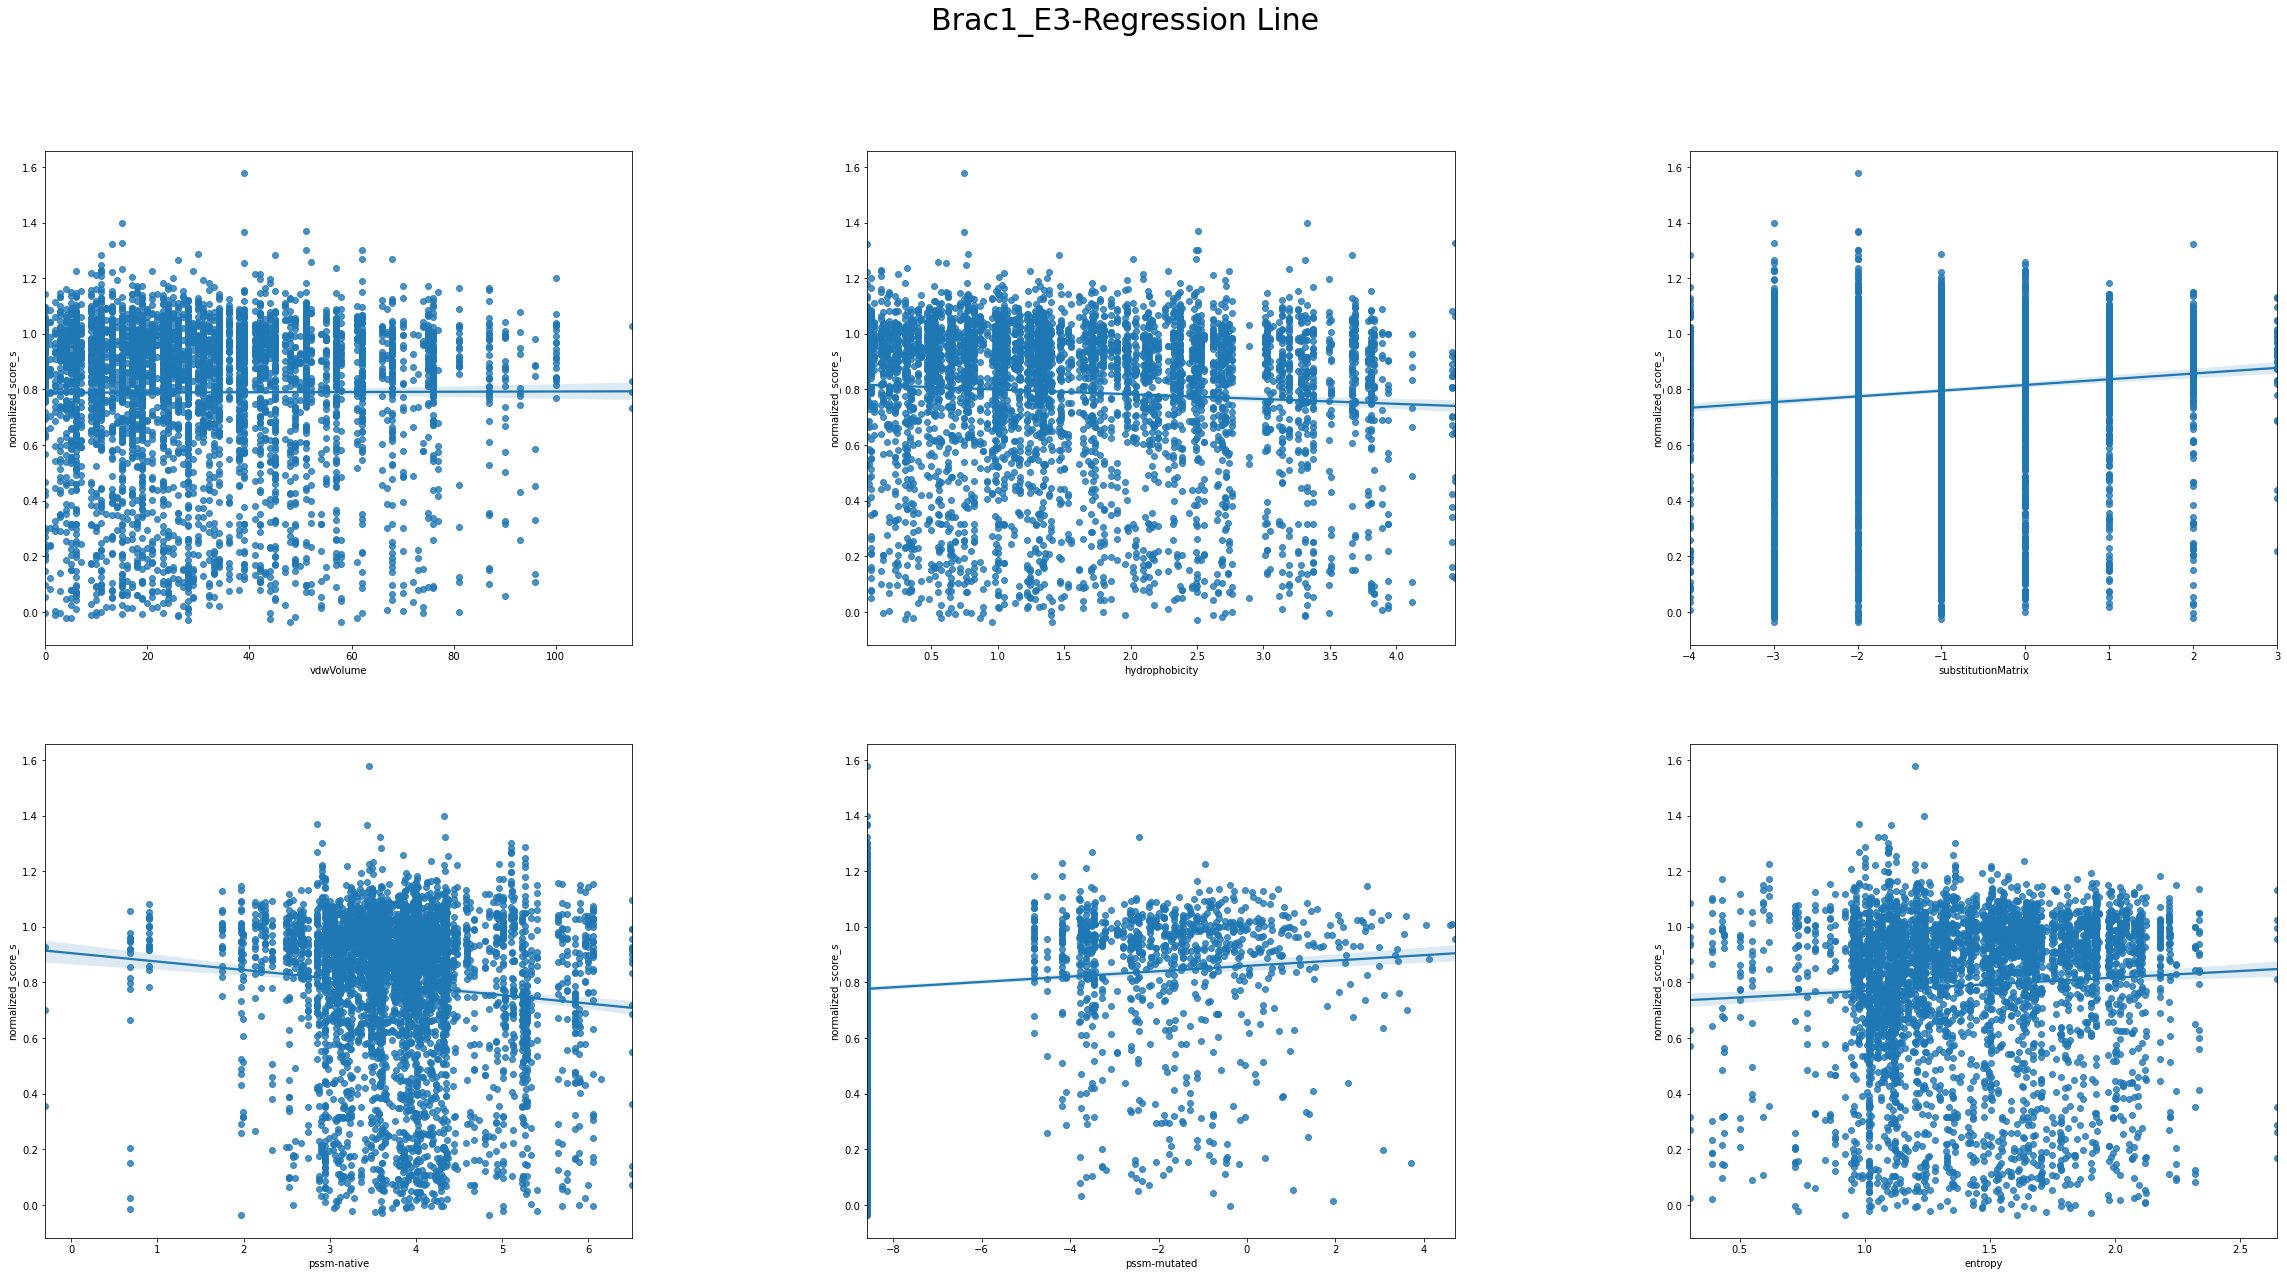

In [181]:
plt.subplots_adjust(wspace=0.4)
plt.suptitle("Brac1_E3-Regression Line", size=30)

rg1 = plt.subplot(2,3,1)
rg1 = sns.regplot(x ='vdwVolume',y = 'normalized_score_s', data=brac1_e3_merged)

rg2 = plt.subplot(2,3,2)
rg2 = sns.regplot(x ='hydrophobicity', y ='normalized_score_s', data=brac1_e3_merged)

rg3 = plt.subplot(2,3,3)
rg3 = sns.regplot(x ='substitutionMatrix', y ='normalized_score_s', data=brac1_e3_merged)

rg4 = plt.subplot(2,3,4)
rg4 = sns.regplot(x ='pssm-native', y ='normalized_score_s', data=brac1_e3_merged)

rg5 = plt.subplot(2,3,5)
rg5 = sns.regplot(x ='pssm-mutated', y ='normalized_score_s', data=brac1_e3_merged)

rg6 = plt.subplot(2,3,6)
rg6 = sns.regplot(x ='entropy', y ='normalized_score_s', data=brac1_e3_merged)


<h1>BRAC1_Y2H<h1>

Text(0.5, 0.98, 'vdwVolume')

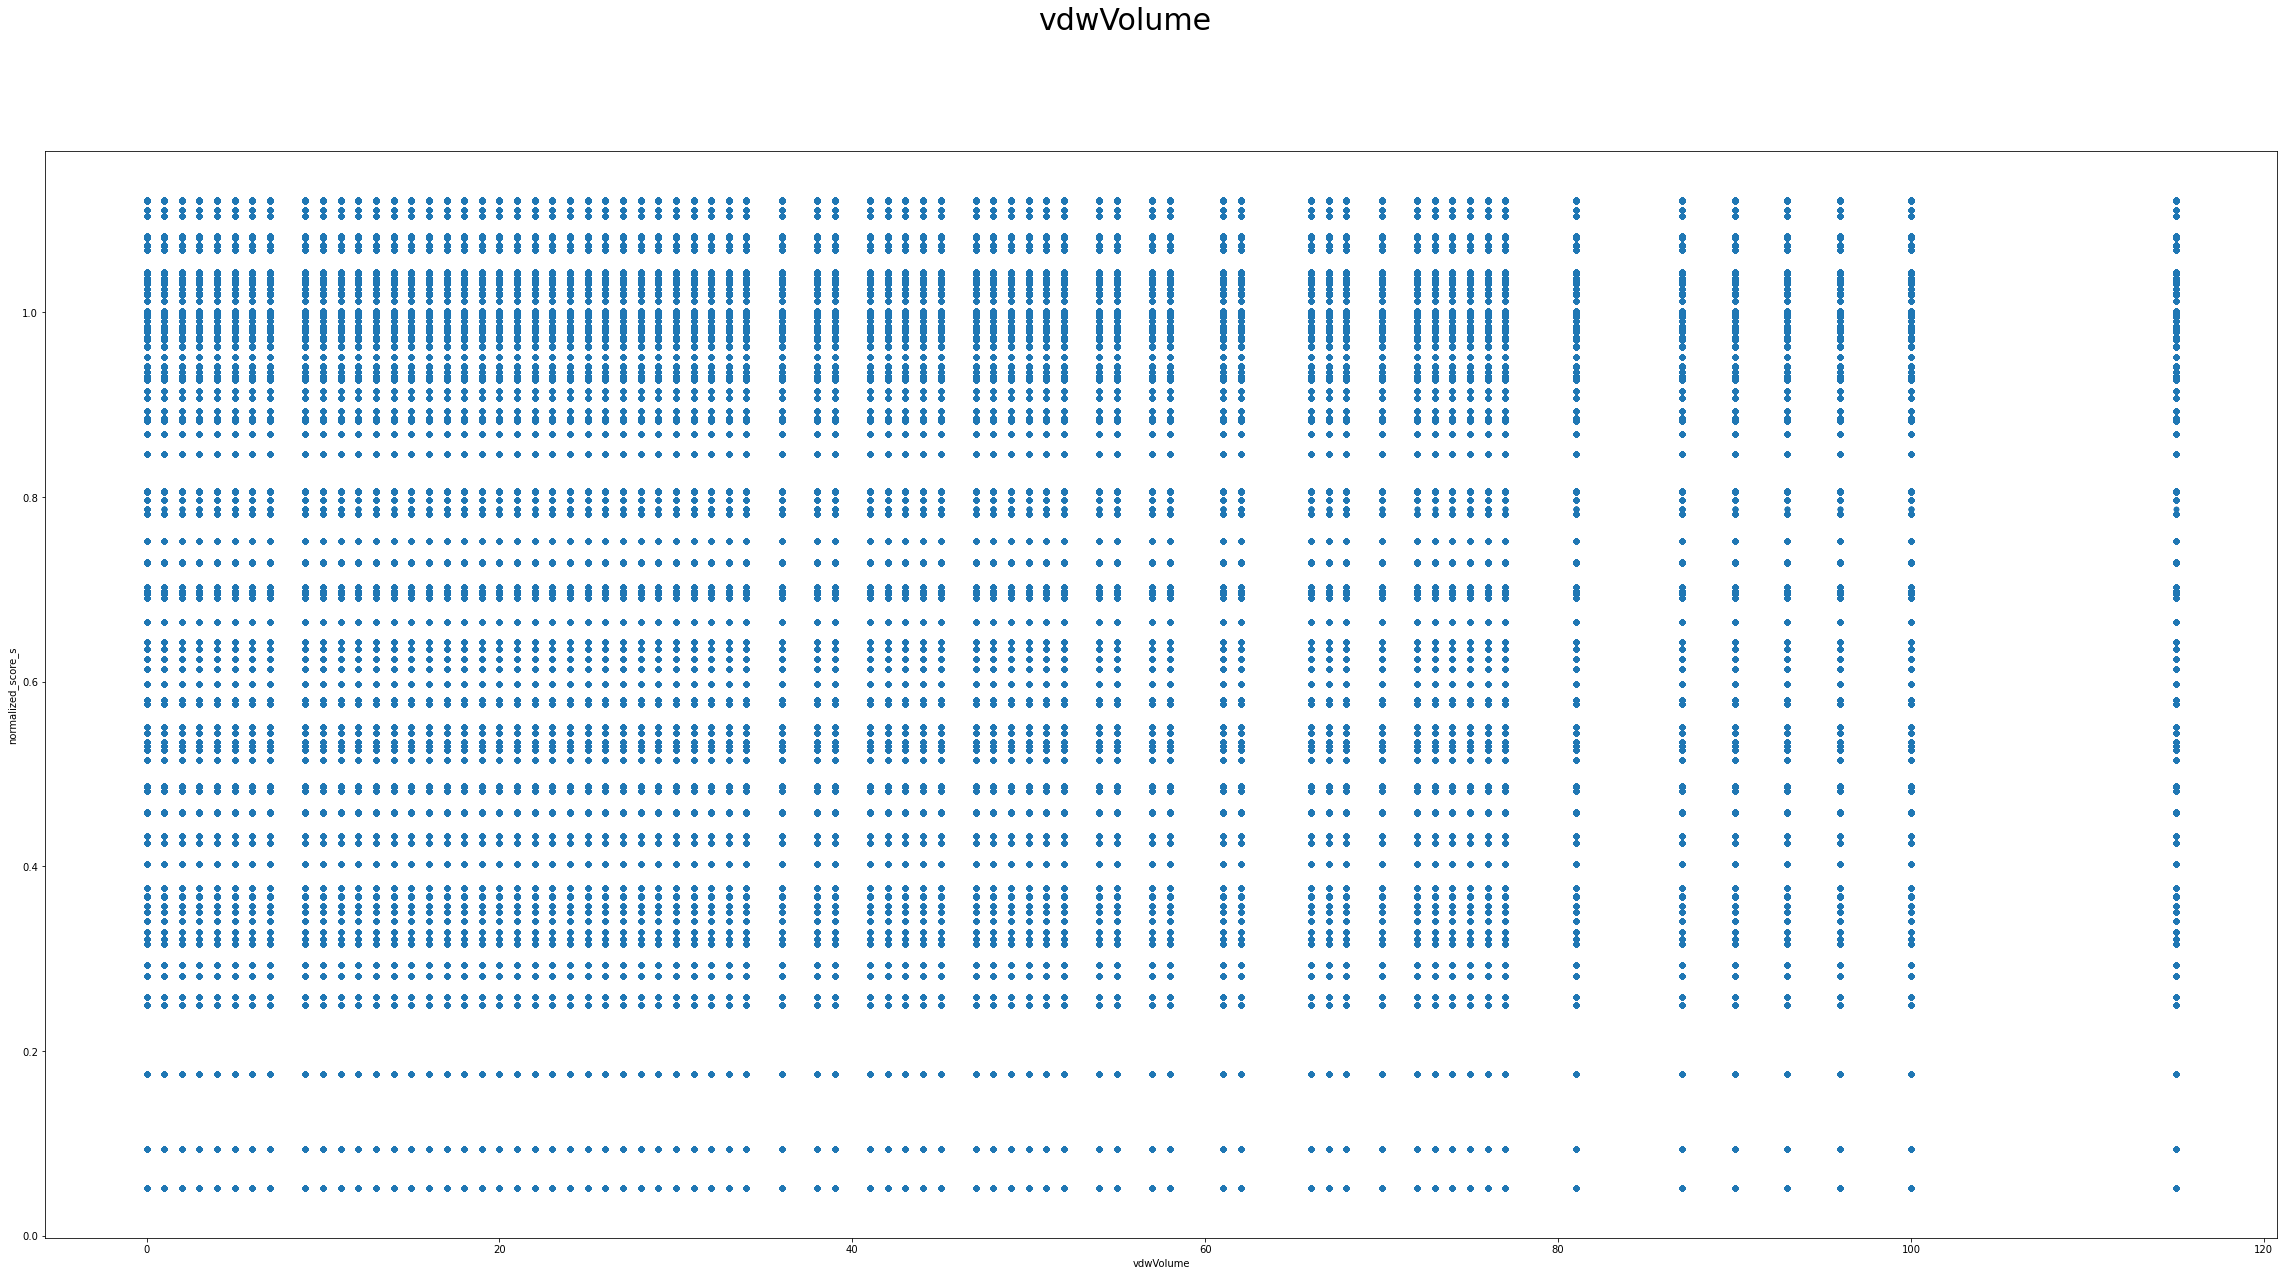

In [183]:
brac1_y2h_merged.plot.scatter(y='normalized_score_s',x='vdwVolume')
plt.suptitle("vdwVolume", size=30)

Text(0.5, 0.98, 'hydrophobicity')

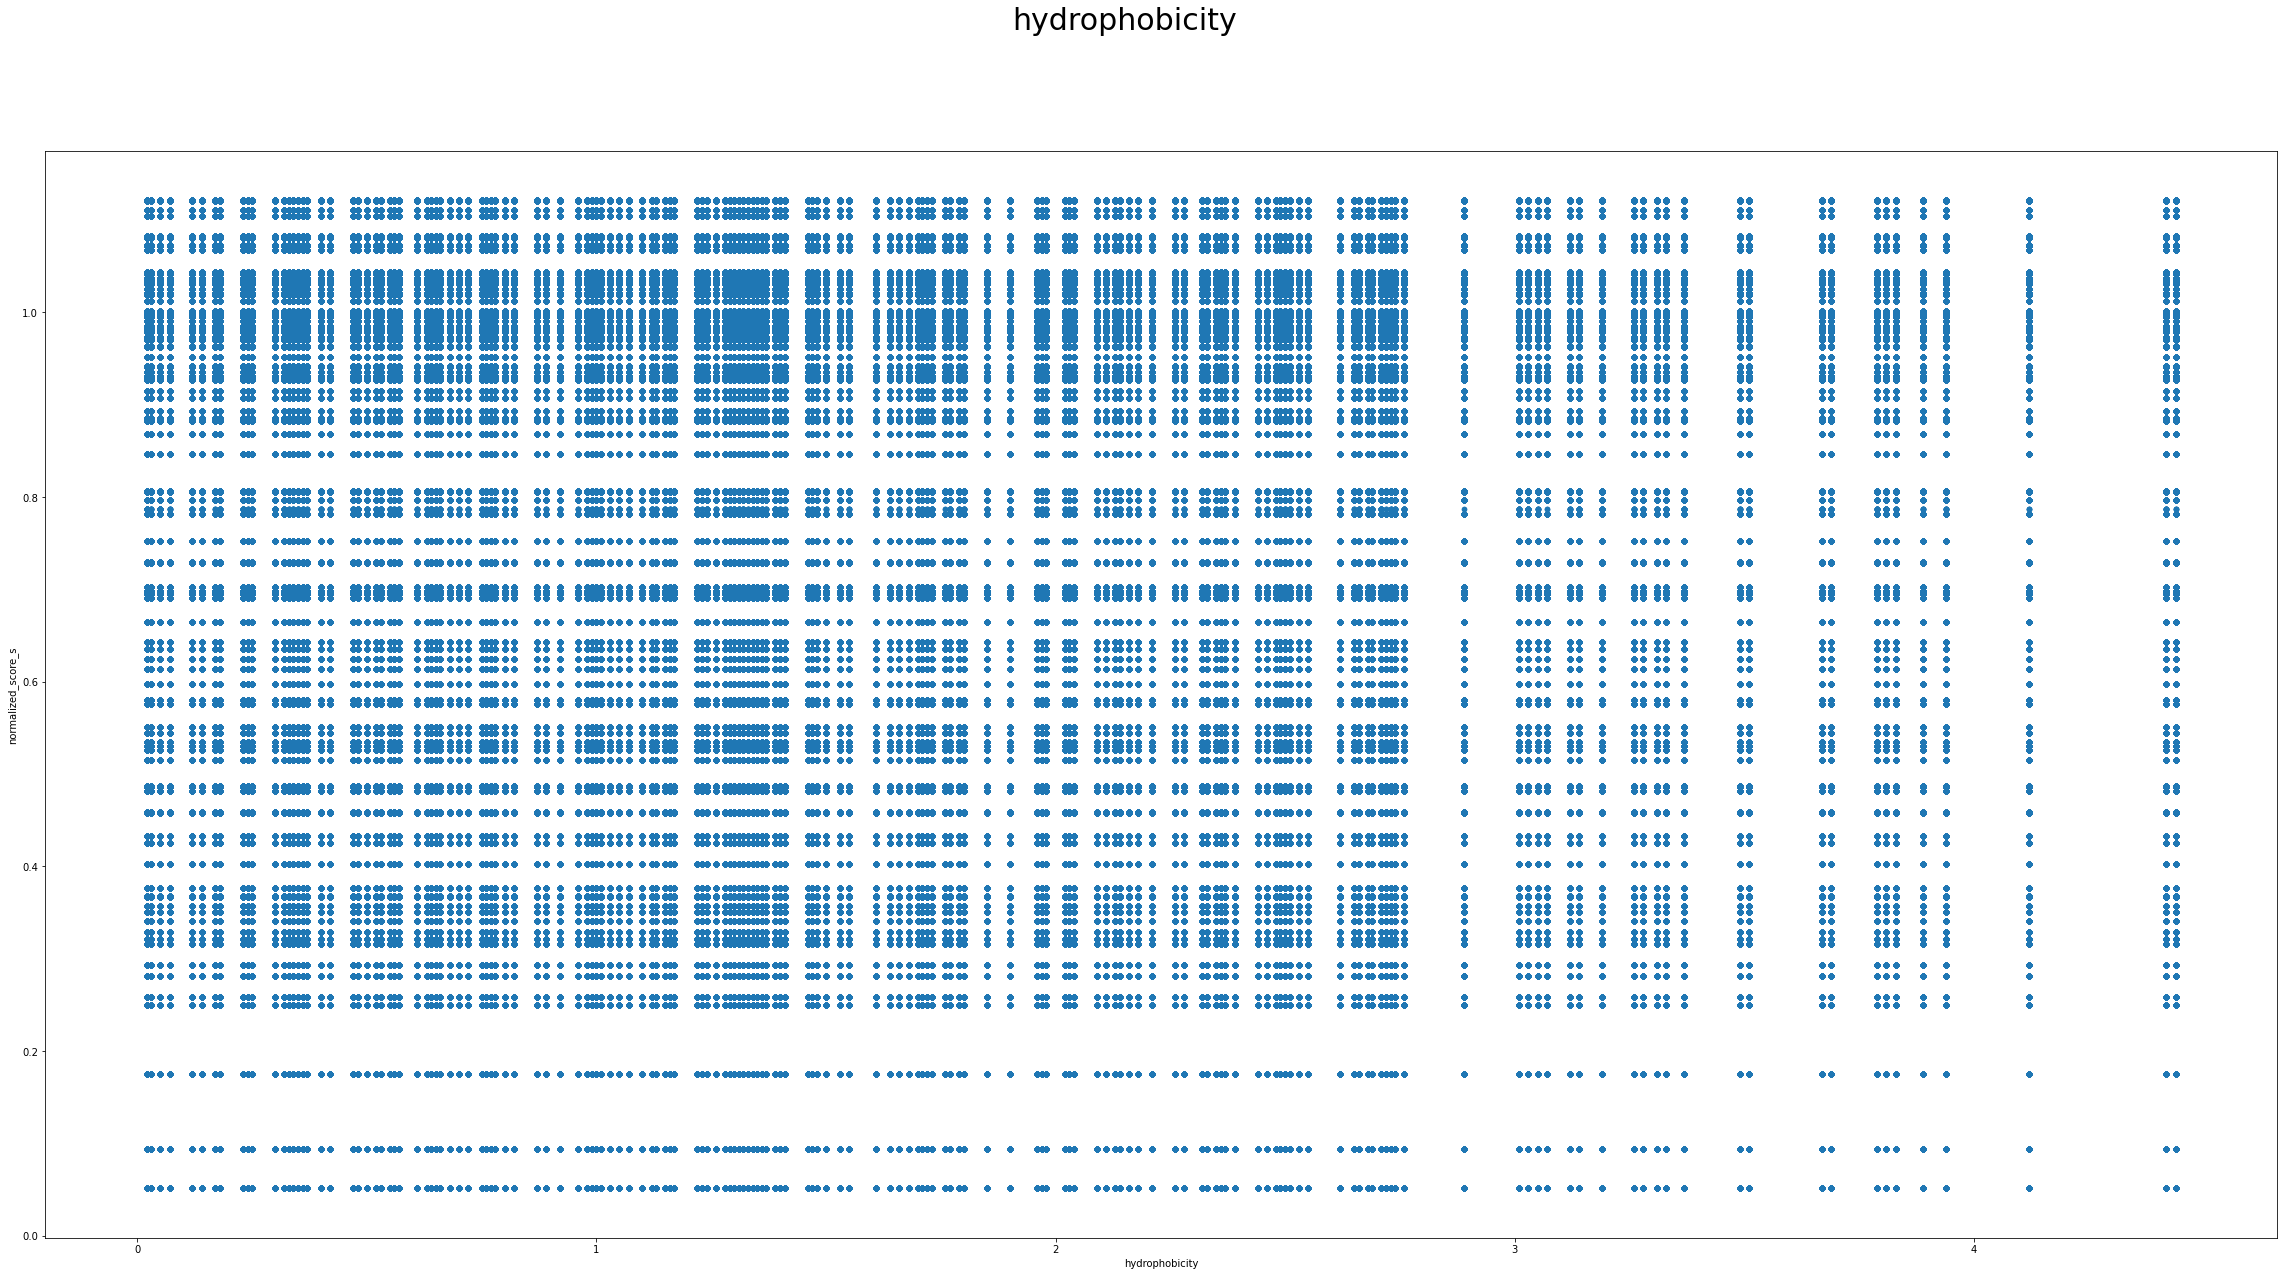

In [187]:
brac1_y2h_merged.plot.scatter(y='normalized_score_s',x='hydrophobicity')
plt.suptitle('hydrophobicity', size=30)

Text(0.5, 0.98, 'substitutionMatrix')

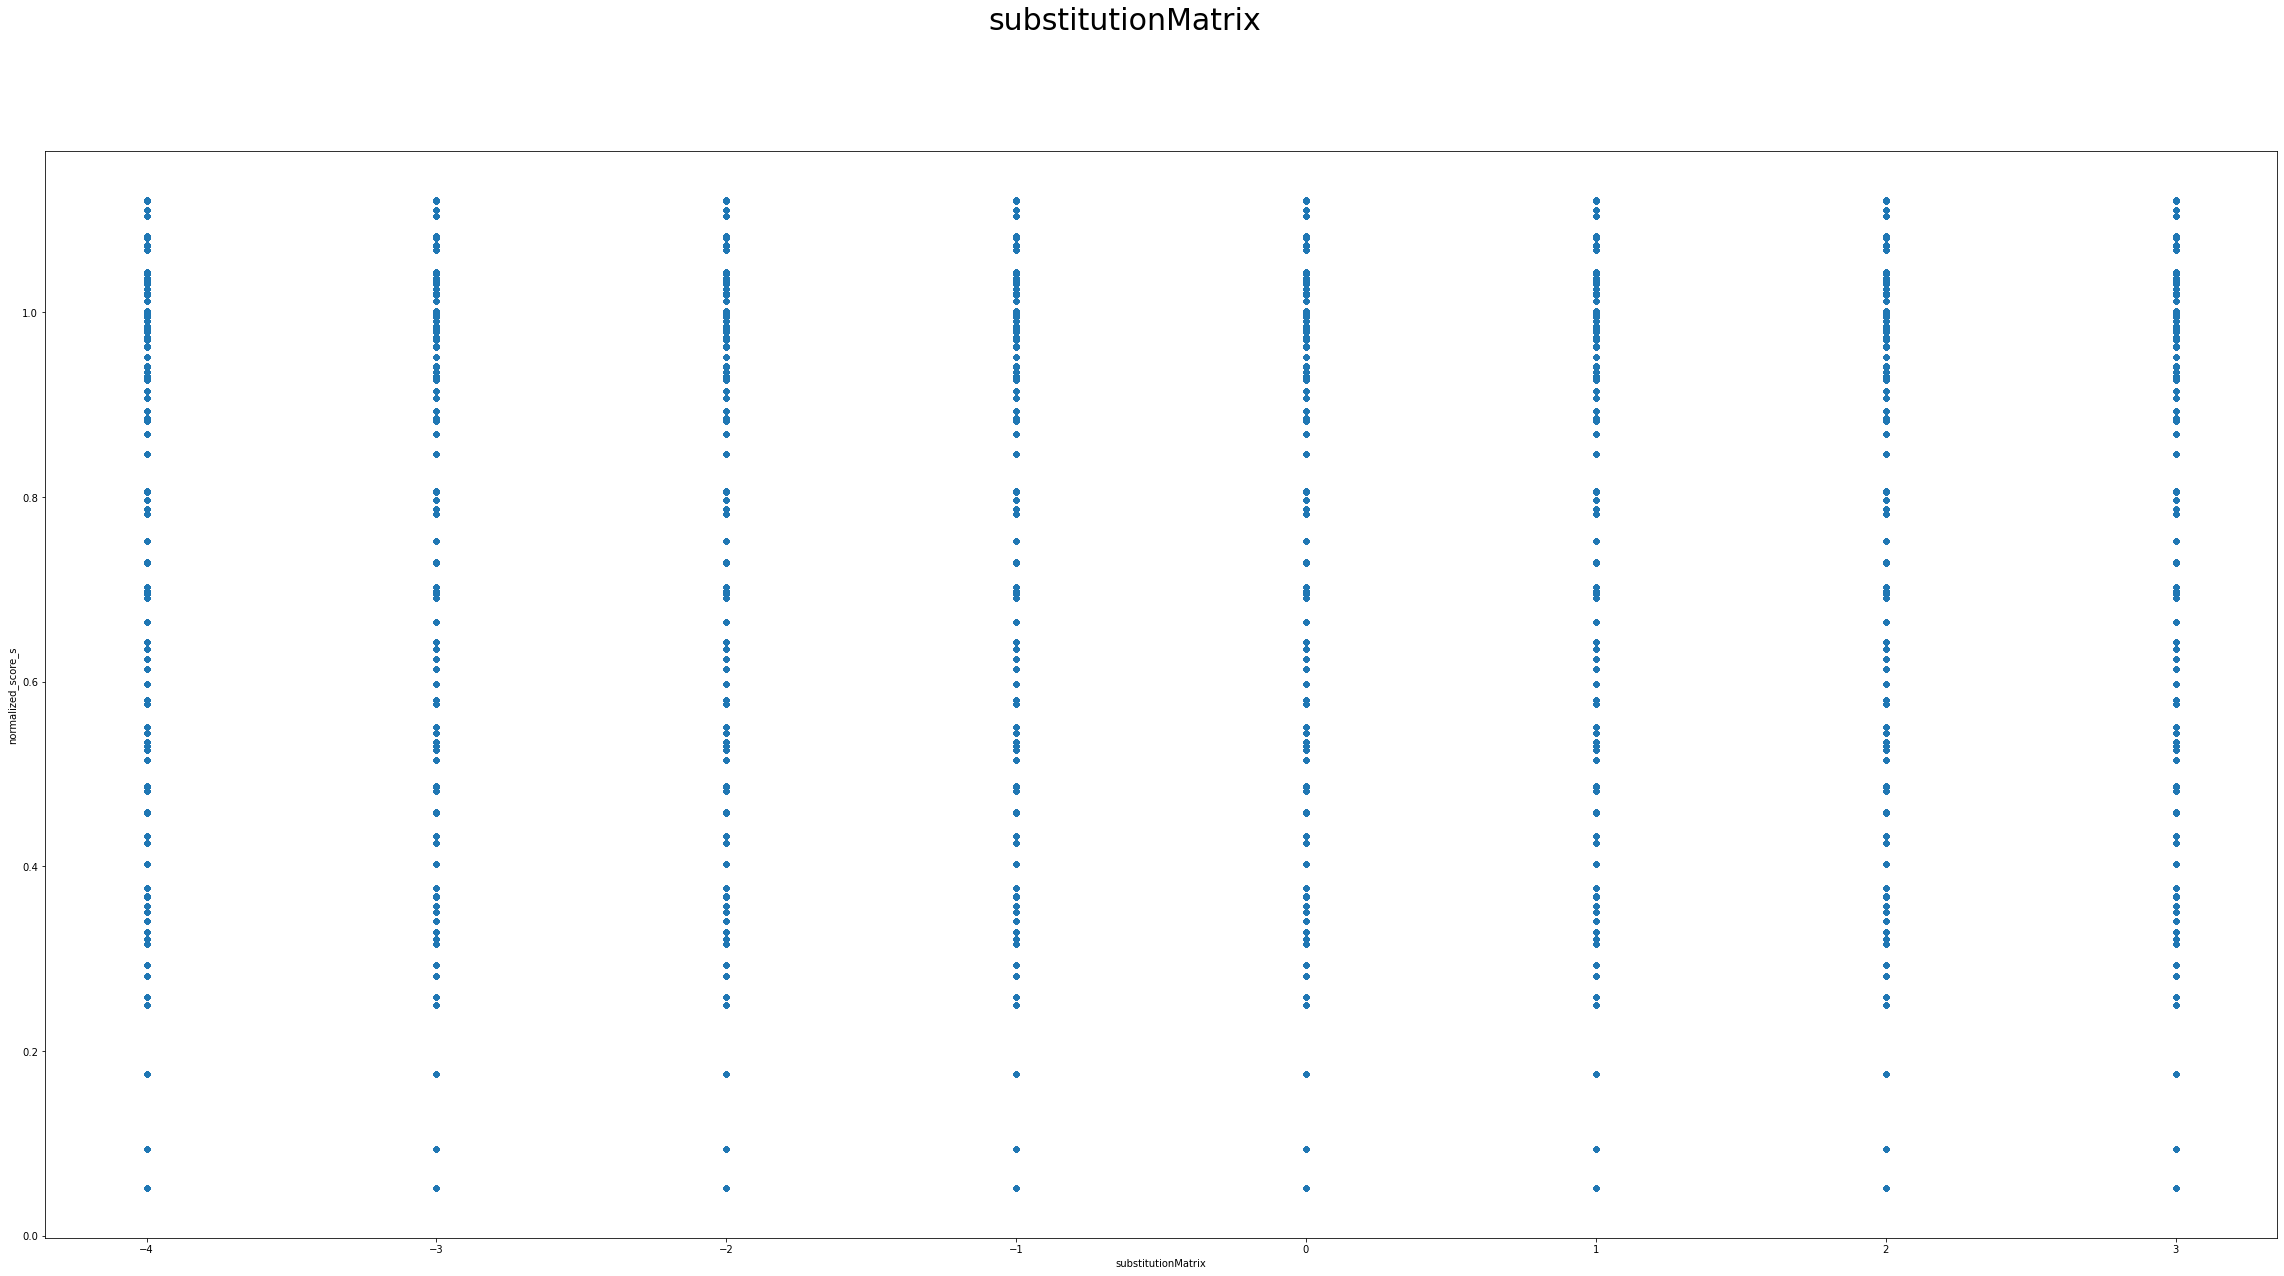

In [190]:
brac1_y2h_merged.plot.scatter(y='normalized_score_s',x='substitutionMatrix')
plt.suptitle('substitutionMatrix',size=30)

Text(0.5, 0.98, 'pssm-native')

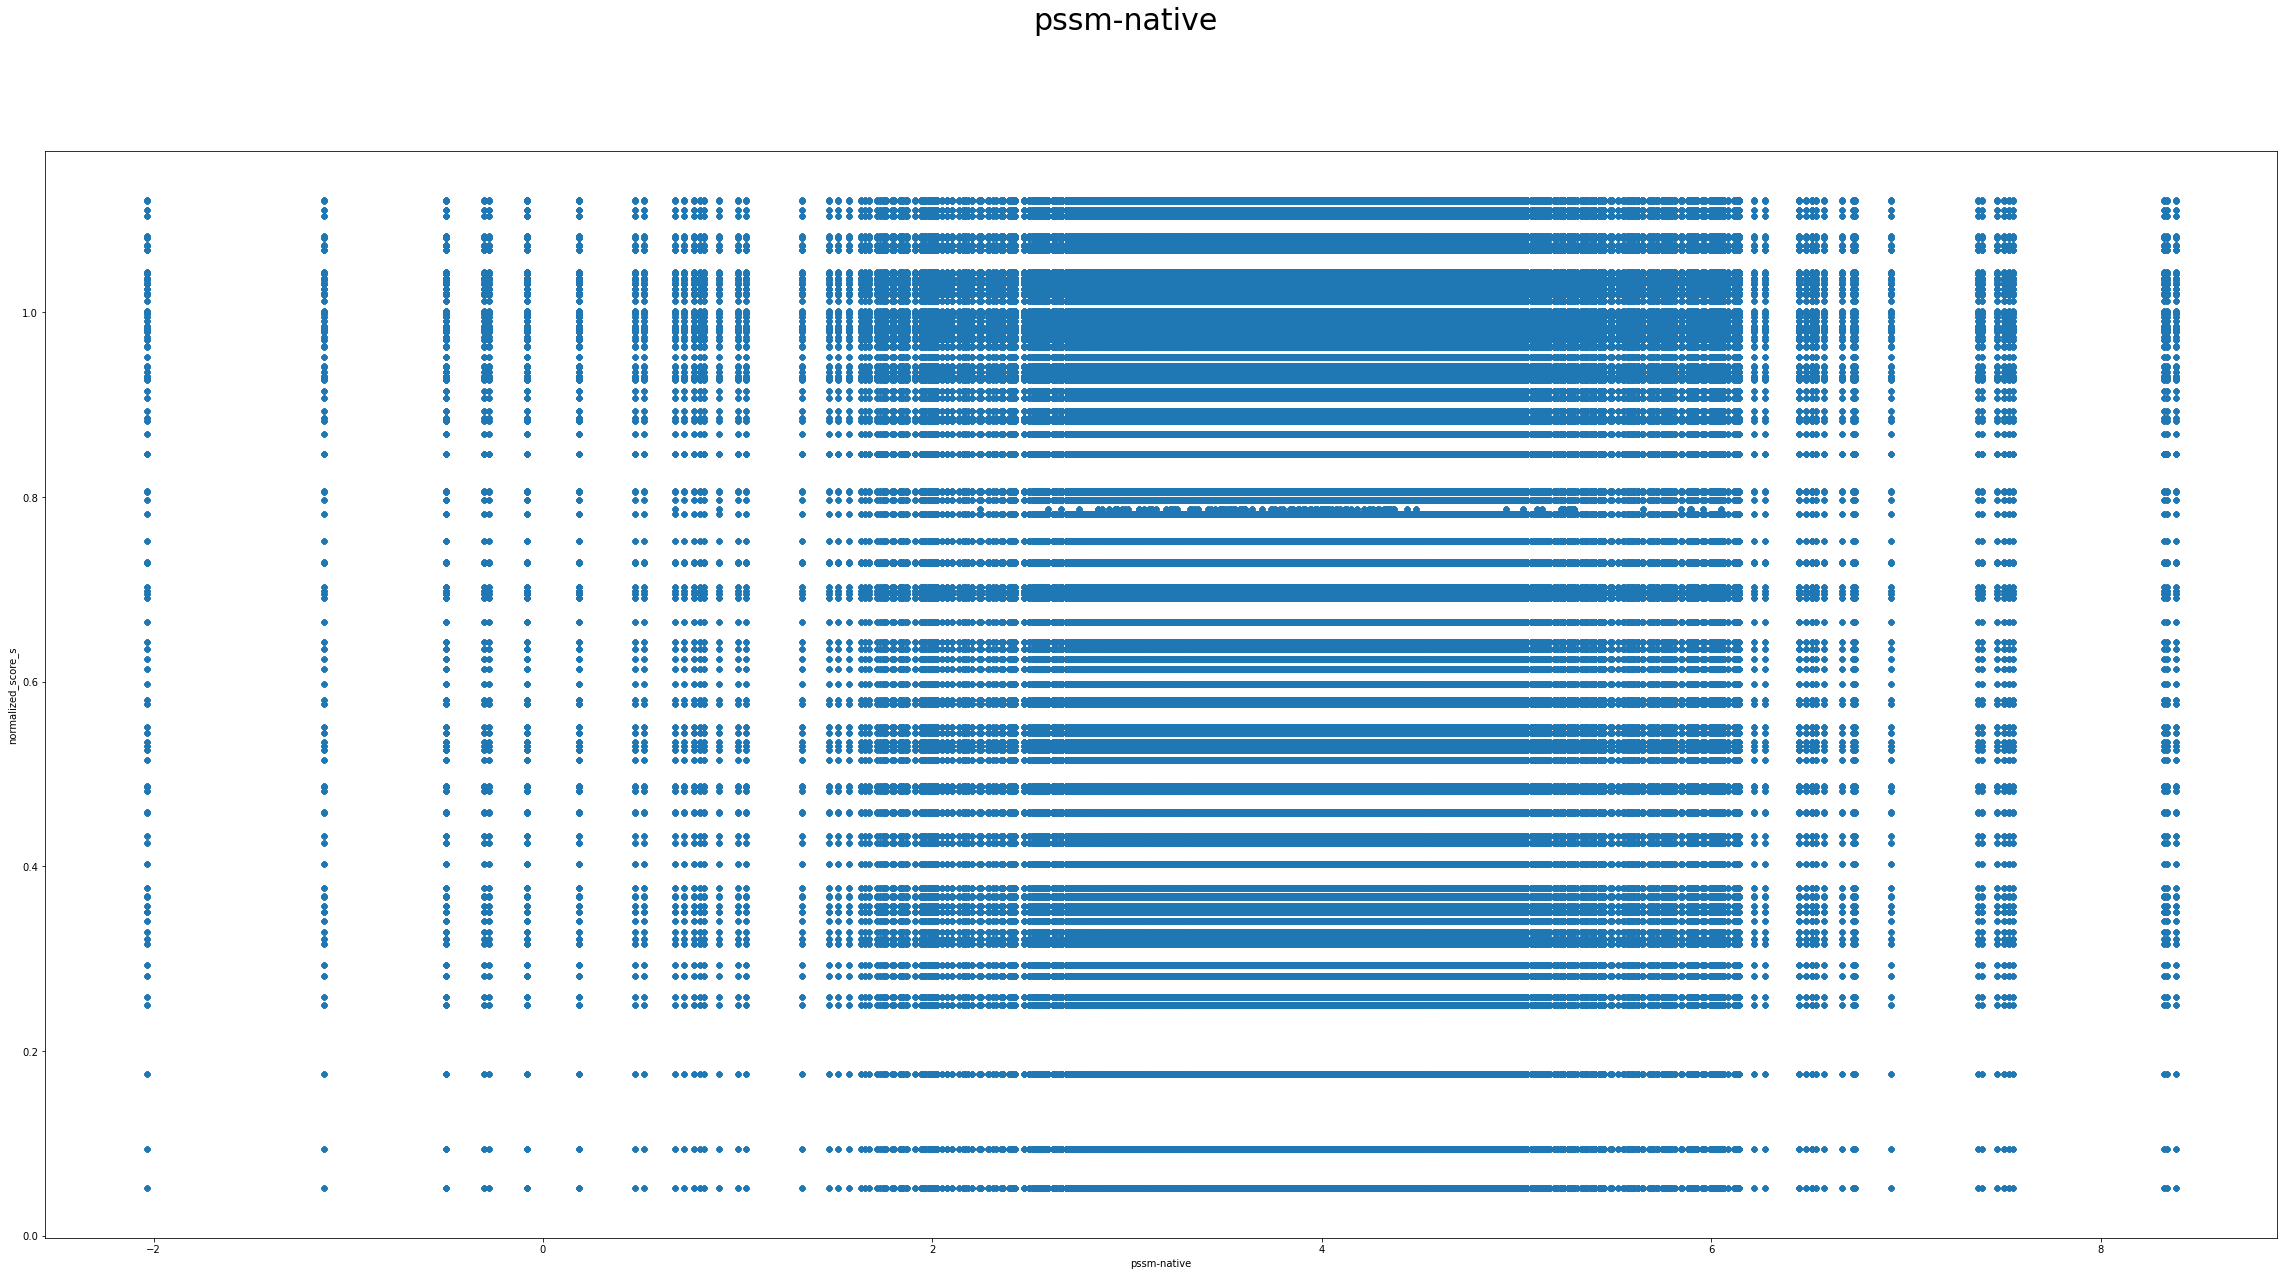

In [192]:
brac1_y2h_merged.plot.scatter(y='normalized_score_s',x='pssm-native')
plt.suptitle('pssm-native',size=30)

Text(0.5, 0.98, 'pssm-mutated')

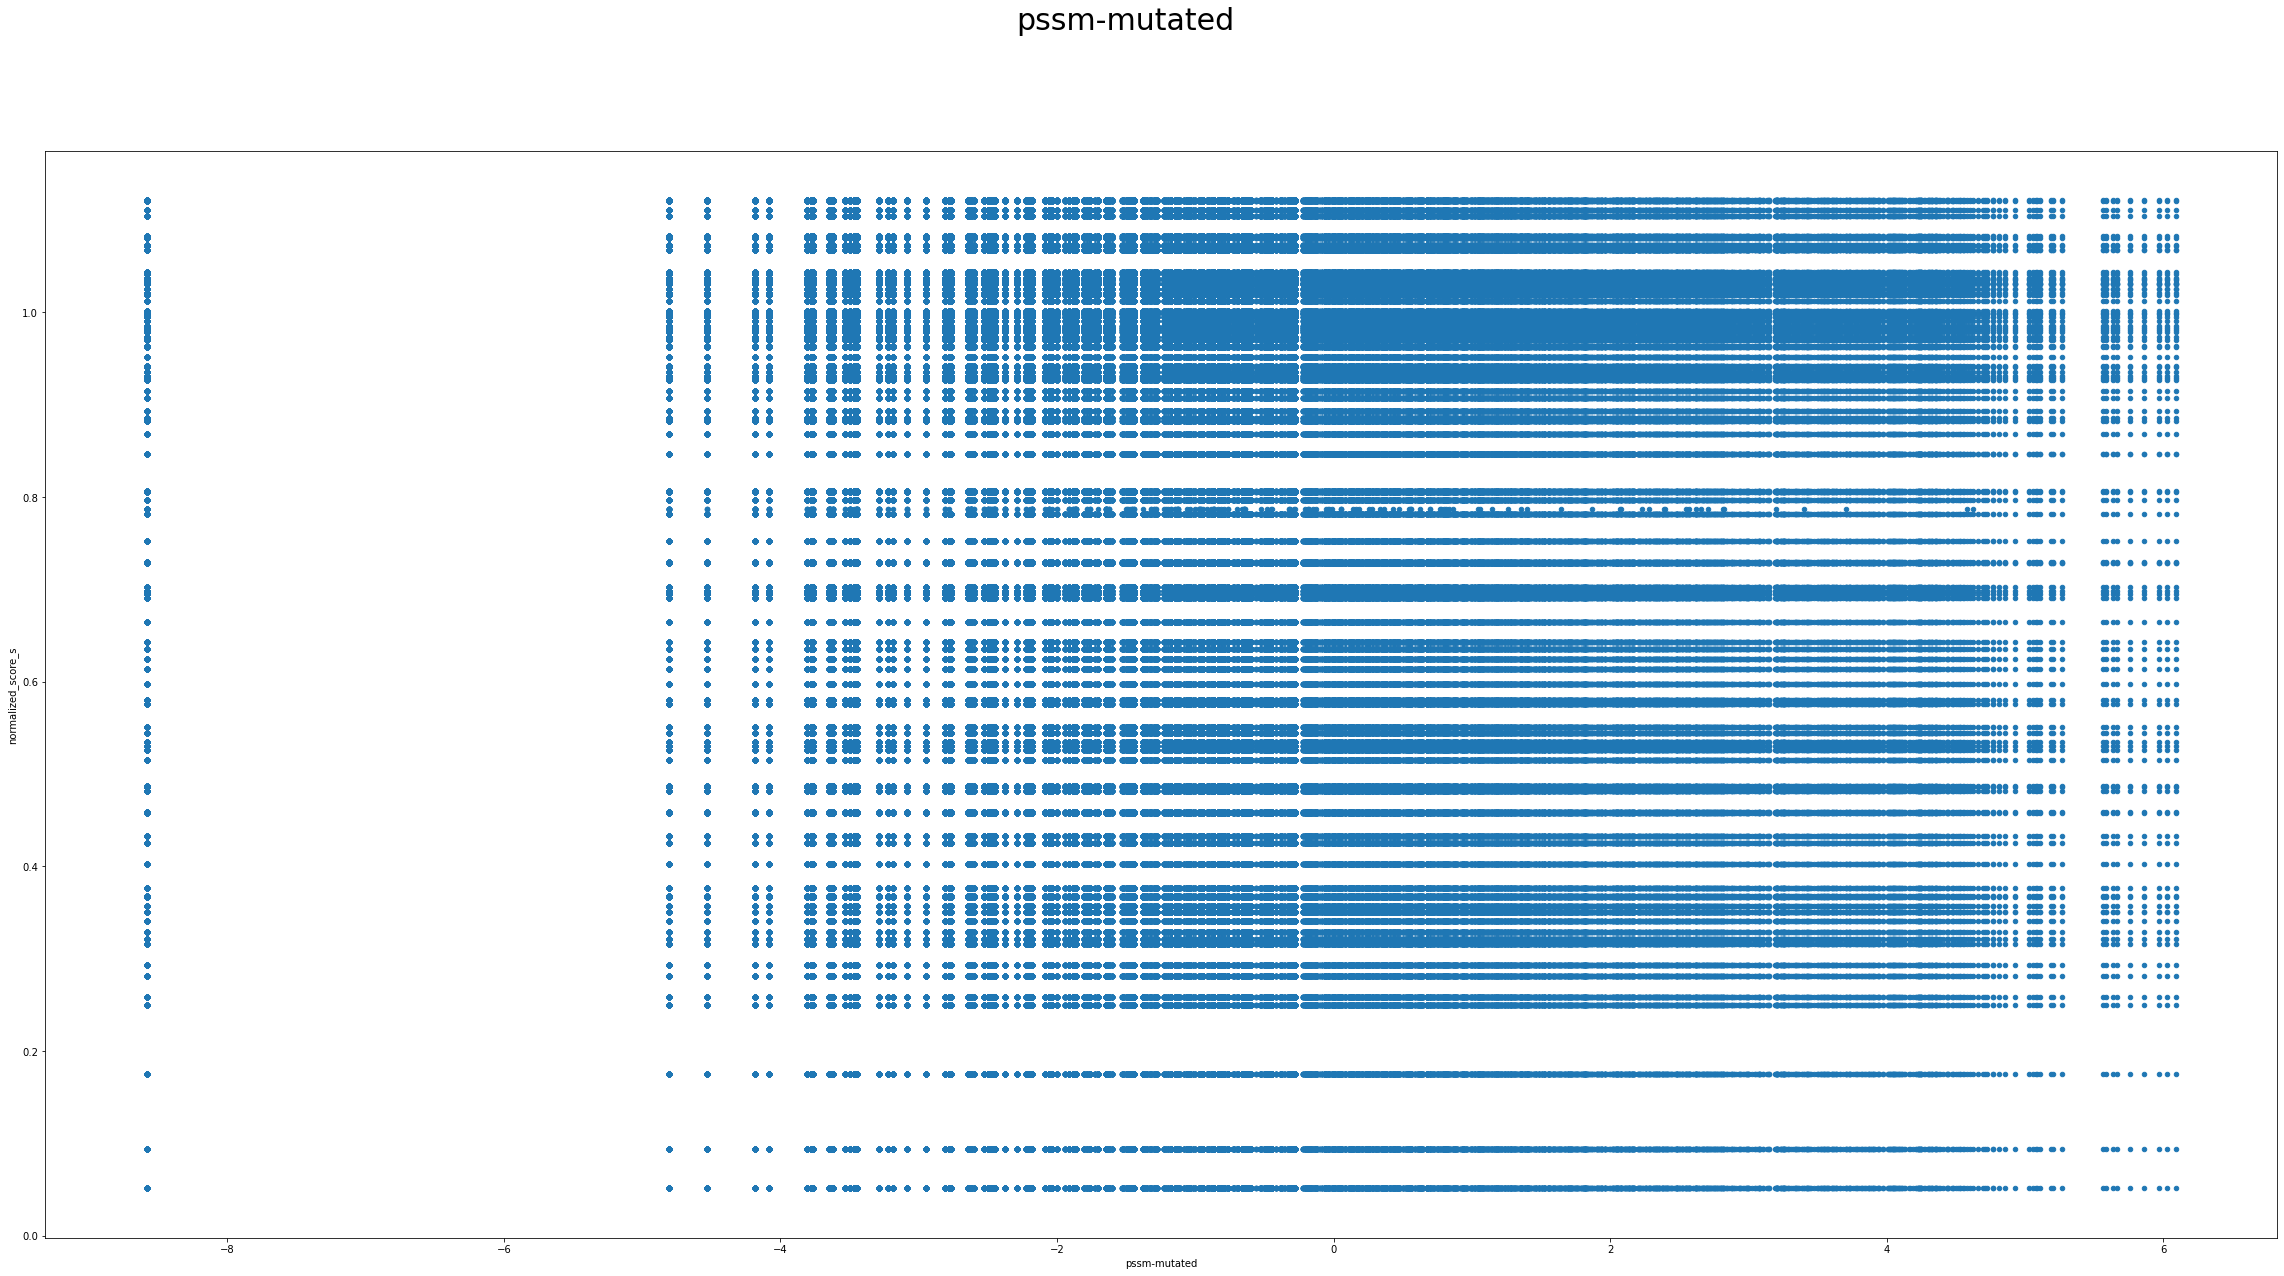

In [193]:
brac1_y2h_merged.plot.scatter(y='normalized_score_s',x='pssm-mutated')
plt.suptitle('pssm-mutated',size=30)

Text(0.5, 0.98, 'entropy')

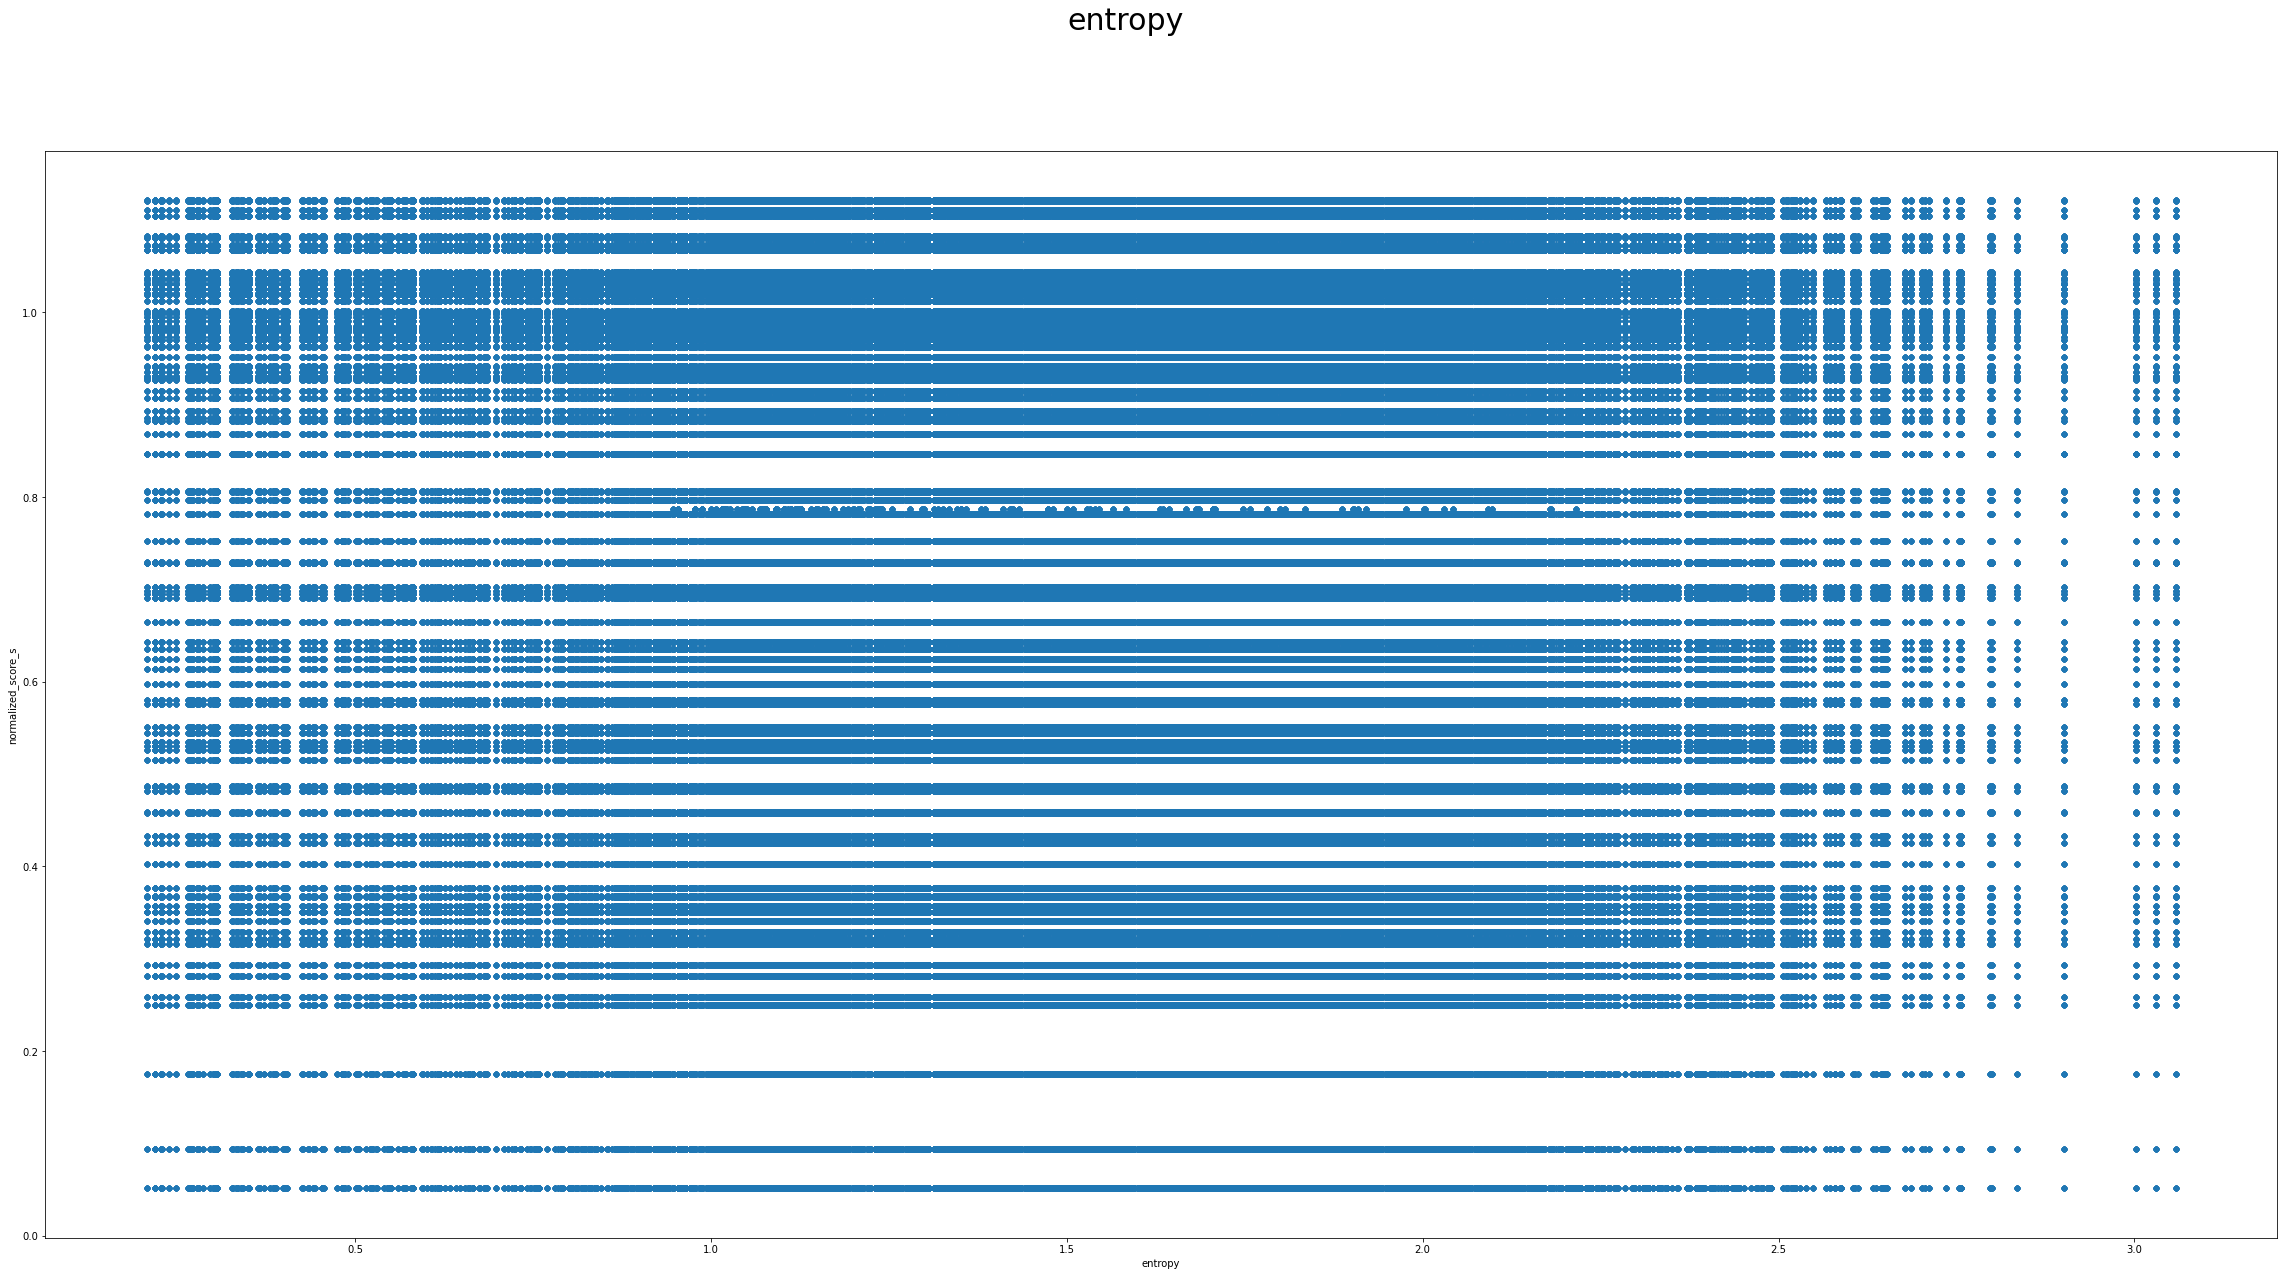

In [194]:
brac1_y2h_merged.plot.scatter(y='normalized_score_s',x='entropy')
plt.suptitle('entropy',size=30)

Text(0.5, 0.98, 'pssm-freqGaps')

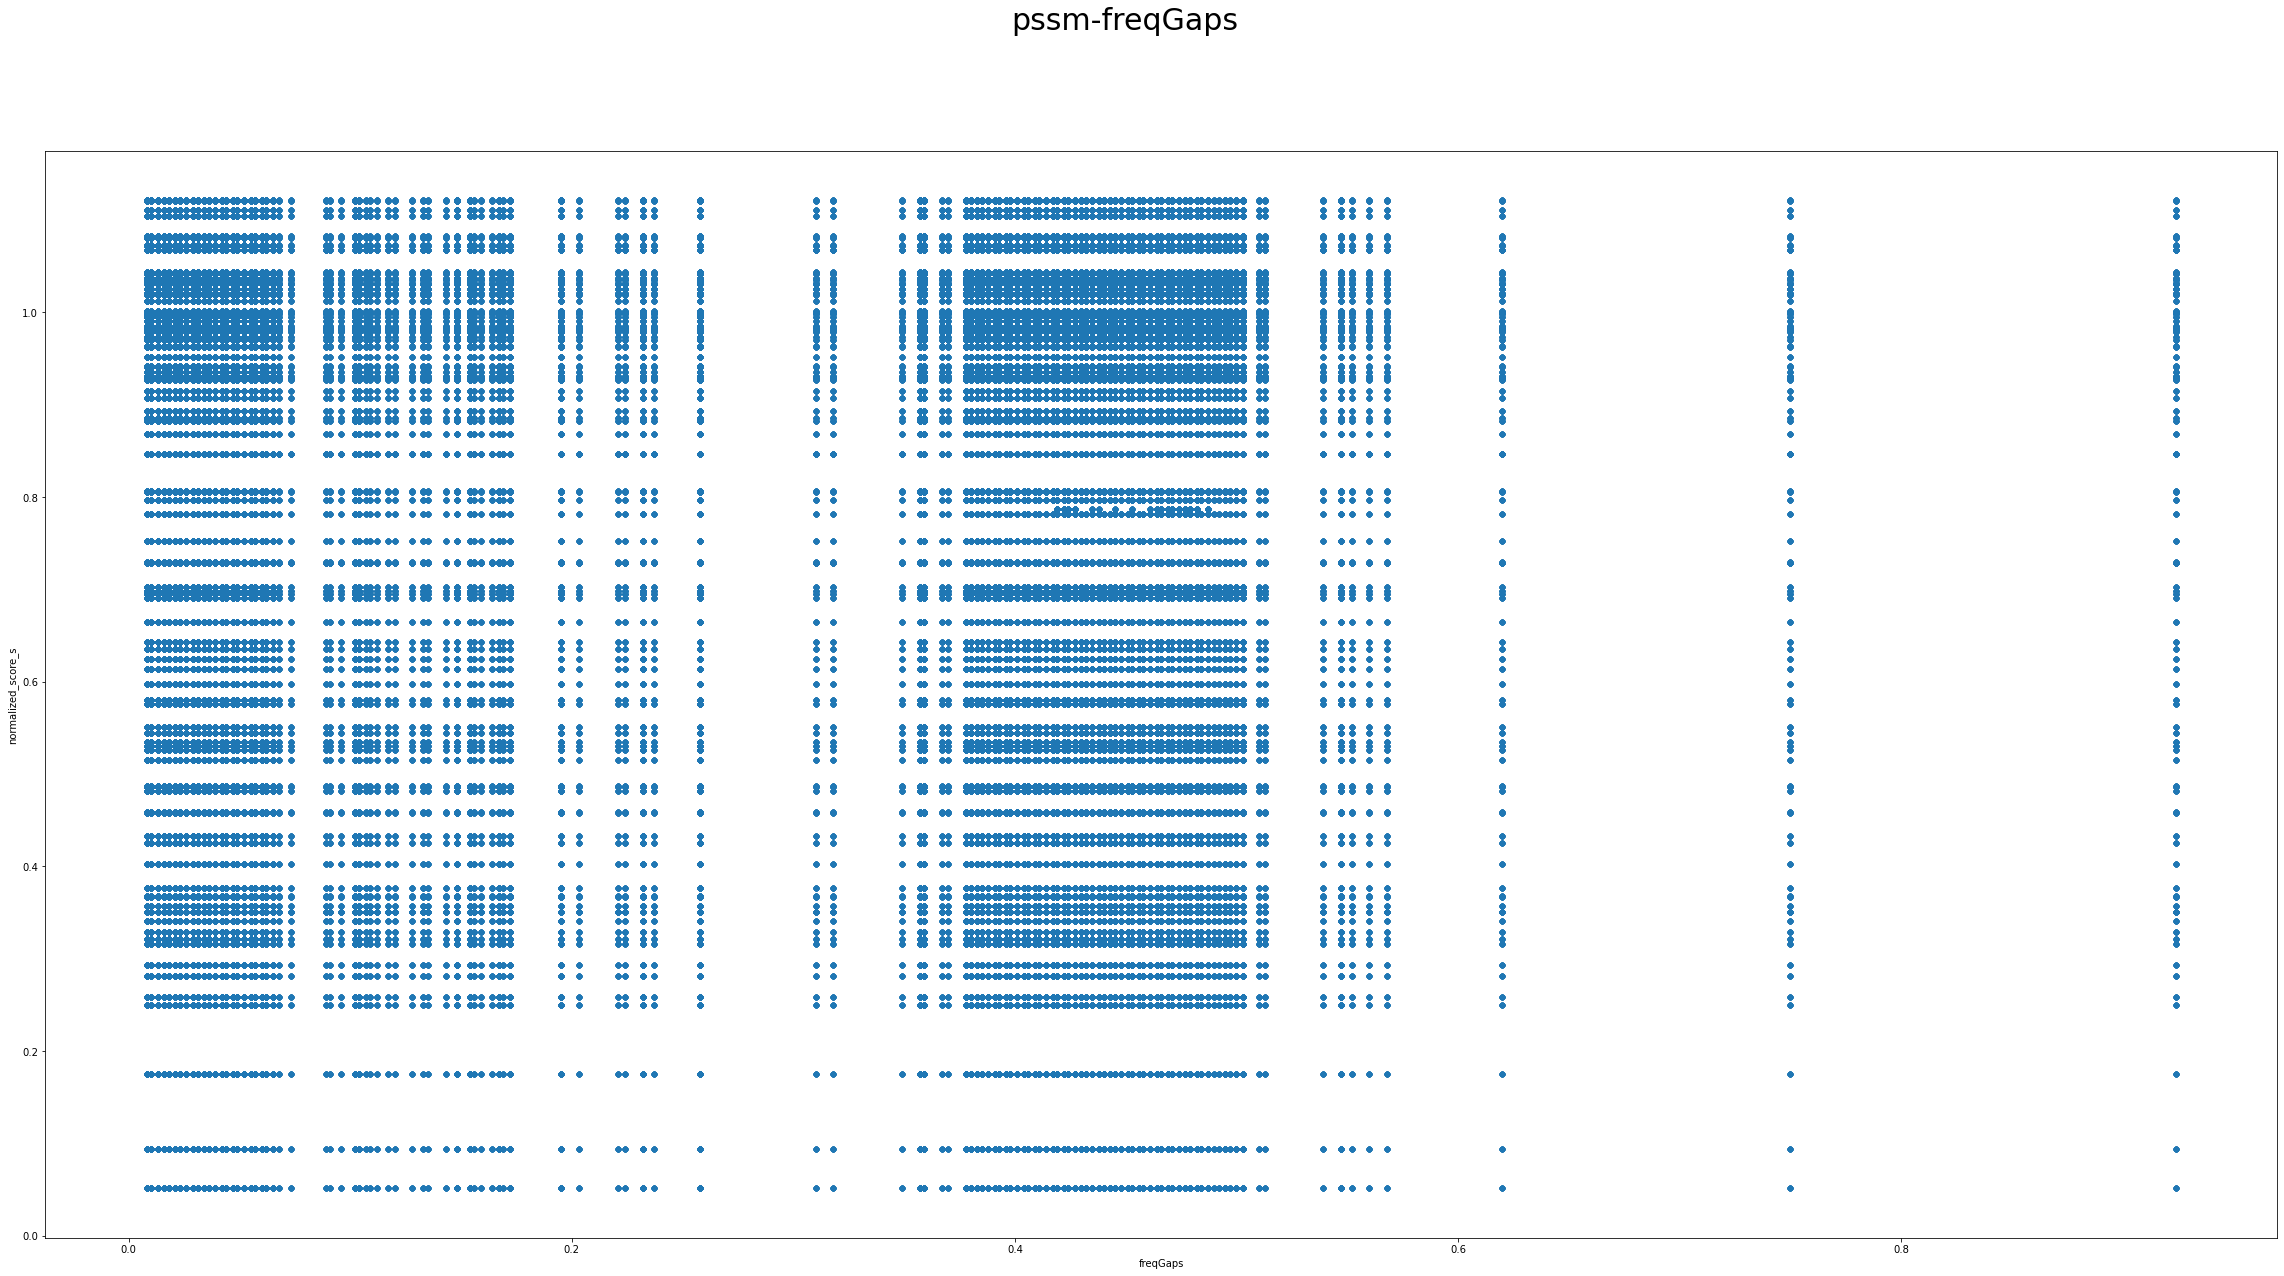

In [195]:
brac1_y2h_merged.plot.scatter(y='normalized_score_s',x='freqGaps')
plt.suptitle('pssm-freqGaps',size=30)

<h1>Regression Line</h1>

Text(0.5, 0.98, 'vdwVolume-RegressionLine')

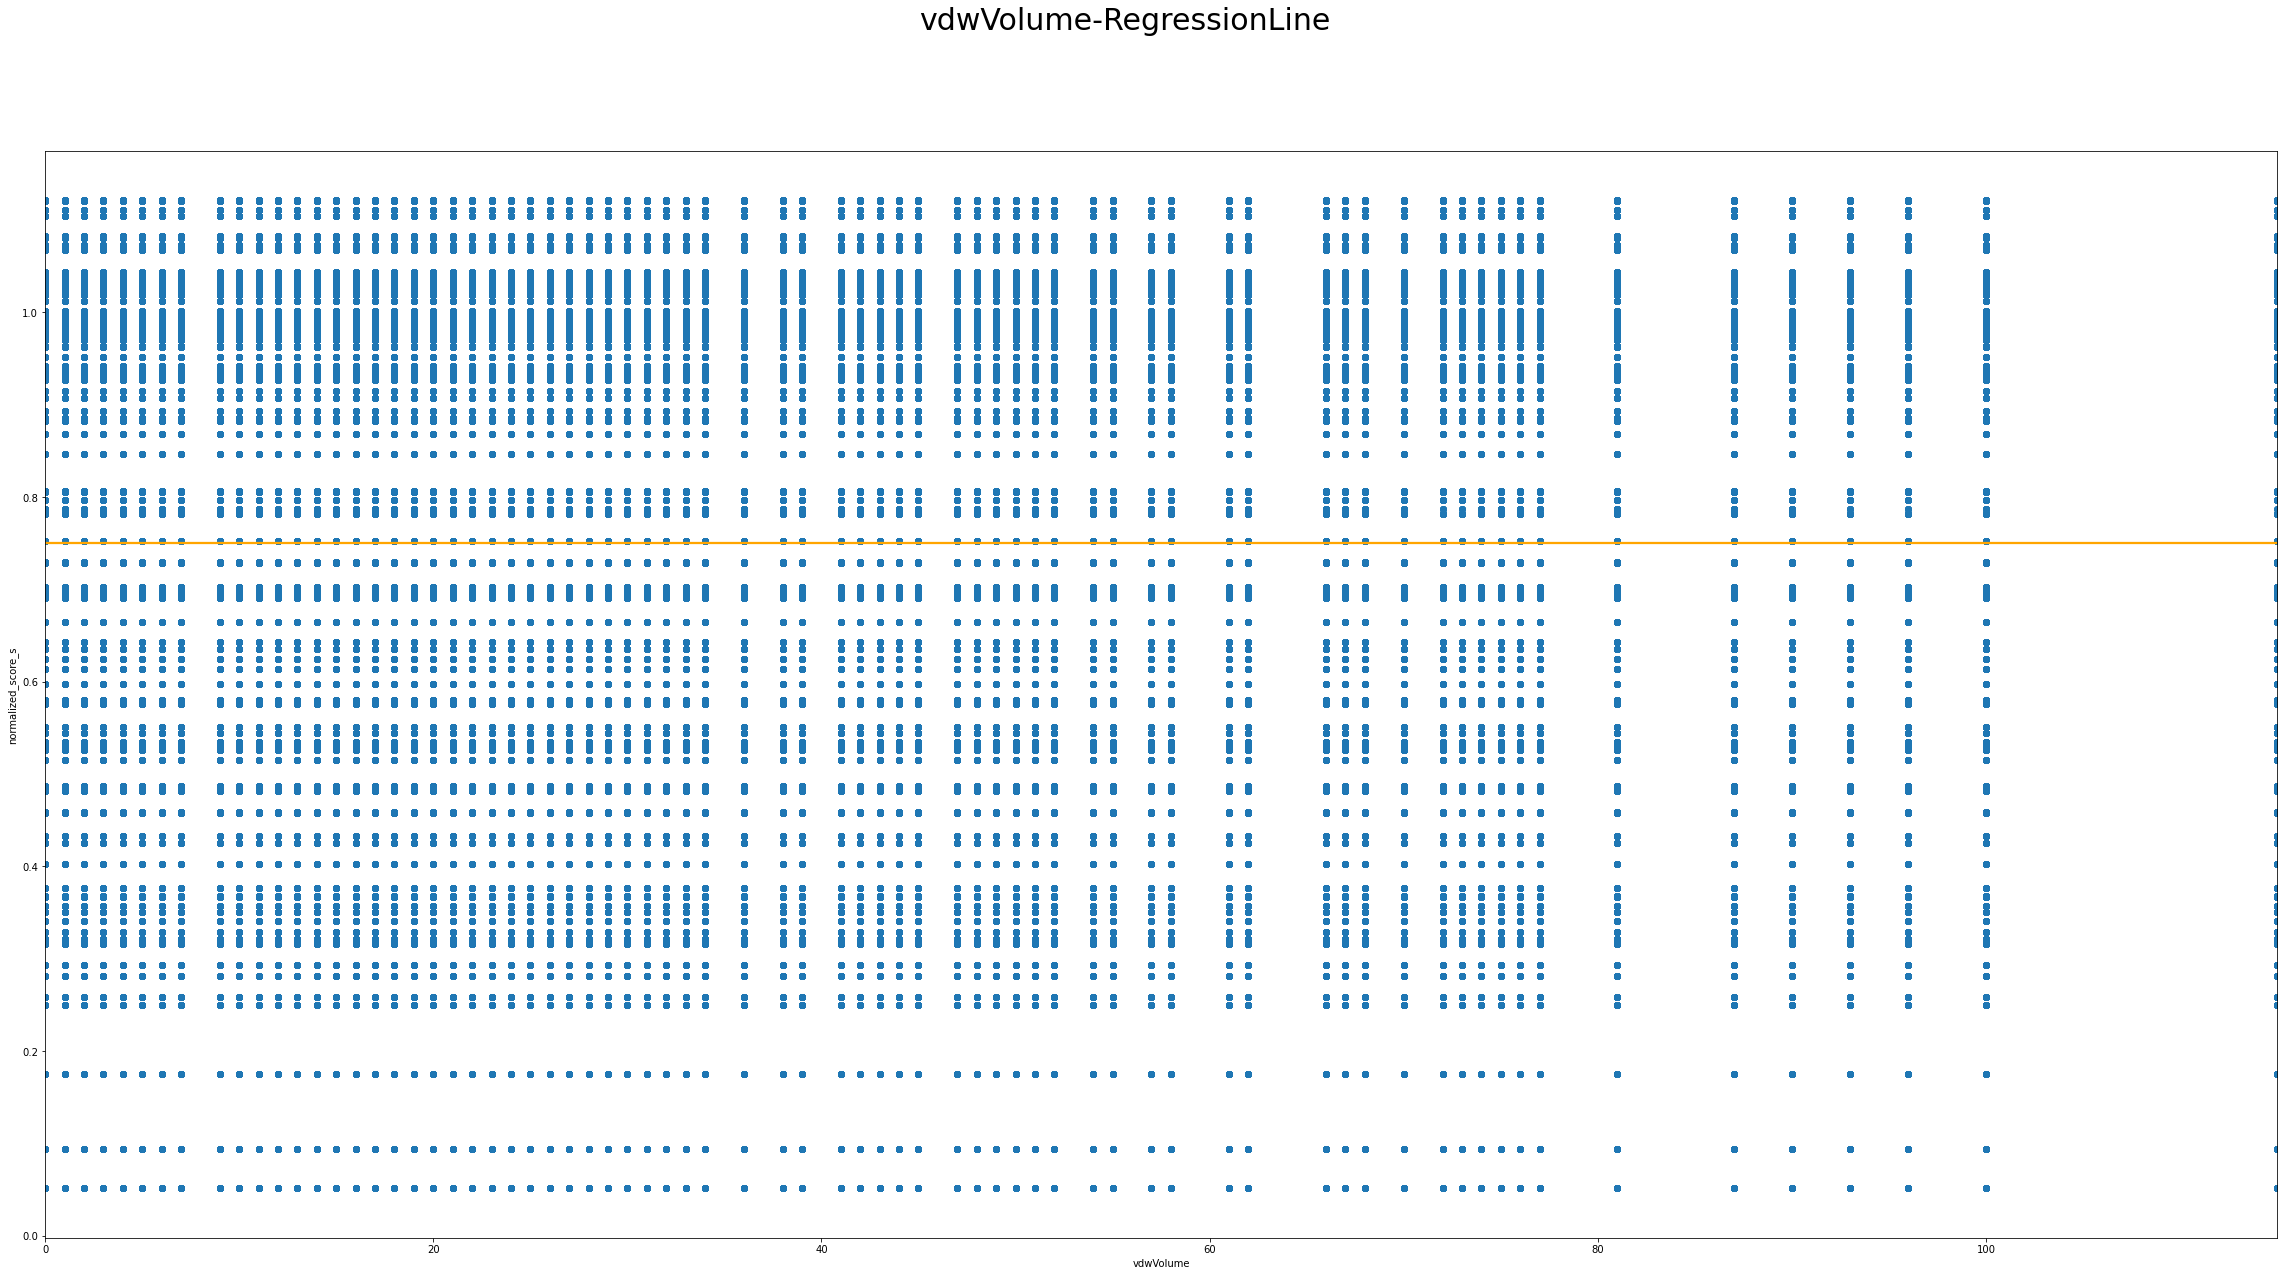

In [208]:
sns.regplot(y = 'normalized_score_s', x = 'vdwVolume', ci = None, data = brac1_y2h_merged,line_kws={"color": "orange"});
plt.suptitle('vdwVolume-RegressionLine',size=30)

Text(0.5, 0.98, 'vdwVolume-hydrophobicity')

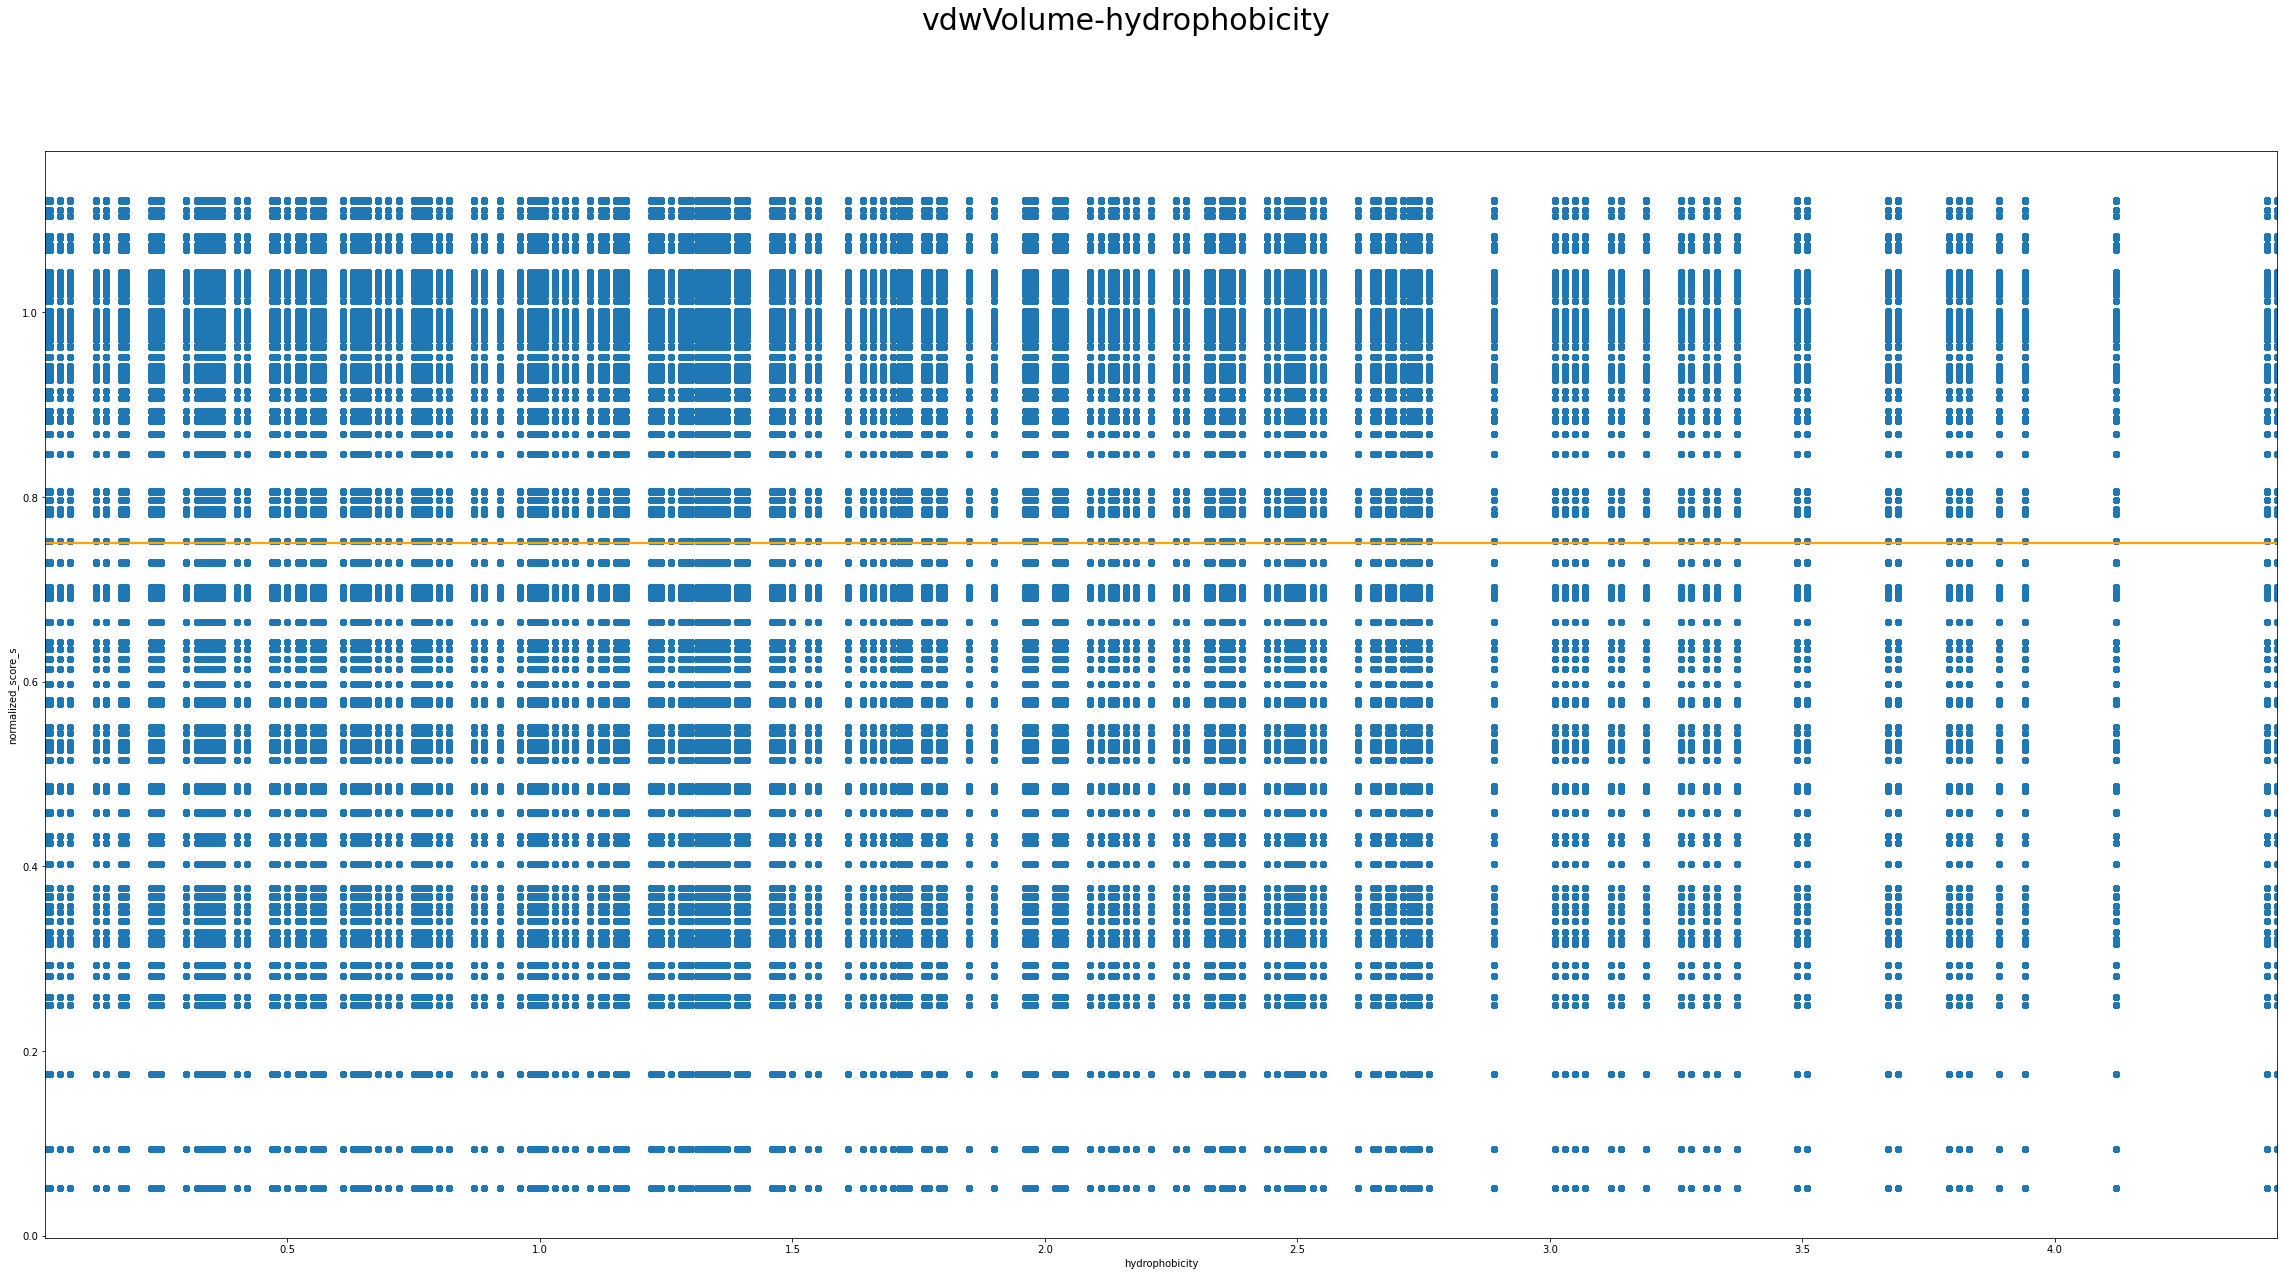

In [210]:
sns.regplot(y = 'normalized_score_s', x = 'hydrophobicity', ci = None, data = brac1_y2h_merged, line_kws={"color": "orange"}) 
plt.suptitle('hydrophobicity-RegressionLine',size=30)

Text(0.5, 0.98, 'vdwVolume-substitutionMatrix')

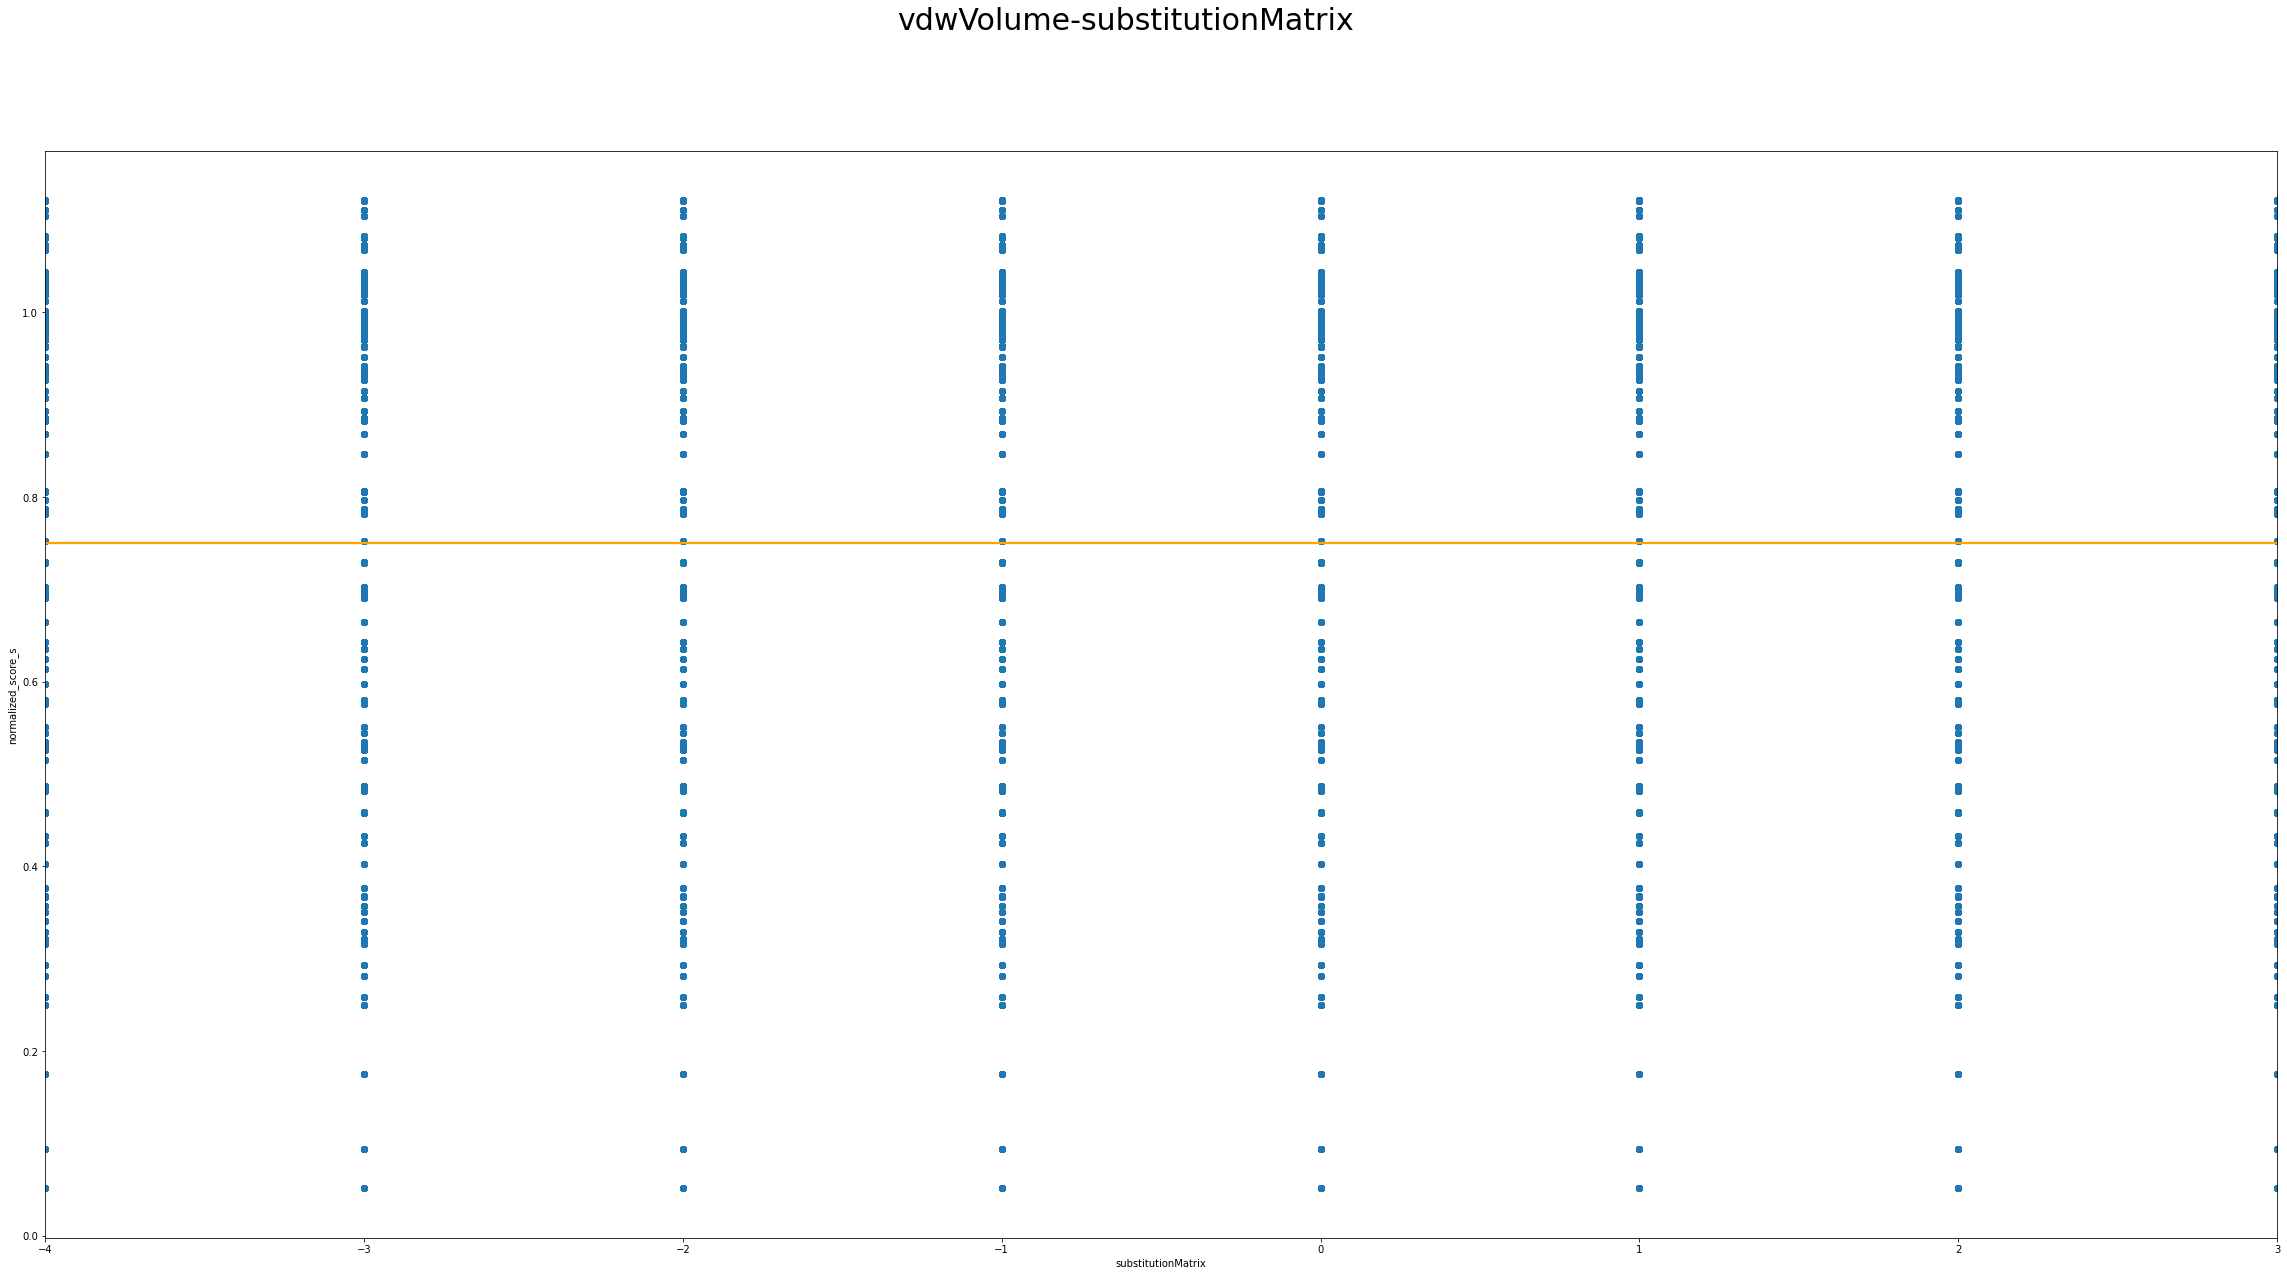

In [220]:
sns.regplot(y = 'normalized_score_s', x = 'substitutionMatrix', ci = None, data = brac1_y2h_merged,line_kws={"color": "orange"}) 
plt.suptitle('substitutionMatrix-RegressionLine',size=30)

Text(0.5, 0.98, 'vdwVolume-pssm-native')

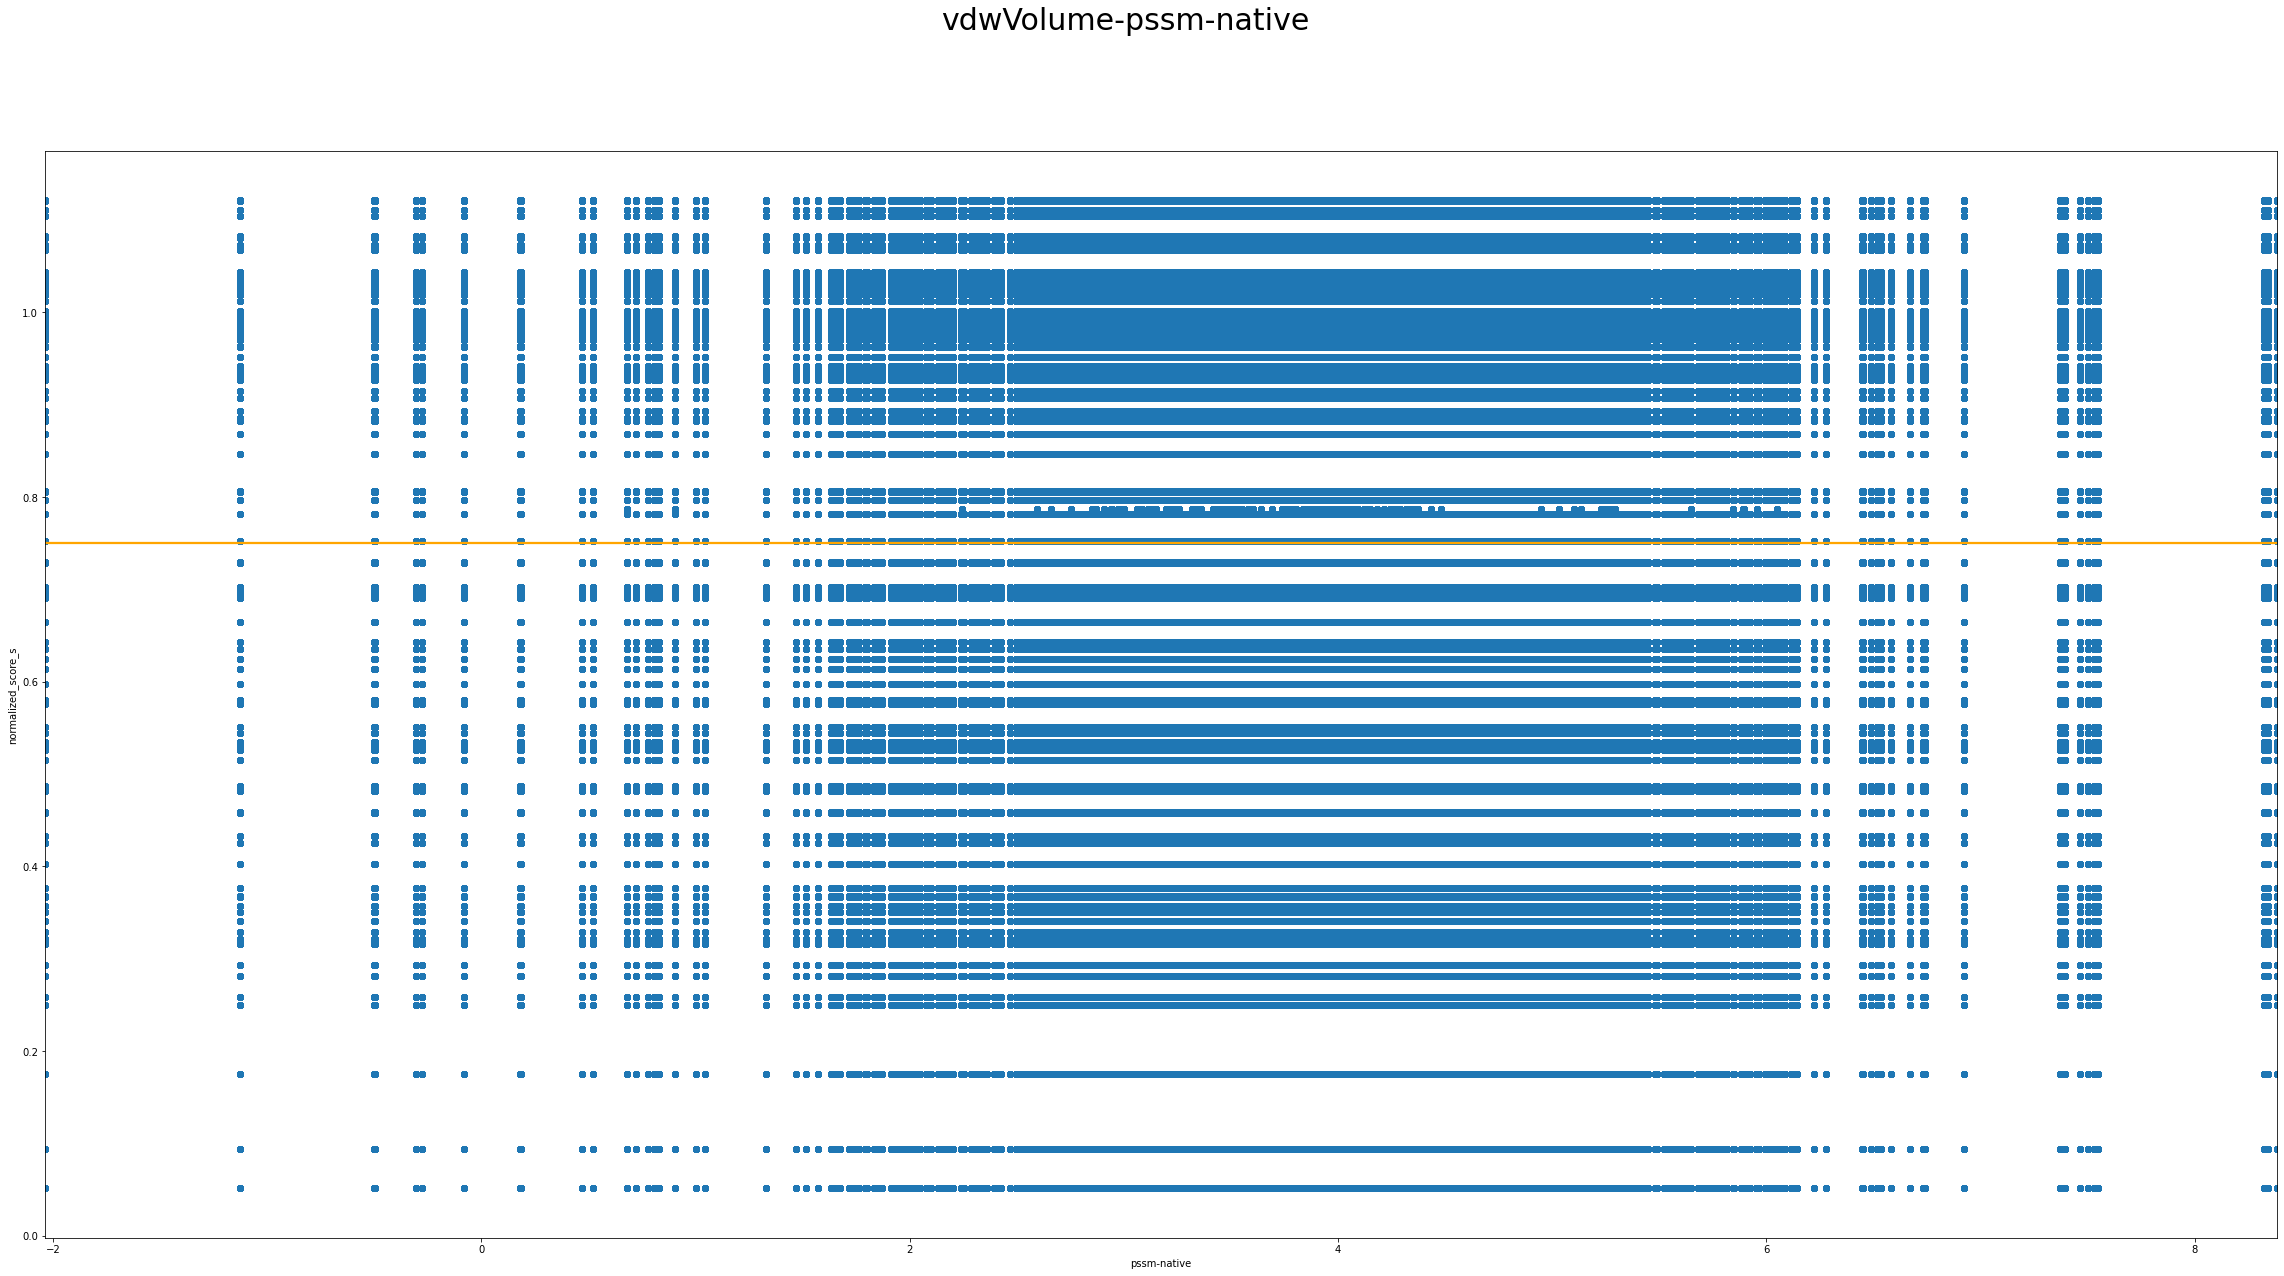

In [214]:
sns.regplot(y = 'normalized_score_s', x = 'pssm-native', ci = None, data = brac1_y2h_merged,line_kws={"color": "orange"})
plt.suptitle('pssm-native-RegressionLine',size=30)

Text(0.5, 0.98, 'vdwVolume-pssm-mutated')

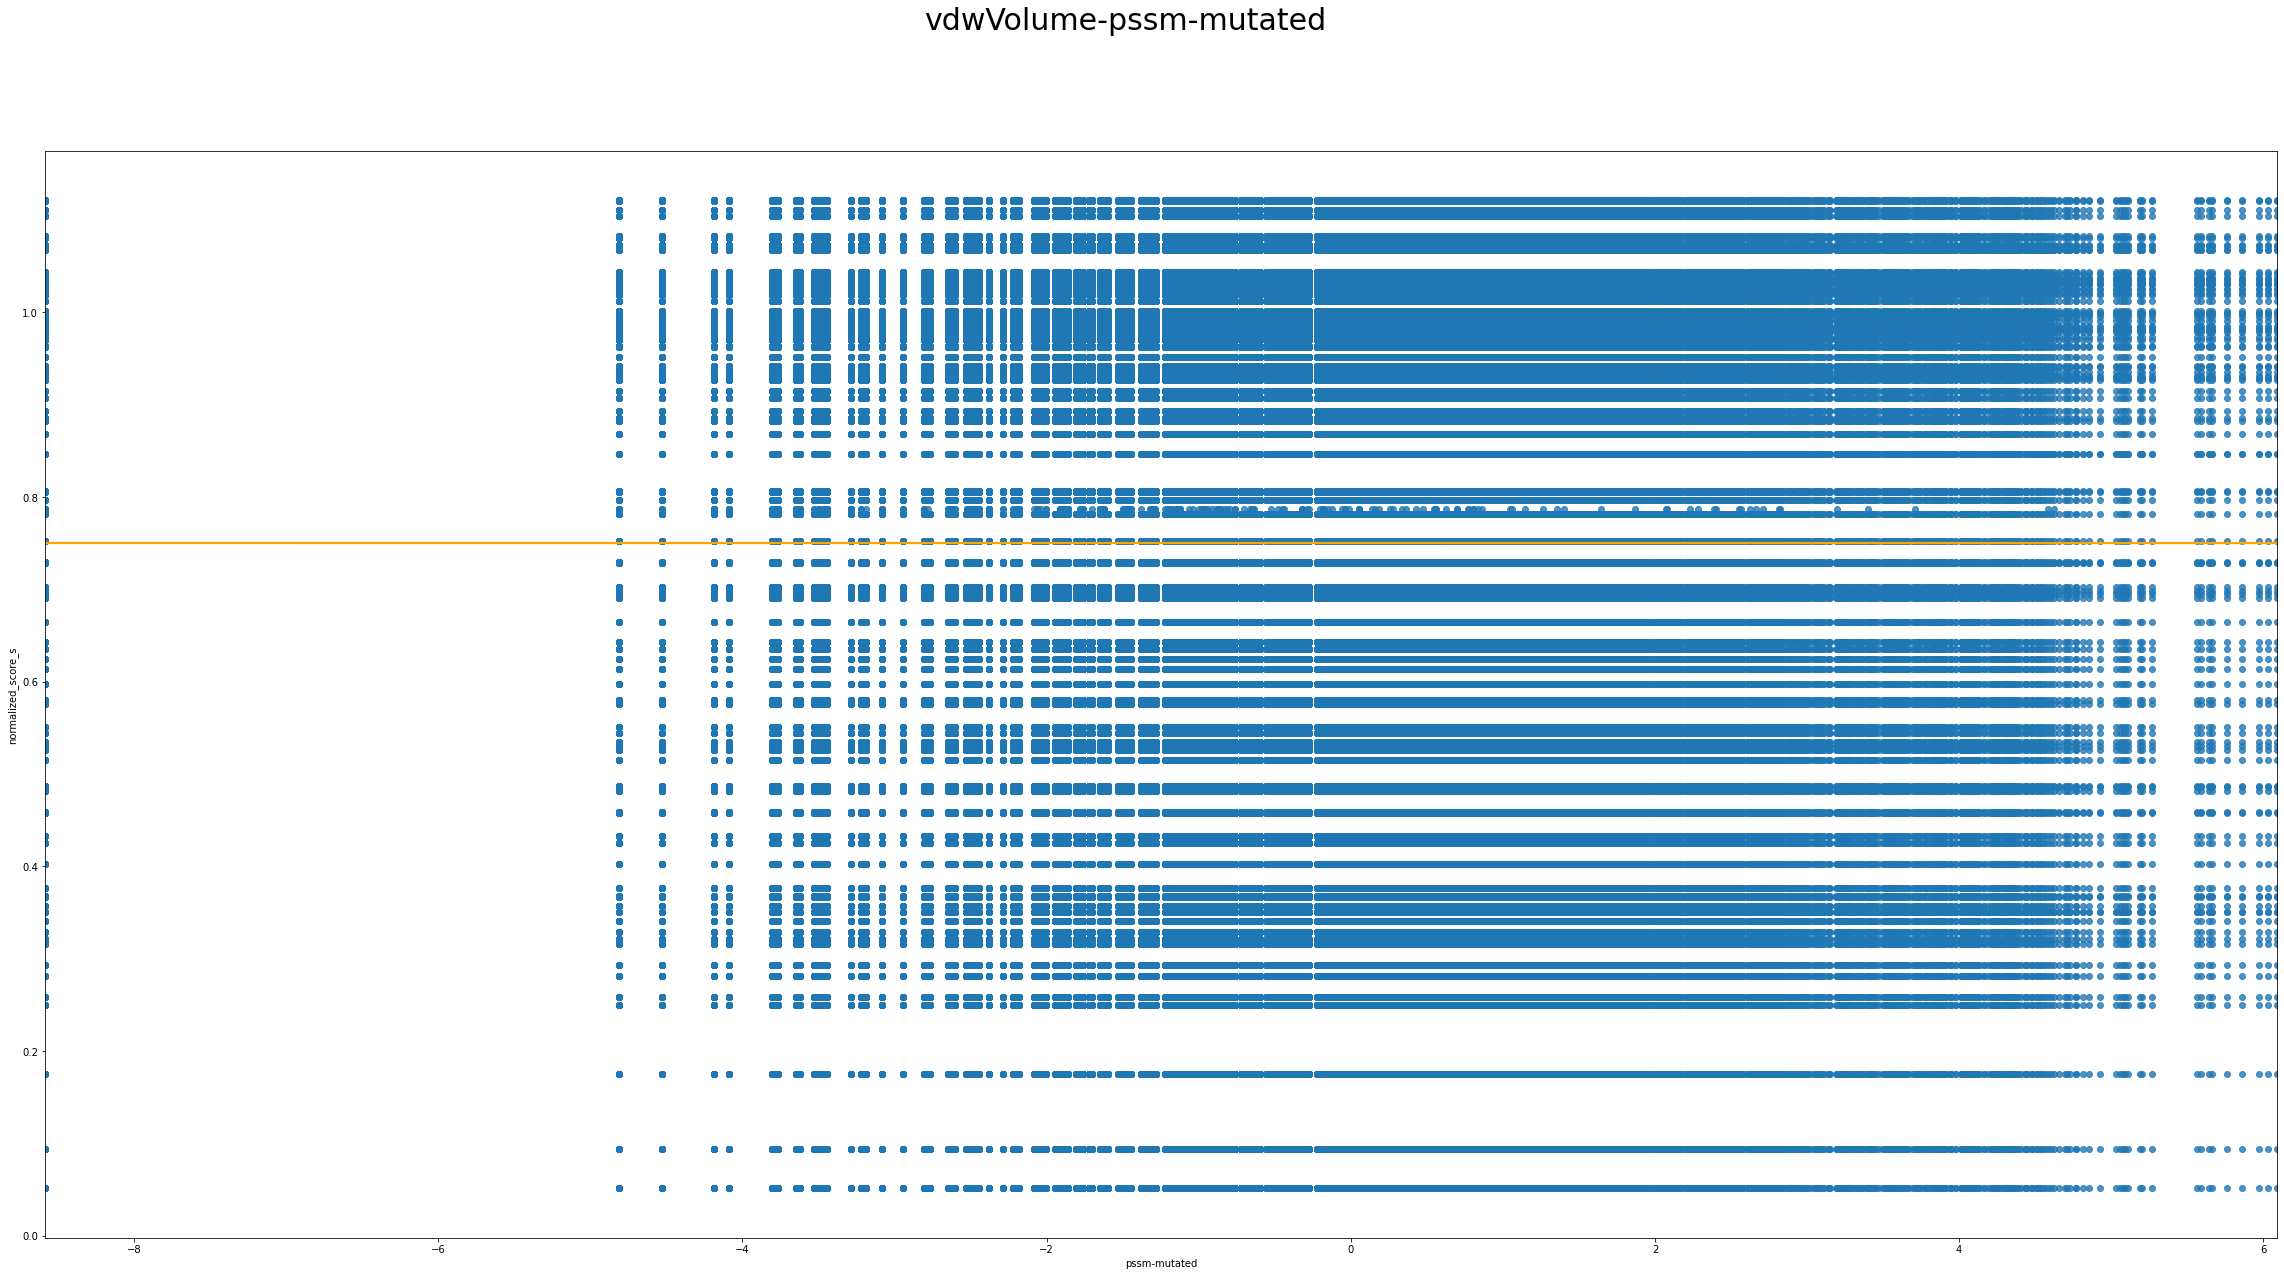

In [216]:
sns.regplot(y = 'normalized_score_s', x = 'pssm-mutated', ci = None, data= brac1_y2h_merged,line_kws={"color": "orange"}) 
plt.suptitle('pssm-mutated-RegressionLine',size=30)

Text(0.5, 0.98, 'pssm-mutated-RegressionLine')

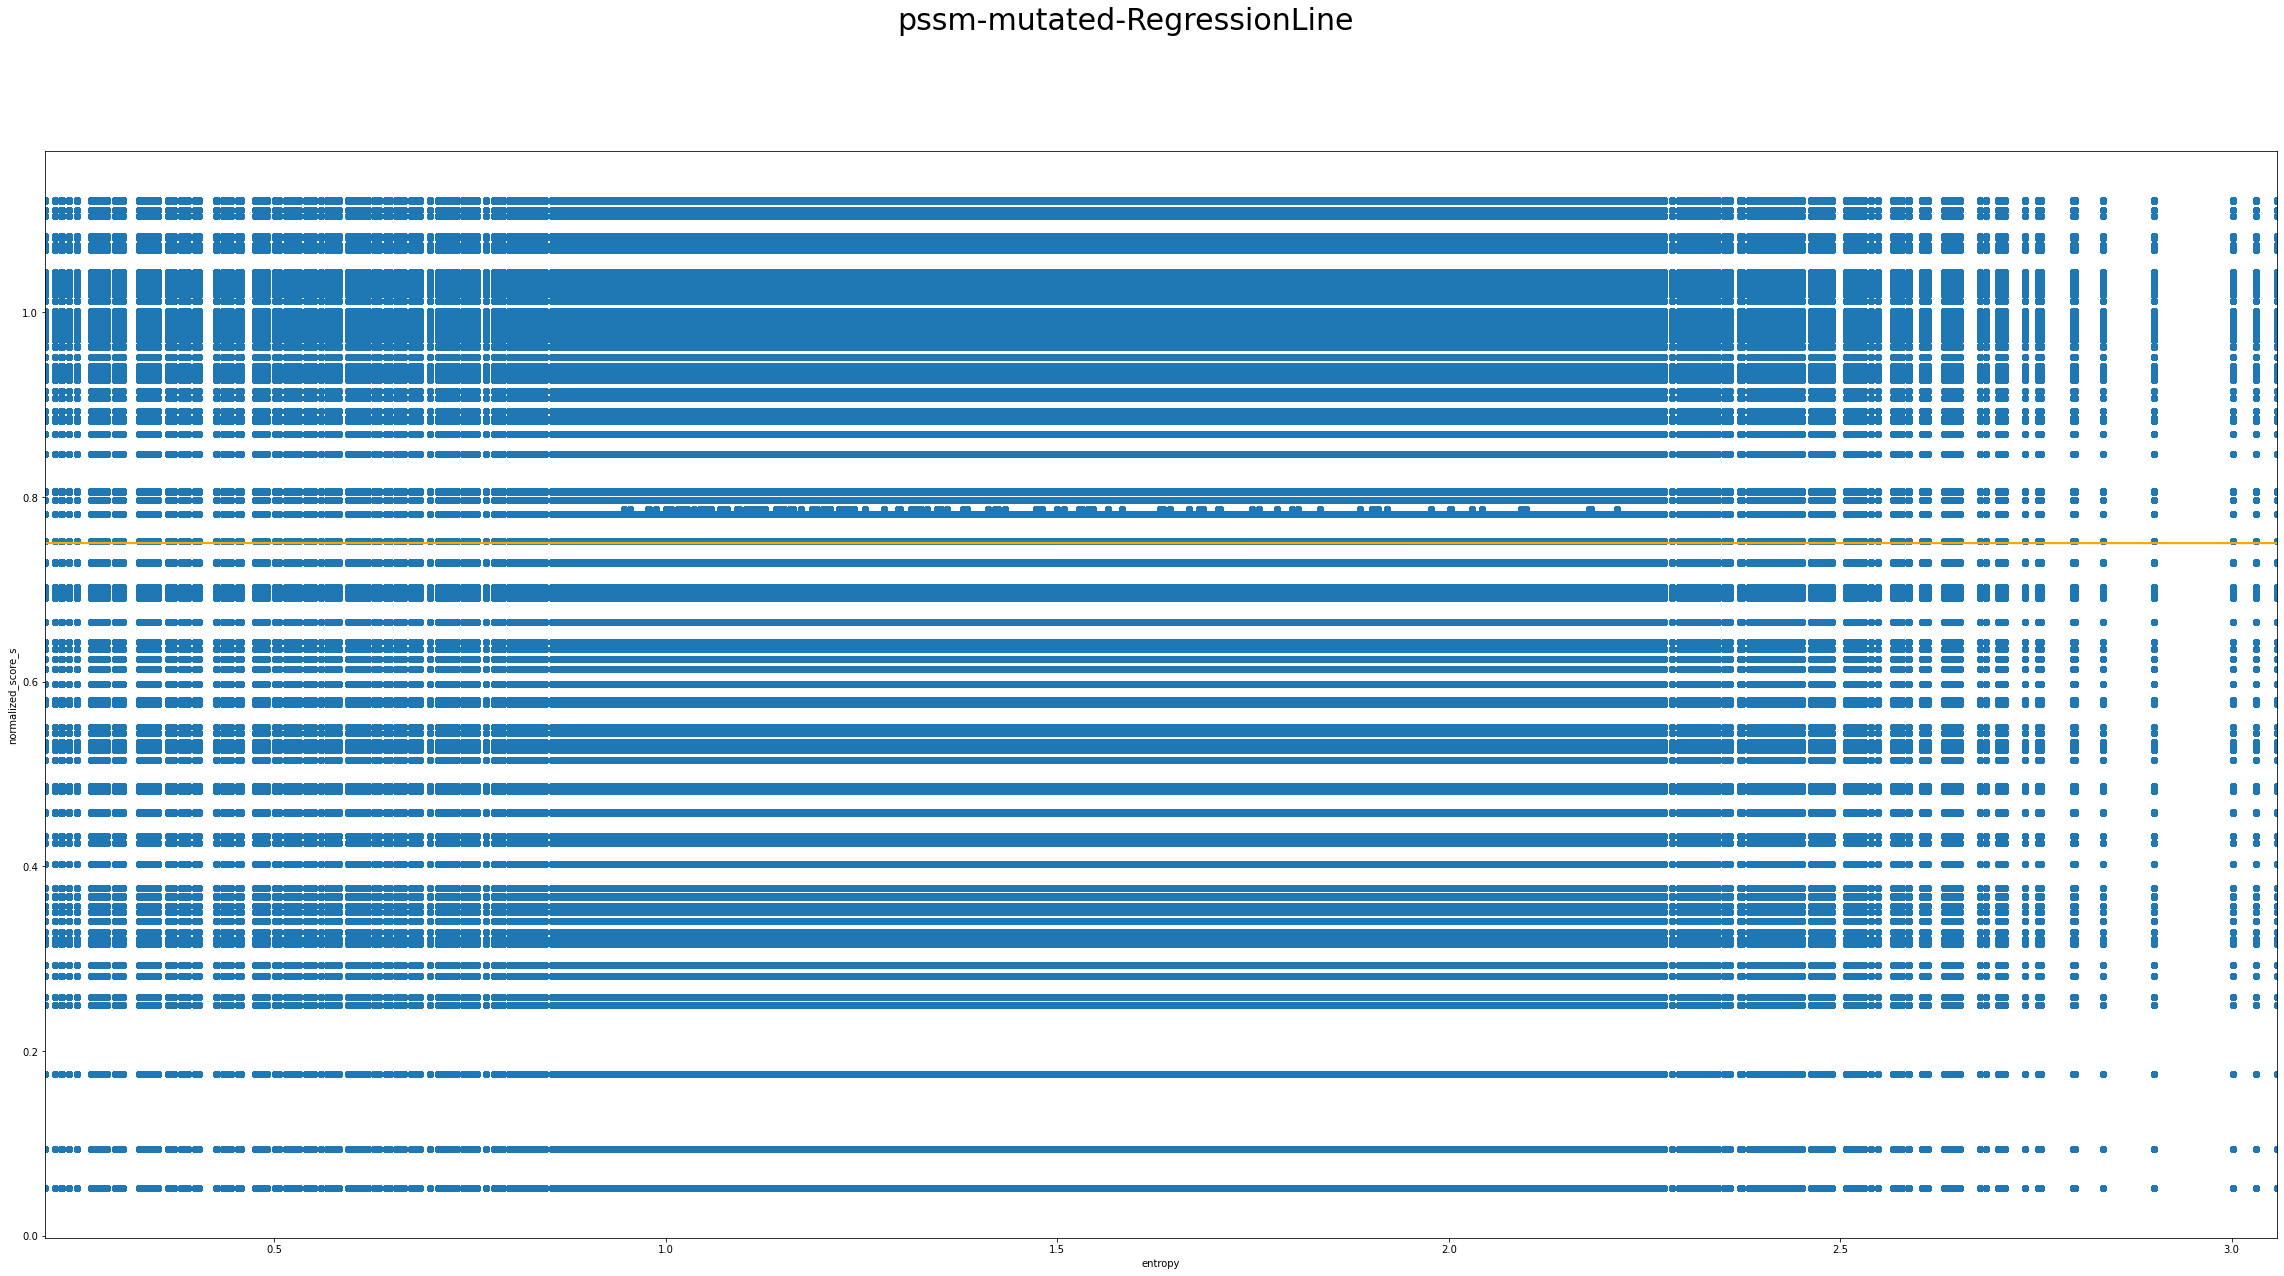

In [221]:
sns.regplot(y = 'normalized_score_s', x = 'entropy', ci = None, data = brac1_y2h_merged,line_kws={"color": "orange"})
plt.suptitle('pssm-mutated-RegressionLine',size=30)

Text(0.5, 0.98, 'vdwVolume-RegressionLine')

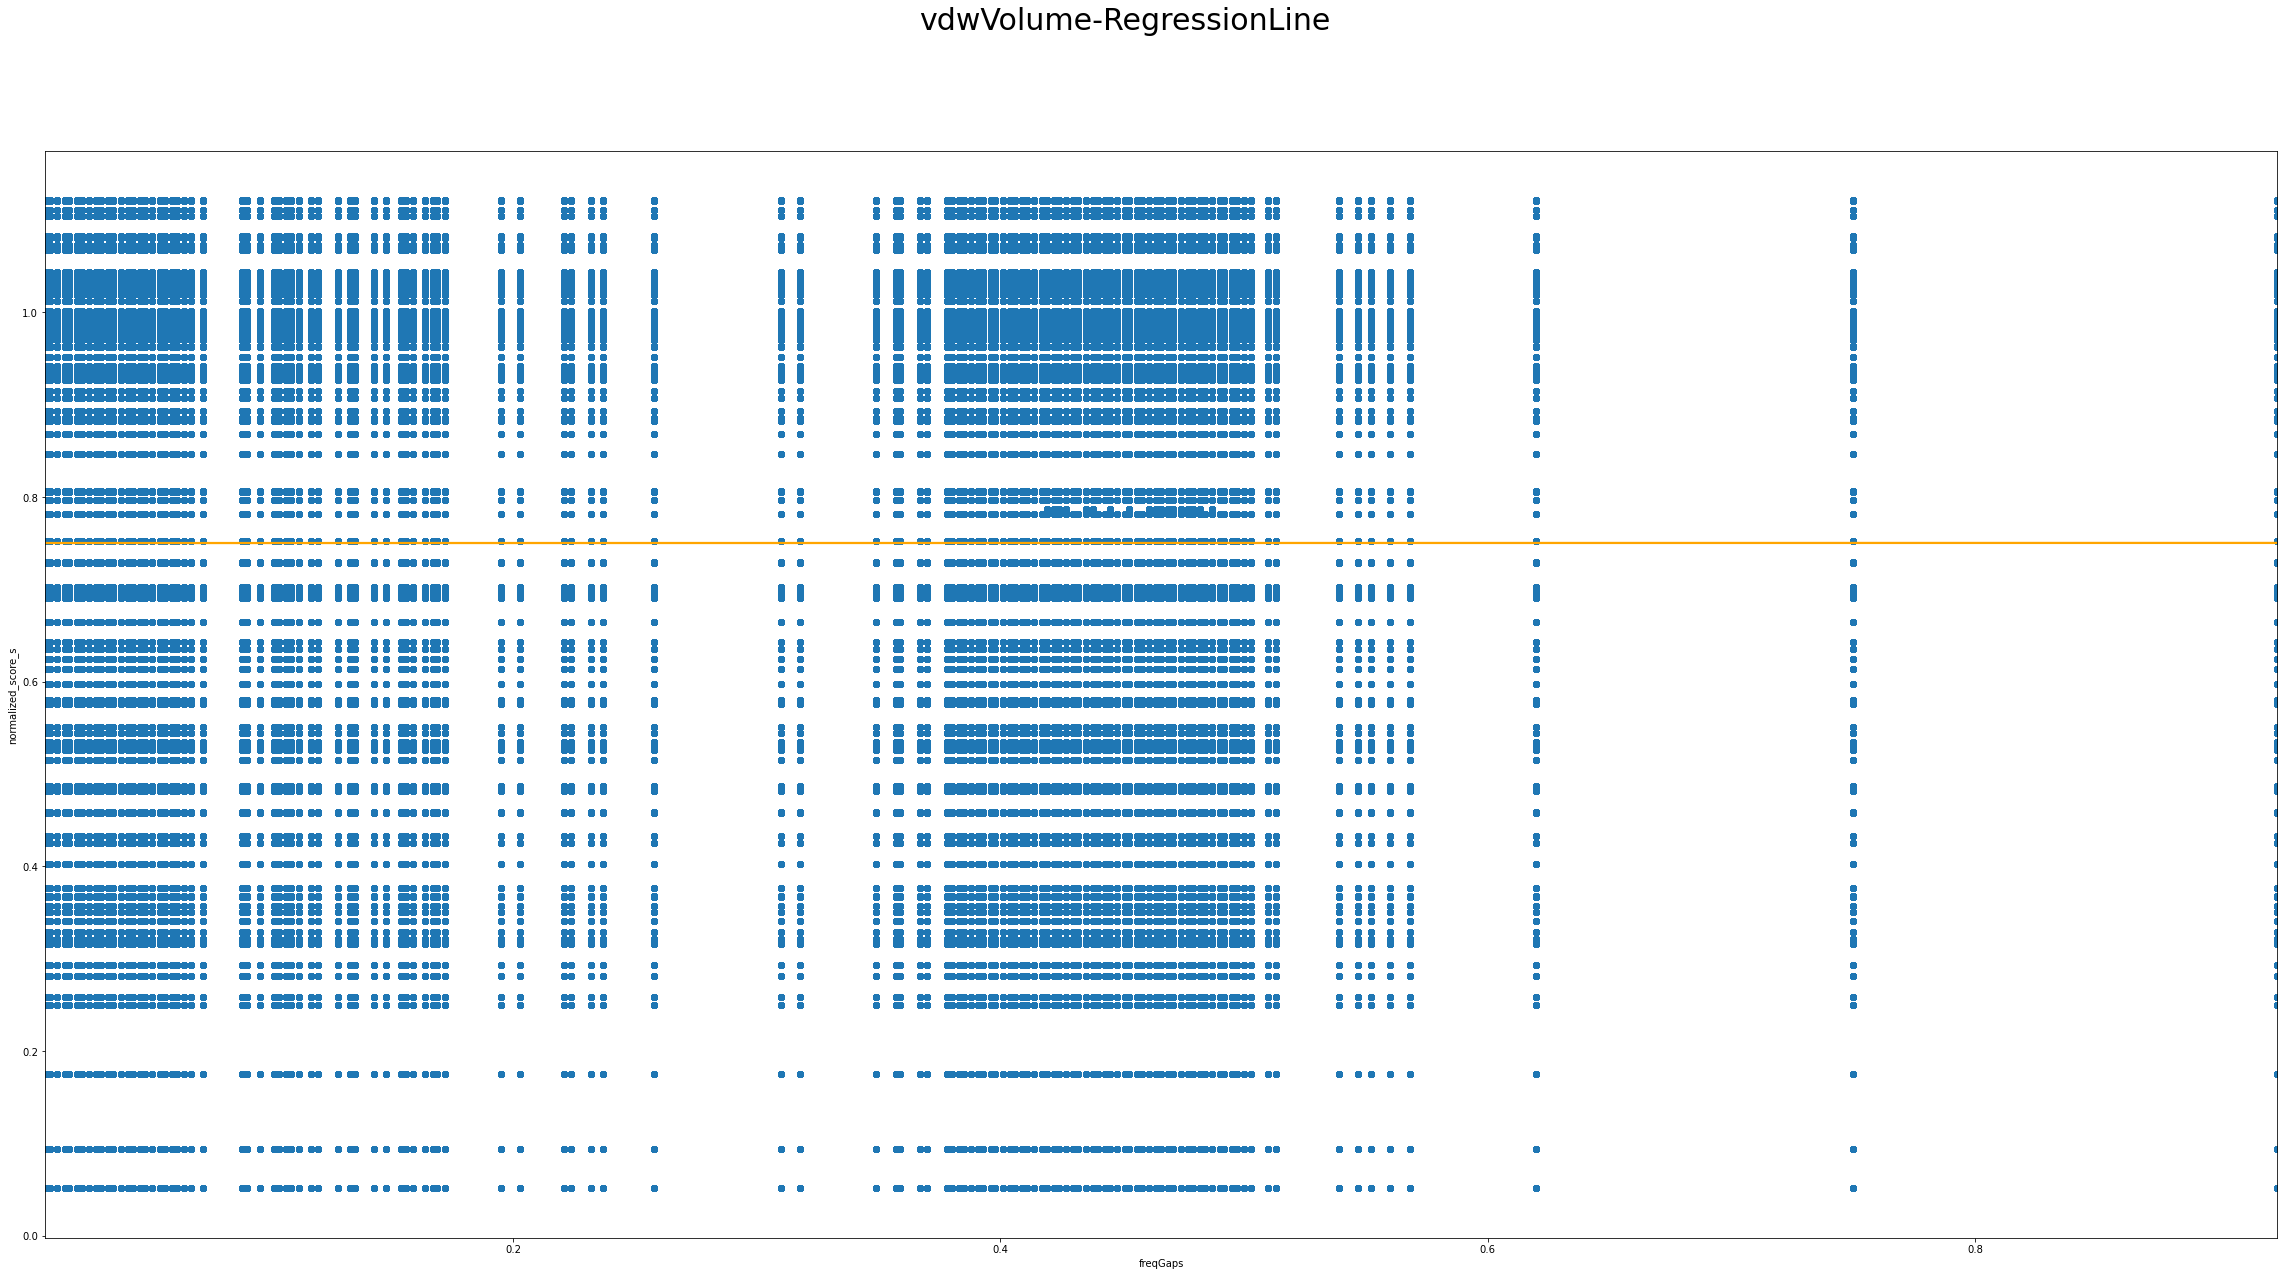

In [219]:
sns.regplot(y = 'normalized_score_s', x = 'freqGaps', ci = None, data = brac1_y2h_merged,line_kws={"color": "orange"})
plt.suptitle('pssm-mutated-RegressionLine',size=30)

<h1>## MAKE A SUBPLOTS OF THEM</h1

/home/jjimenez/anaconda3/envs/bio/lib/python3.9/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


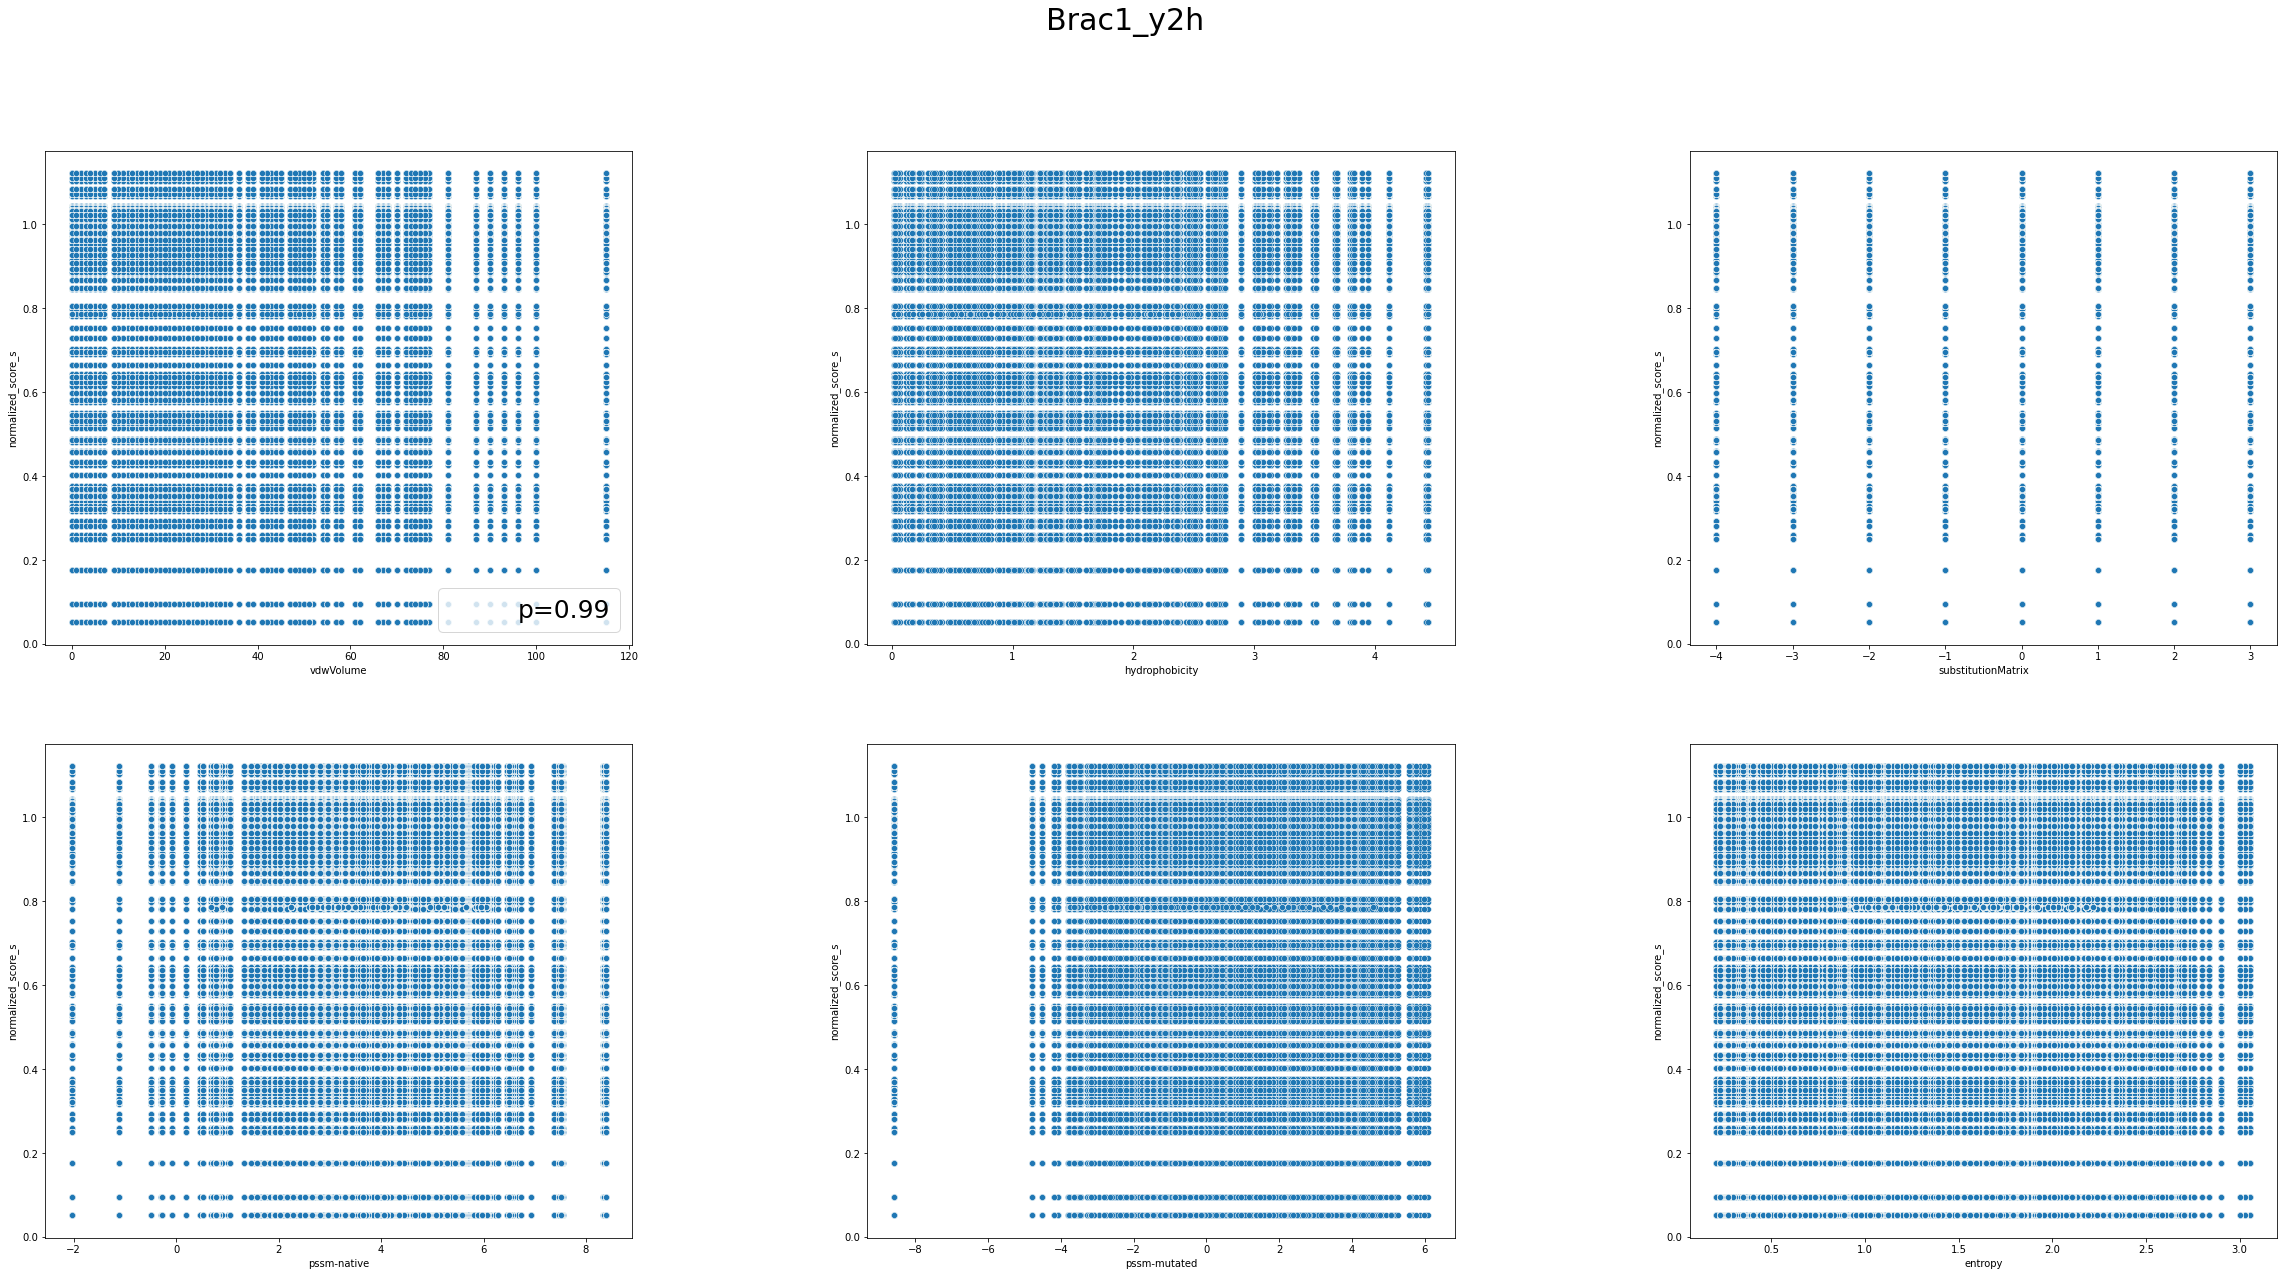

In [22]:
plt.subplots_adjust(wspace=0.4)
plt.suptitle("Brac1_y2h", size=30)

plot1 = plt.subplot(2,3,1)
plot1 = sns.scatterplot(x ='vdwVolume',y = 'normalized_score_s', data=brac1_y2h_merged)
r, p = stats.pearsonr(brac1_y2h_merged["normalized_score_s"],brac1_y2h_merged["vdwVolume"] )
phantom, = plot1.plot([], [], linestyle="", alpha=0)
plot1.legend([phantom],['p={:.2f}'.format(p)], fontsize=25)

plot2 = plt.subplot(2,3,2)
plot2 = sns.scatterplot(x ='hydrophobicity', y ='normalized_score_s', data=brac1_y2h_merged)

plot3 = plt.subplot(2,3,3)
plot3 = sns.scatterplot(x ='substitutionMatrix', y ='normalized_score_s', data=brac1_y2h_merged)

plot4 = plt.subplot(2,3,4)
plot4 = sns.scatterplot(x ='pssm-native', y ='normalized_score_s', data=brac1_y2h_merged)

plot5 = plt.subplot(2,3,5)
plot5 = sns.scatterplot(x ='pssm-mutated', y ='normalized_score_s', data=brac1_y2h_merged)

plot6 = plt.subplot(2,3,6)
plot6 = sns.scatterplot(x ='entropy', y ='normalized_score_s', data=brac1_y2h_merged)

In [ ]:
plt.rcParams['figure.figsize'] = (40,20)
plt.subplots_adjust(wspace=0.4)
plt.suptitle("Brac1_y2h-Regression Line", size=30)

rg1 = plt.subplot(2,4,1)
rg1 = sns.regplot(y = 'normalized_score_s', x = 'vdwVolume', ci = None, data = brac1_y2h_merged,line_kws={"color": "orange"});

rg2 = plt.subplot(2,3,2)
rg2 = sns.regplot(y = 'normalized_score_s', x = 'hydrophobicity', ci = None, data = brac1_y2h_merged,line_kws={"color": "orange"});

rg3 = plt.subplot(2,3,3)
rg3 = sns.regplot(y = 'normalized_score_s', x = 'substitutionMatrix', ci = None, data = brac1_y2h_merged,line_kws={"color": "orange"});

rg4 = plt.subplot(2,3,4)
rg4 = sns.regplot(y = 'normalized_score_s', x = 'pssm-native', ci = None, data = brac1_y2h_merged,line_kws={"color": "orange"});

rg5 = plt.subplot(2,3,5)
rg5 =sns.regplot(y = 'normalized_score_s', x = 'pssm-mutated', ci = None, data = brac1_y2h_merged,line_kws={"color": "orange"});

rg6 = plt.subplot(2,3,6)
rg6 = sns.regplot(y = 'normalized_score_s', x = 'entropy', ci = None, data = brac1_y2h_merged,line_kws={"color": "orange"});

<h1>E1_ubiquitin</h1>

Text(0.5, 0.98, 'vdwVolume')

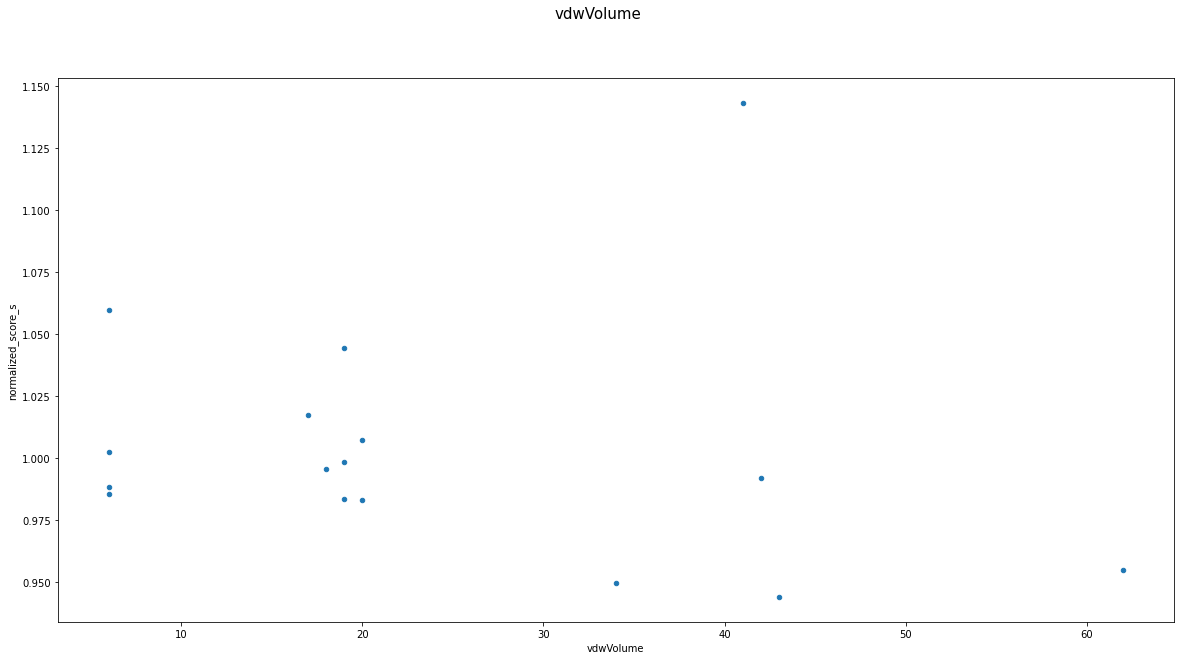

In [105]:
e1_ubiquitin_merged.plot.scatter(y='normalized_score_s',x='vdwVolume')
plt.rcParams['figure.figsize'] = (20,10)
plt.suptitle('vdwVolume',size=15)

Text(0.5, 0.98, 'hydrophobicity')

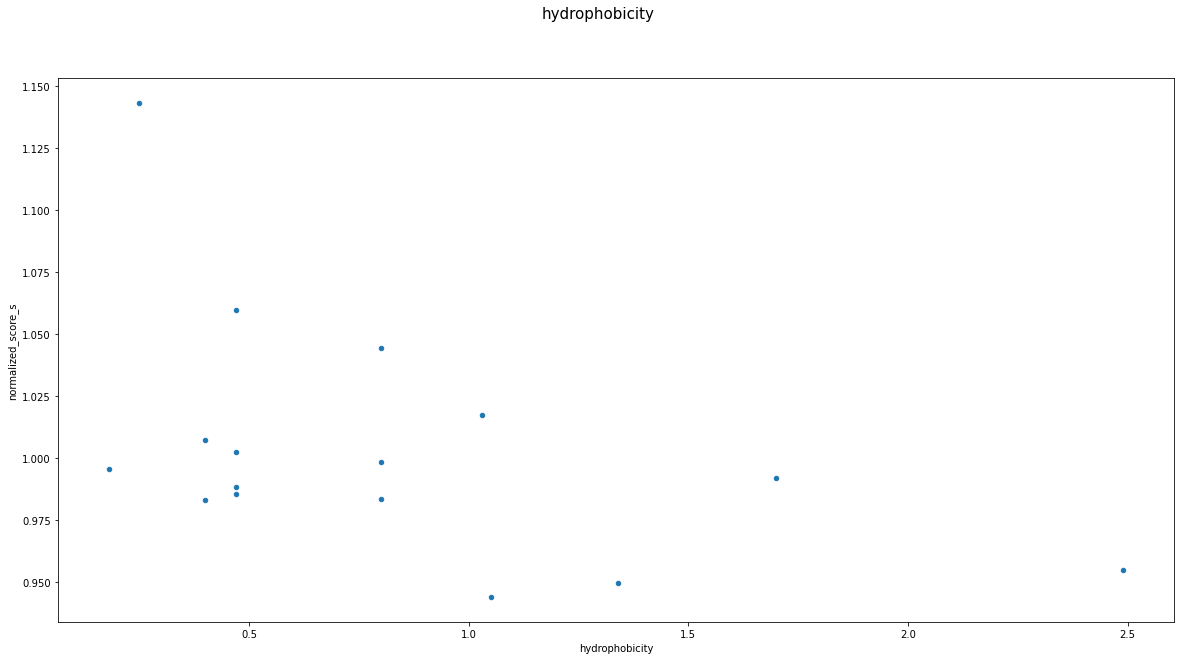

In [104]:
e1_ubiquitin_merged.plot.scatter(y='normalized_score_s',x='hydrophobicity')
plt.suptitle('hydrophobicity',size=15)

Text(0.5, 0.98, 'substitutionMatrix')

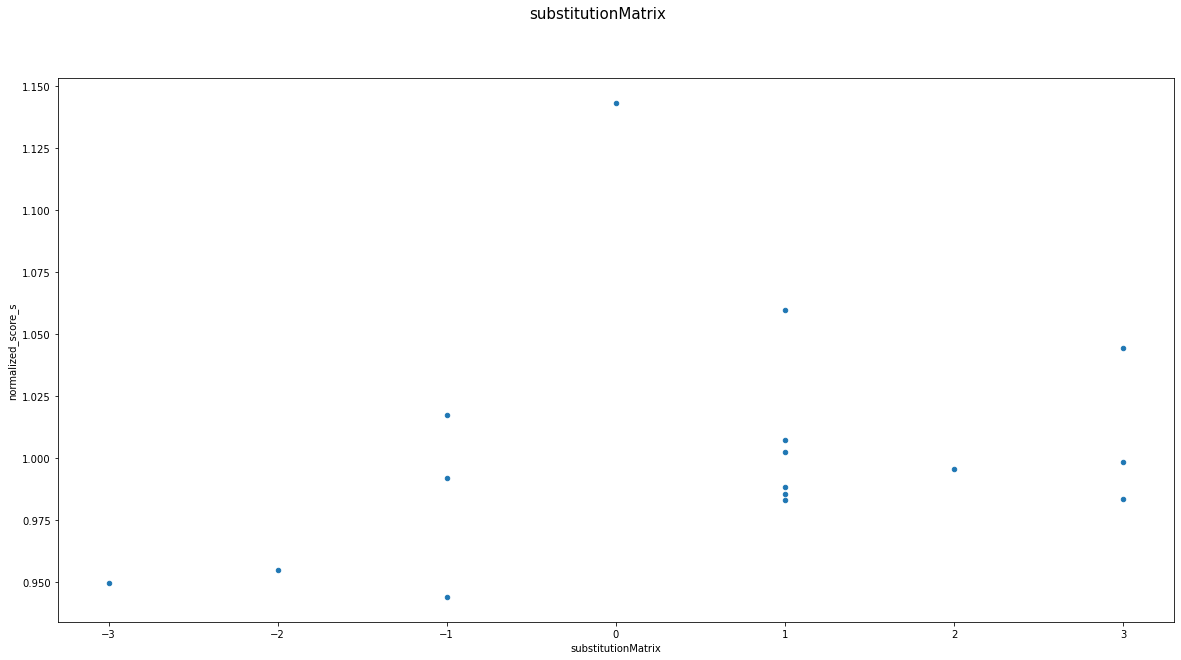

In [103]:
e1_ubiquitin_merged.plot.scatter(y='normalized_score_s',x='substitutionMatrix')
plt.suptitle('substitutionMatrix',size=15)

Text(0.5, 0.98, 'pssm-native')

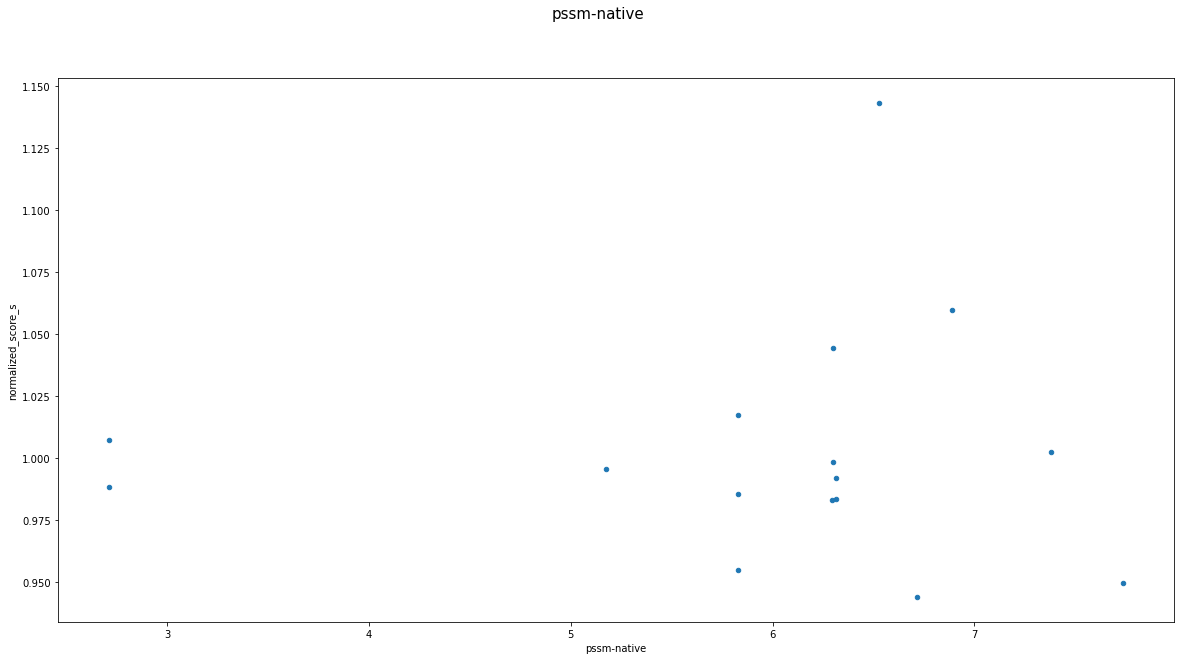

In [102]:
e1_ubiquitin_merged.plot.scatter(y='normalized_score_s',x='pssm-native')
plt.suptitle('pssm-native',size=15)

Text(0.5, 0.98, 'entropy')

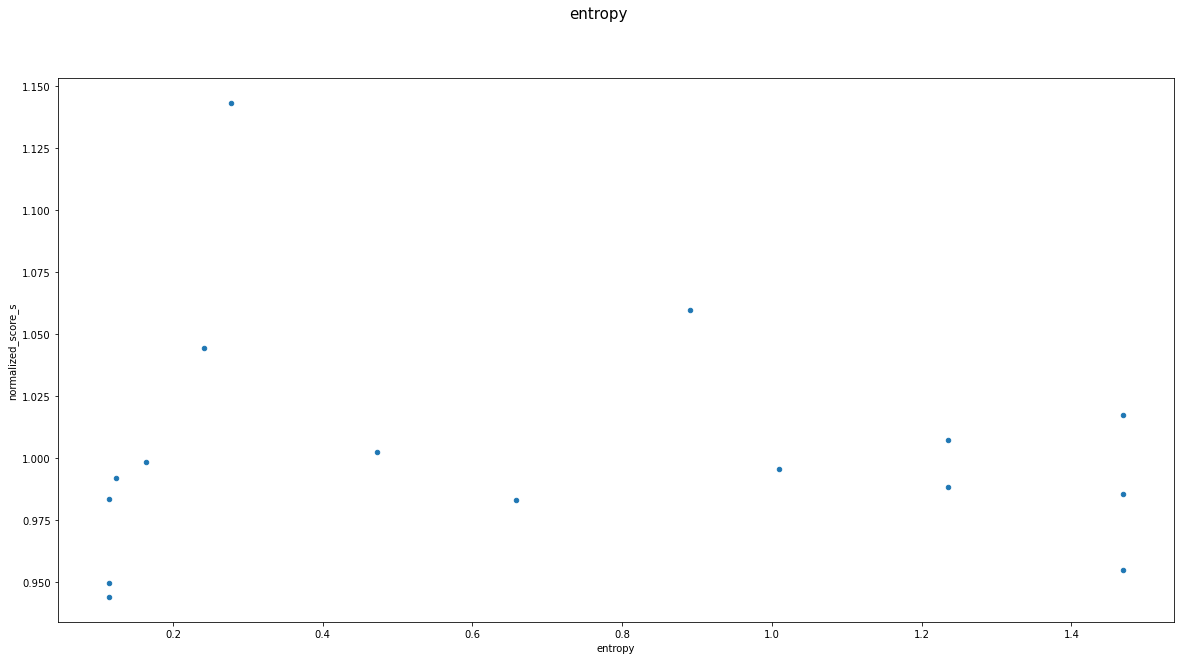

In [101]:
e1_ubiquitin_merged.plot.scatter(y='normalized_score_s',x='entropy')
plt.suptitle('entropy',size=15)

<h1>Regression Line</h1>

Text(0.5, 0.98, 'vdwVolume')

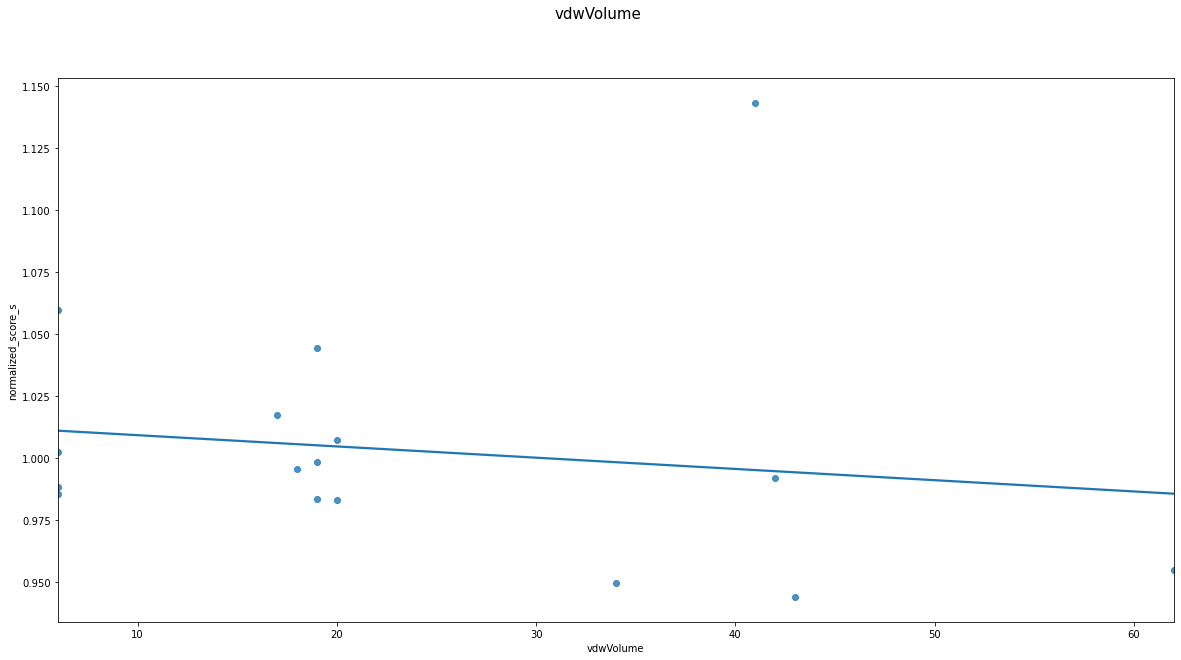

In [100]:
sns.regplot(y = 'normalized_score_s', x = 'vdwVolume', ci = None, data = e1_ubiquitin_merged) 
plt.suptitle('vdwVolume',size=15)

Text(0.5, 0.98, 'hydrophobicity')

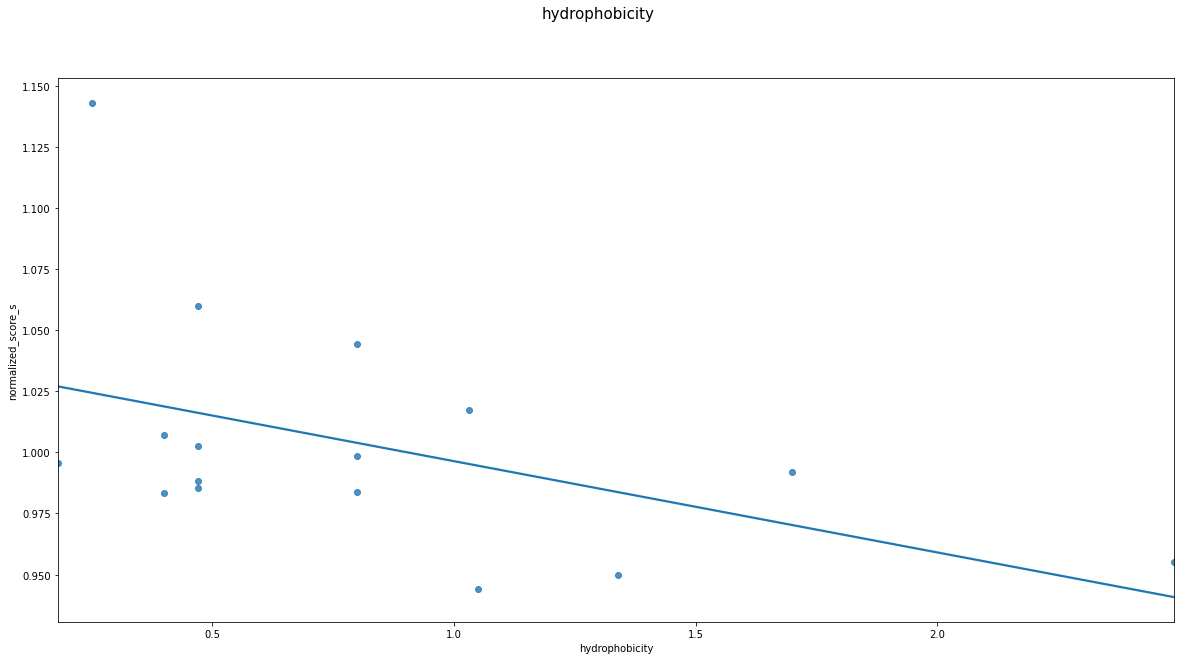

In [99]:
sns.regplot(y = 'normalized_score_s', x = 'hydrophobicity', ci = None, data = e1_ubiquitin_merged) 
plt.suptitle('hydrophobicity',size=15)

Text(0.5, 0.98, 'substitutionMatrix')

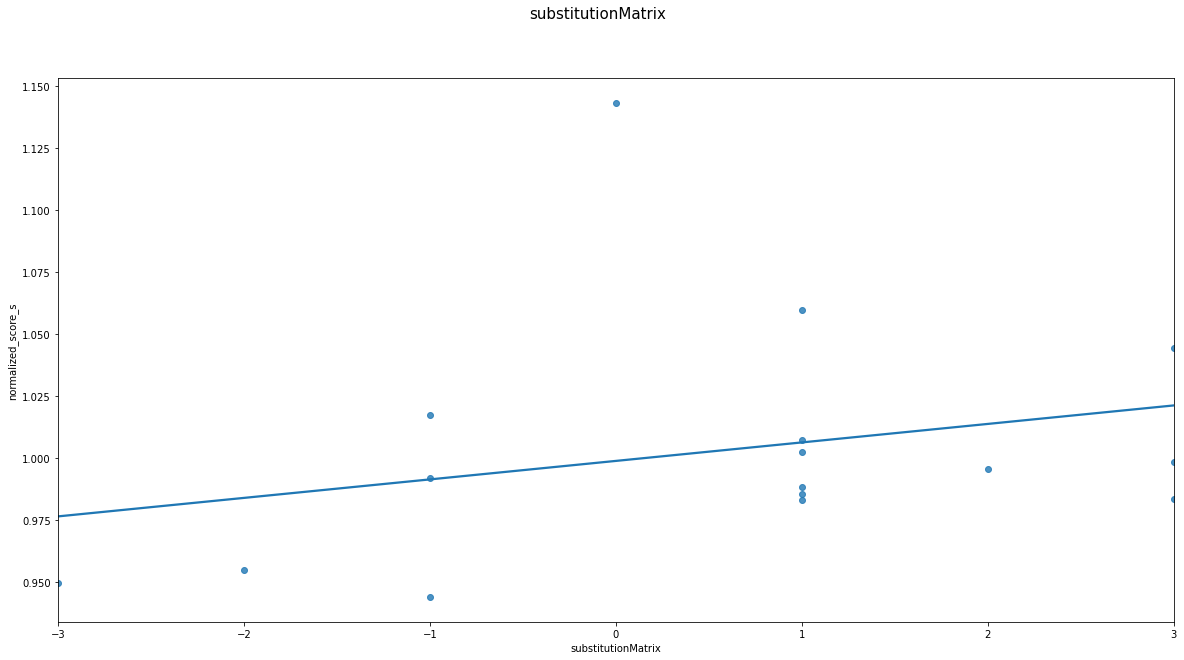

In [98]:
sns.regplot(y = 'normalized_score_s', x = 'substitutionMatrix', ci = None, data = e1_ubiquitin_merged) 
plt.suptitle('substitutionMatrix',size=15)

Text(0.5, 0.98, 'pssm-native')

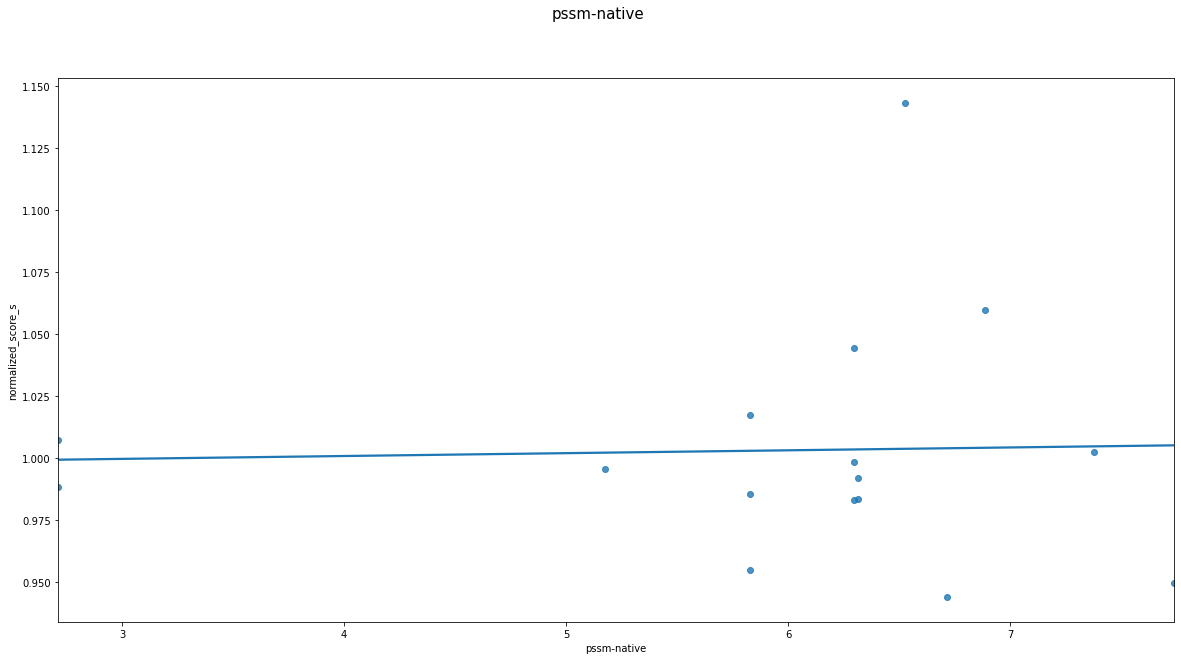

In [97]:
sns.regplot(y = 'normalized_score_s', x = 'pssm-native', ci = None, data = e1_ubiquitin_merged) 
plt.suptitle('pssm-native',size=15)

Text(0.5, 0.98, 'entropy')

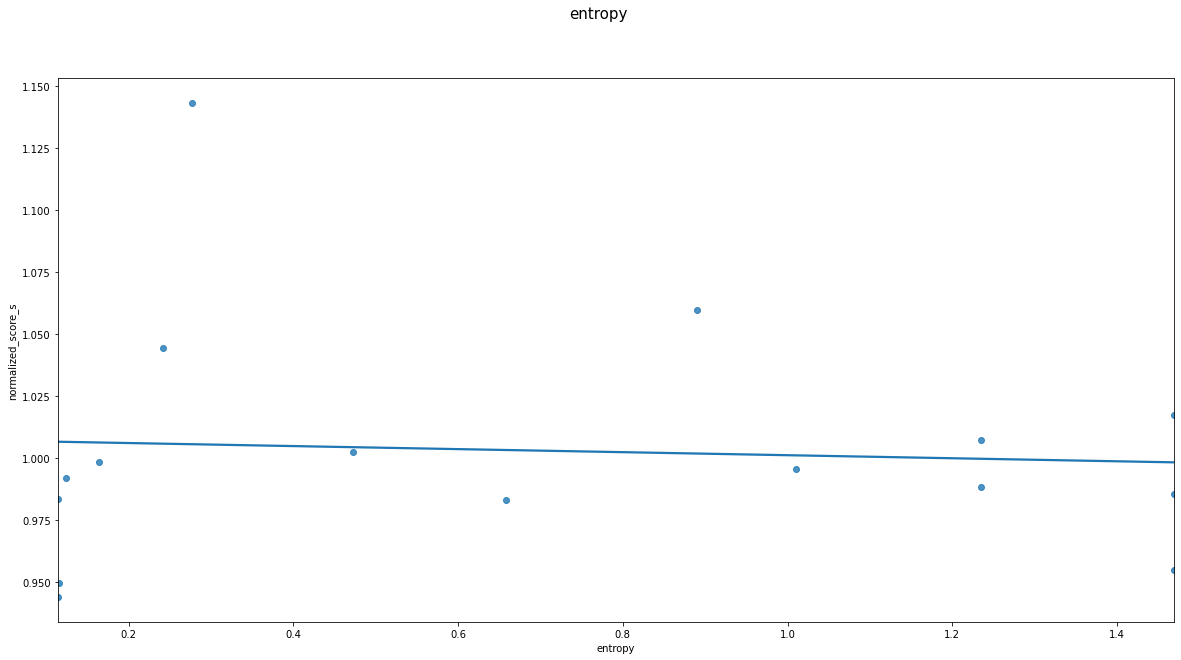

In [96]:
sns.regplot(y = 'normalized_score_s', x = 'entropy', ci = None, data = e1_ubiquitin_merged)
plt.suptitle('entropy',size=15)

Text(0.5, 0.98, 'impRes')

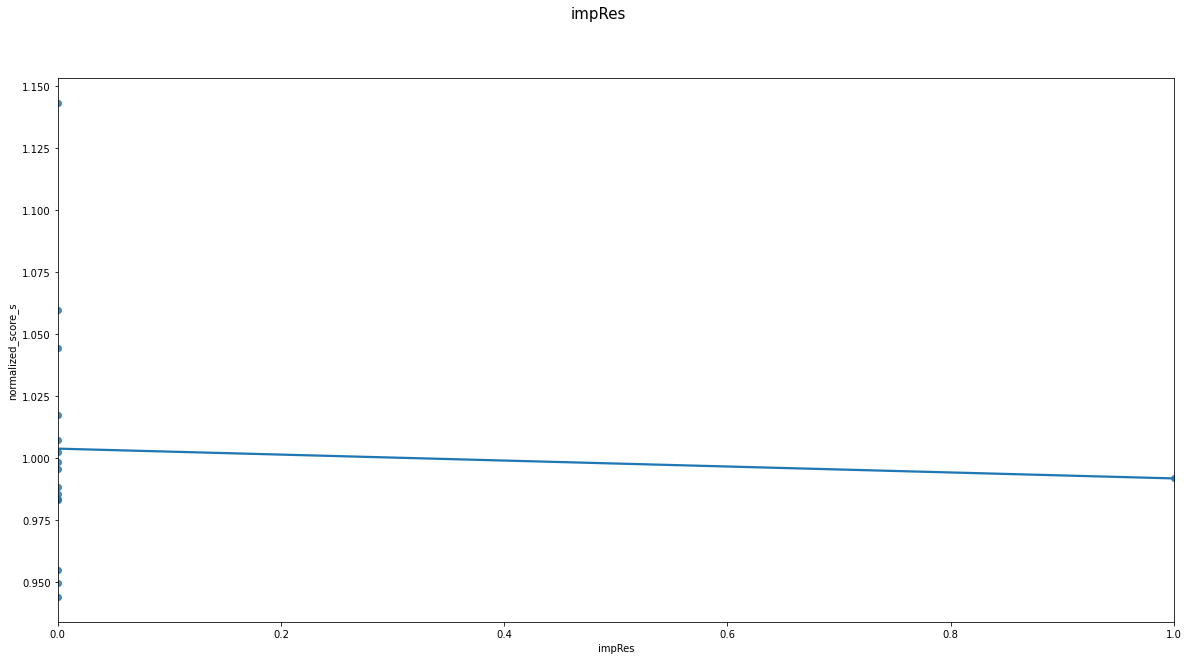

In [95]:
sns.regplot(y= 'normalized_score_s', x = 'impRes', ci = None, data = e1_ubiquitin_merged)
plt.suptitle('impRes',size=15)

<h1>All in SubPlots</h1>

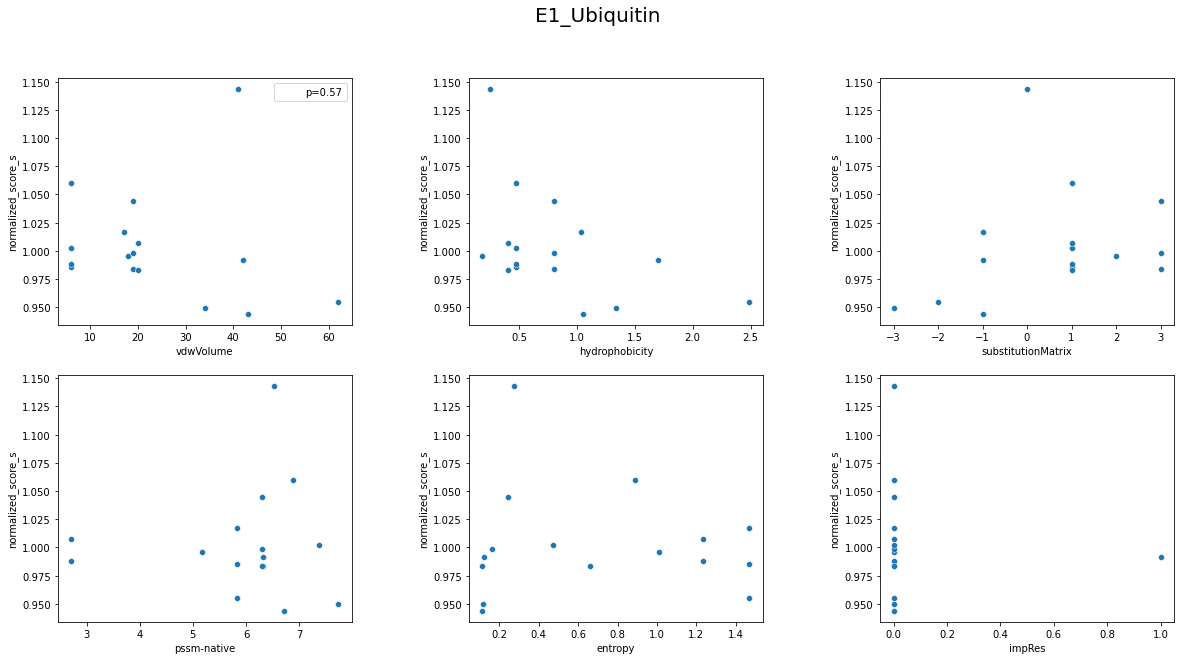

In [106]:
plt.subplots_adjust(wspace=0.4)
plt.suptitle("E1_Ubiquitin", size=20)

plot1 = plt.subplot(2,3,1)
plot1 = sns.scatterplot(x ='vdwVolume',y = 'normalized_score_s', data=e1_ubiquitin_merged)
r, p = stats.pearsonr(e1_ubiquitin_merged["normalized_score_s"],e1_ubiquitin_merged["vdwVolume"] )
phantom, = plot1.plot([], [], linestyle="", alpha=0)
plot1.legend([phantom],['p={:.2f}'.format(p)], fontsize=10)

plot2 = plt.subplot(2,3,2)
plot2 = sns.scatterplot(x ='hydrophobicity', y ='normalized_score_s', data=e1_ubiquitin_merged)

plot3 = plt.subplot(2,3,3)
plot3 = sns.scatterplot(x ='substitutionMatrix', y ='normalized_score_s', data=e1_ubiquitin_merged)

plot4 = plt.subplot(2,3,4)
plot4 = sns.scatterplot(x ='pssm-native', y ='normalized_score_s', data=e1_ubiquitin_merged)

plot5 = plt.subplot(2,3,5)
plot5 = sns.scatterplot(x ='entropy', y ='normalized_score_s', data=e1_ubiquitin_merged)

plot6 = plt.subplot(2,3,6)
plot6 = sns.scatterplot(x ='impRes', y ='normalized_score_s', data=e1_ubiquitin_merged)


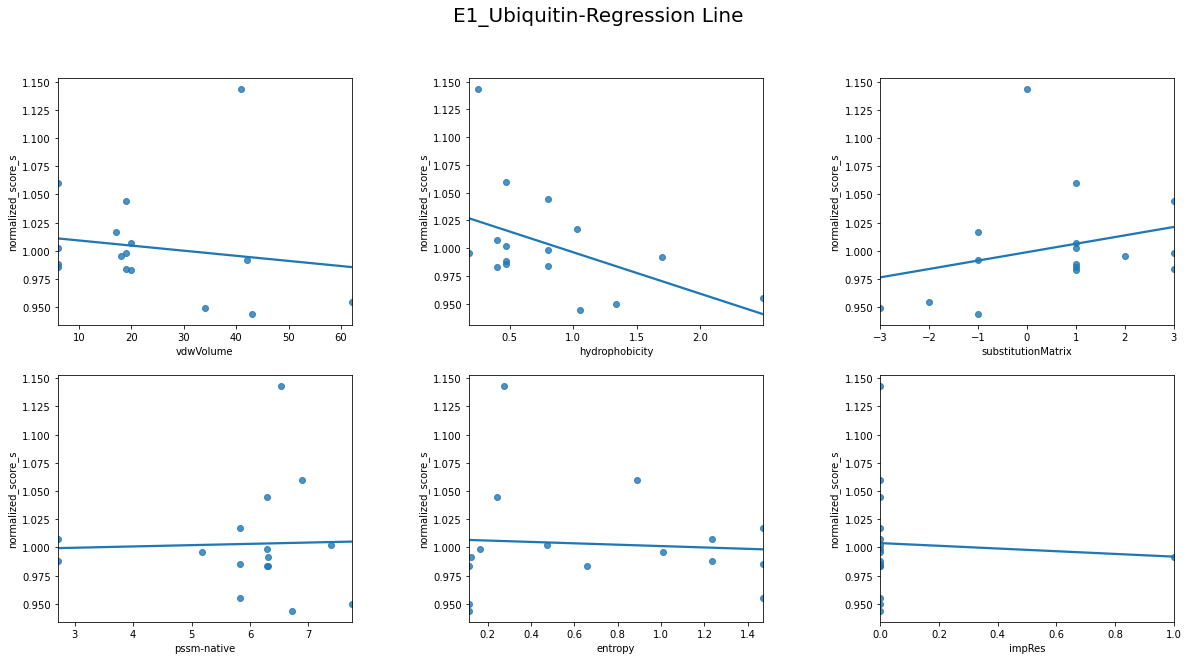

In [107]:
plt.subplots_adjust(wspace=0.4)
plt.suptitle("E1_Ubiquitin-Regression Line", size=20)

rg1 = plt.subplot(2,3,1)
rg1 = sns.regplot(y = 'normalized_score_s', x = 'vdwVolume', ci = None, data = e1_ubiquitin_merged);

rg2 = plt.subplot(2,3,2)
rg2 = sns.regplot(y = 'normalized_score_s', x = 'hydrophobicity', ci = None, data = e1_ubiquitin_merged);

rg3 = plt.subplot(2,3,3)
rg3 = sns.regplot(y = 'normalized_score_s', x = 'substitutionMatrix', ci = None, data = e1_ubiquitin_merged);

rg4 = plt.subplot(2,3,4)
rg4 = sns.regplot(y = 'normalized_score_s', x = 'pssm-native', ci = None, data = e1_ubiquitin_merged);

rg5 = plt.subplot(2,3,5)
rg5 = sns.regplot(y = 'normalized_score_s', x = 'entropy', ci = None, data = e1_ubiquitin_merged);

rg6 = plt.subplot(2,3,6)
rg6 = sns.regplot(y = 'normalized_score_s', x = 'impRes', ci = None, data = e1_ubiquitin_merged);

<h1>E3_ligase</h1>

Text(0.5, 0.98, 'vdwVolume')

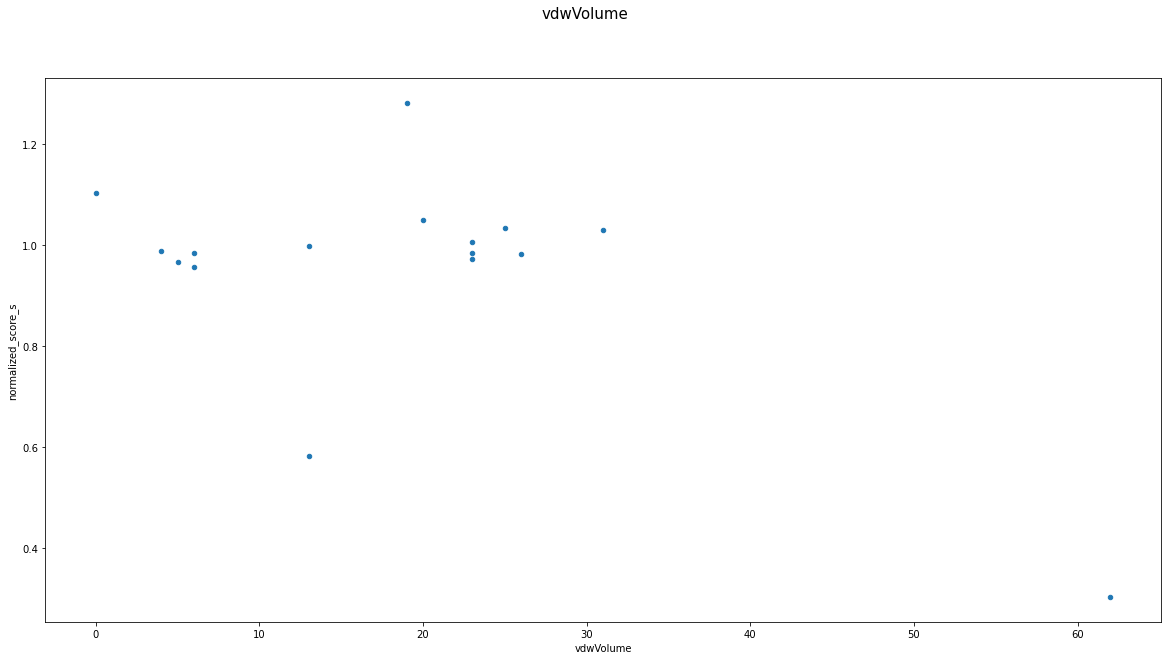

In [92]:
e3_ligase_merged.plot.scatter(y='normalized_score_s',x='vdwVolume')
plt.suptitle('vdwVolume',size=15)

Text(0.5, 0.98, 'hydrophobicity')

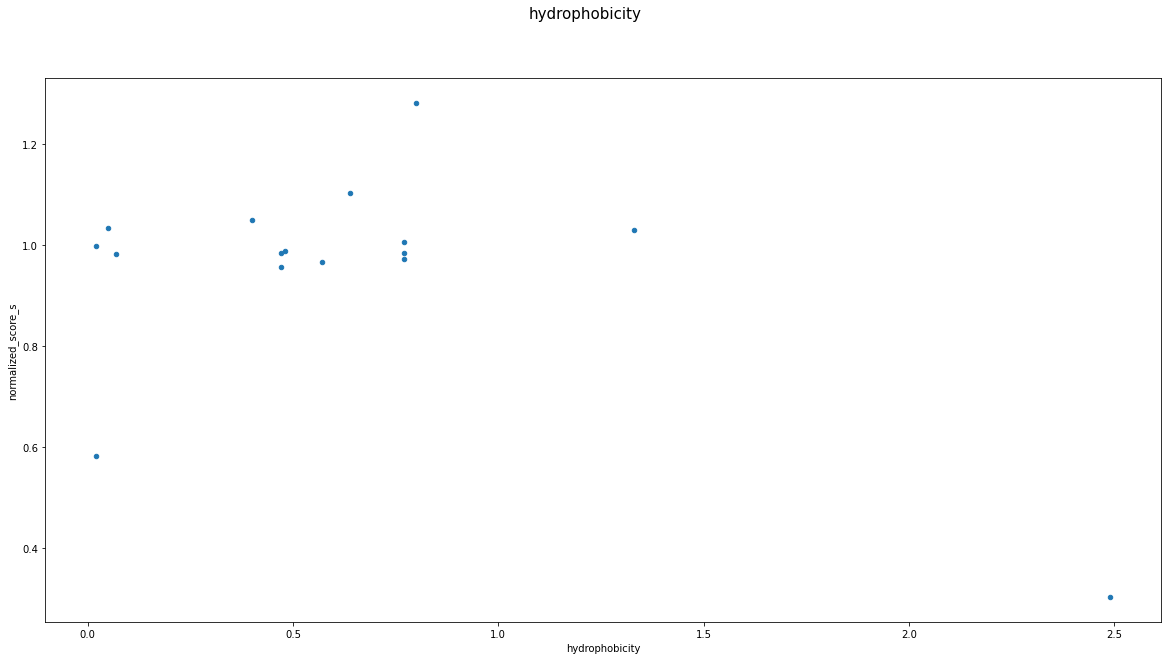

In [91]:
e3_ligase_merged.plot.scatter(y='normalized_score_s',x='hydrophobicity')
plt.suptitle('hydrophobicity',size=15)

Text(0.5, 0.98, 'substitutionMatrix')

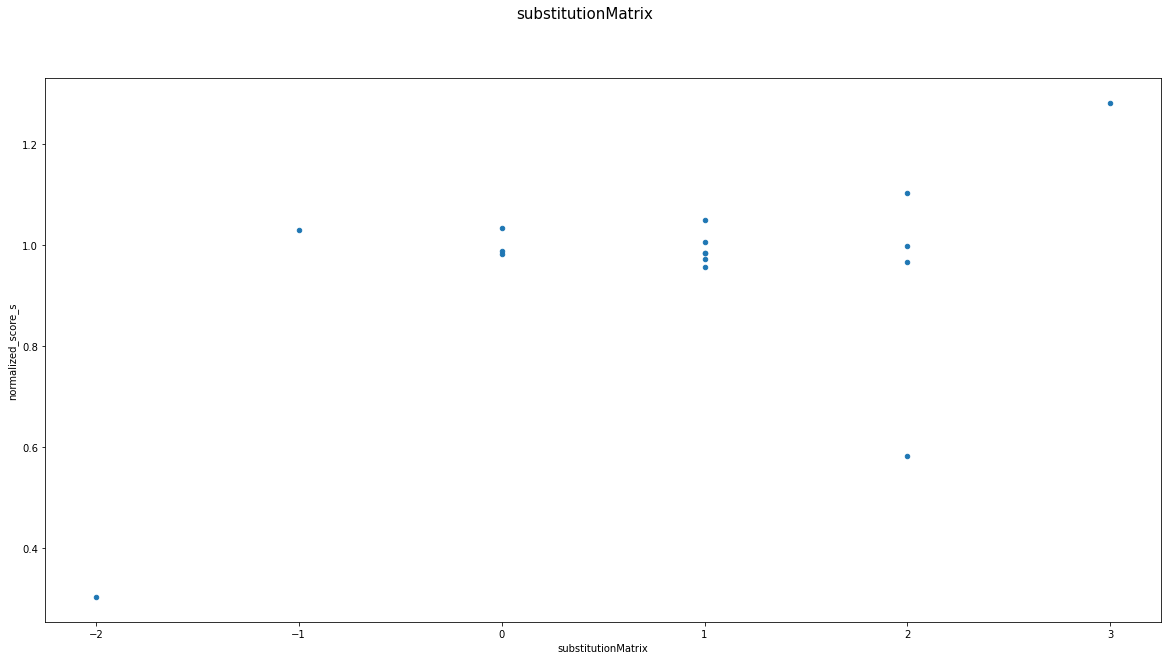

In [90]:
e3_ligase_merged.plot.scatter(y='normalized_score_s',x='substitutionMatrix')
plt.suptitle('substitutionMatrix',size=15)

Text(0.5, 0.98, 'pssm-native')

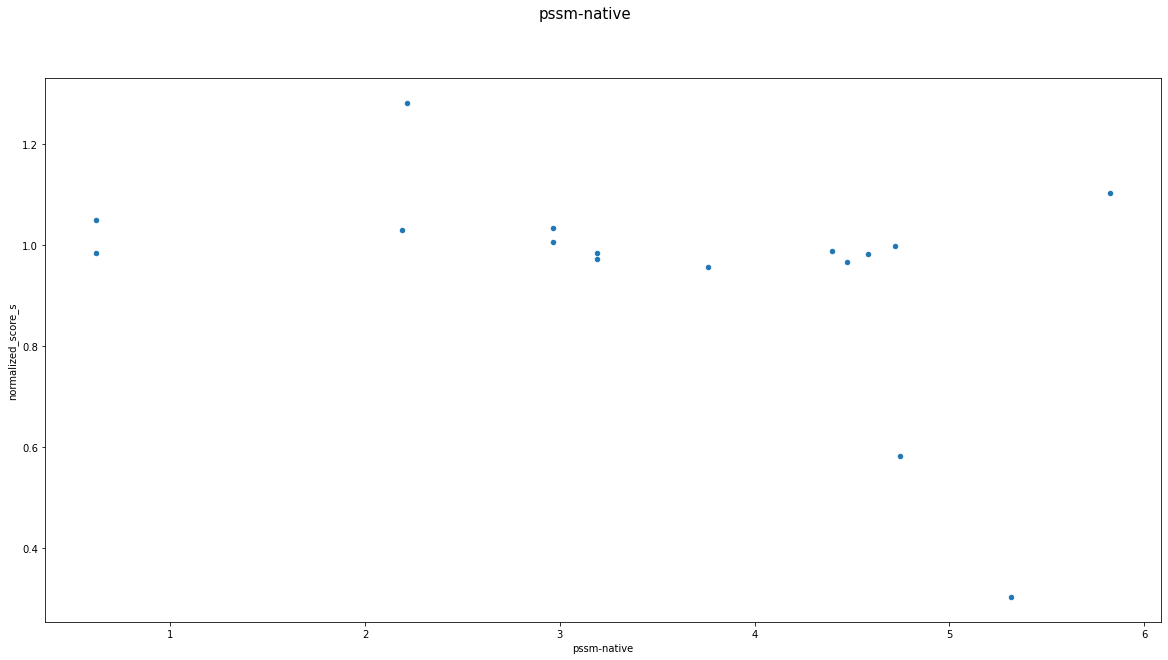

In [89]:
e3_ligase_merged.plot.scatter(y='normalized_score_s',x='pssm-native')
plt.suptitle('pssm-native',size=15)

Text(0.5, 0.98, 'entropy')

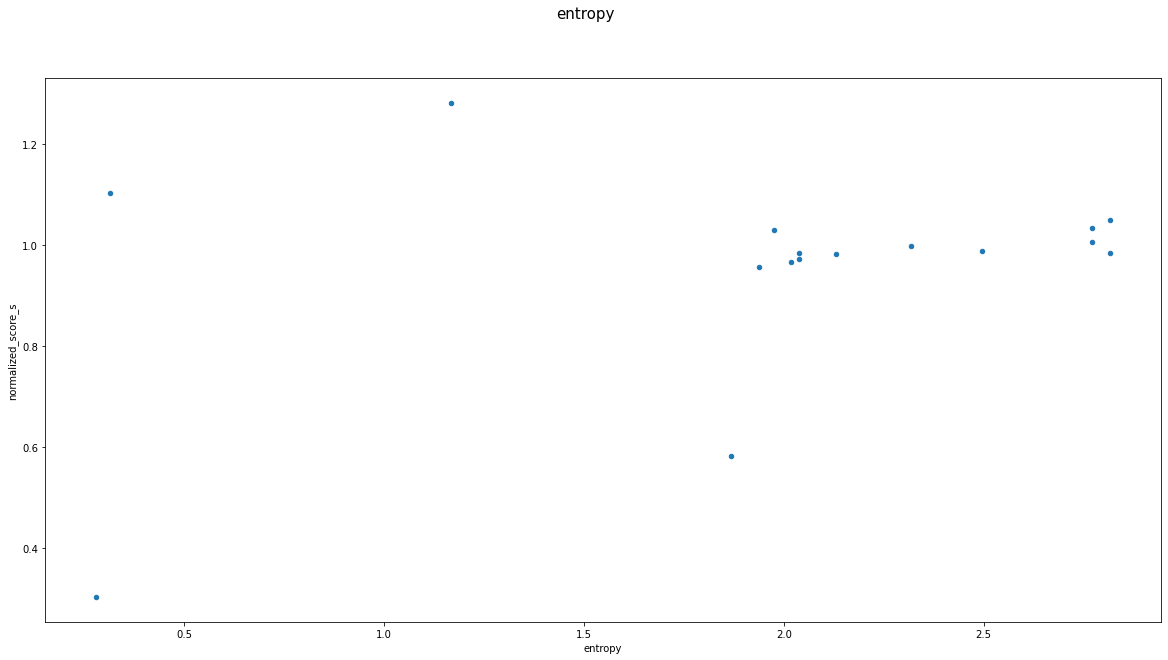

In [88]:
e3_ligase_merged.plot.scatter(y='normalized_score_s',x='entropy')
plt.suptitle('entropy',size=15)

<h1>Regression Line</h1>

Text(0.5, 0.98, 'vdwVolume')

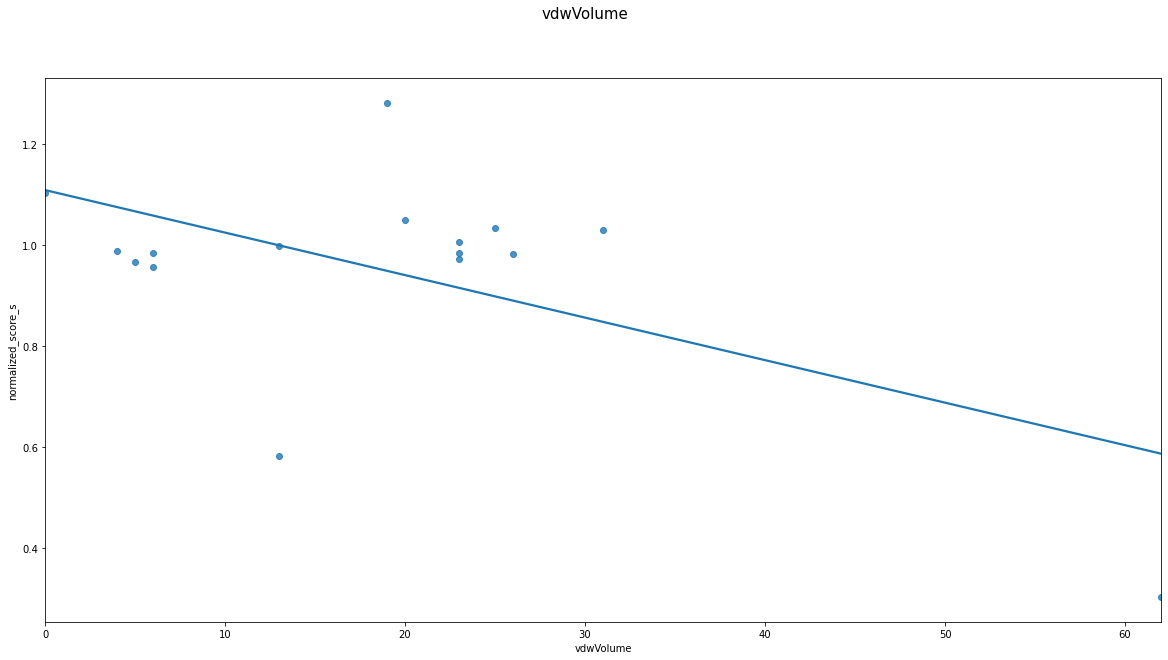

In [93]:
sns.regplot(y = 'normalized_score_s', x = 'vdwVolume', ci = None, data = e3_ligase_merged)
plt.suptitle('vdwVolume',size=15)

Text(0.5, 0.98, 'hydrophobicity')

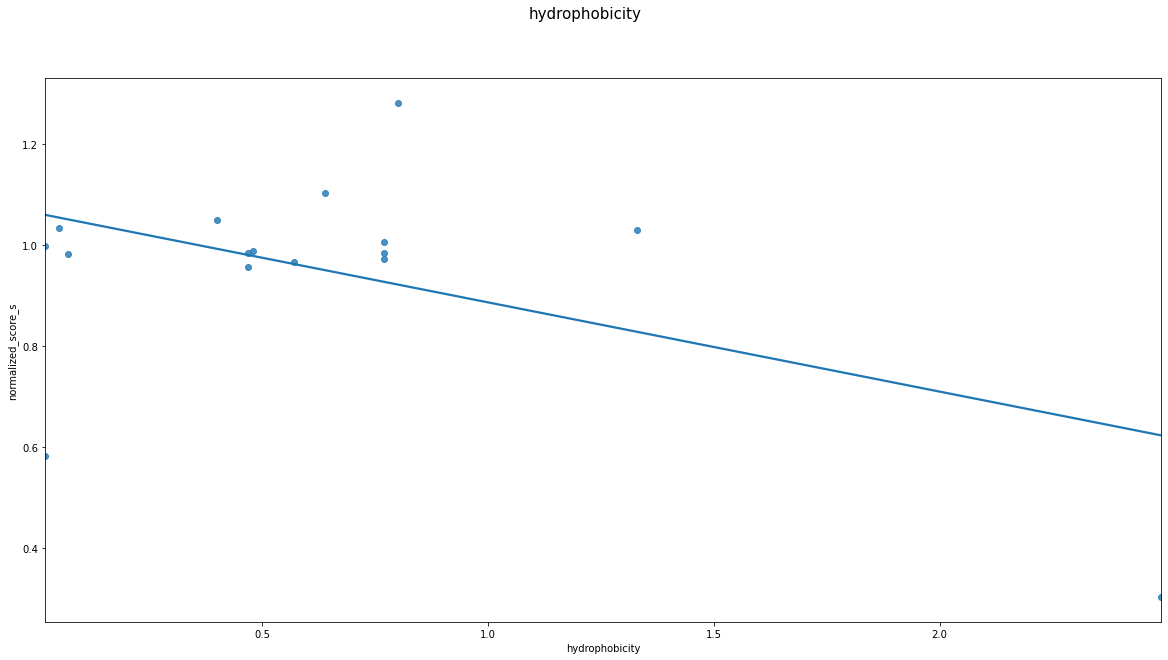

In [108]:
sns.regplot(y = 'normalized_score_s', x = 'hydrophobicity', ci = None, data = e3_ligase_merged)
plt.suptitle('hydrophobicity',size=15)

Text(0.5, 0.98, 'substitutionMatrix')

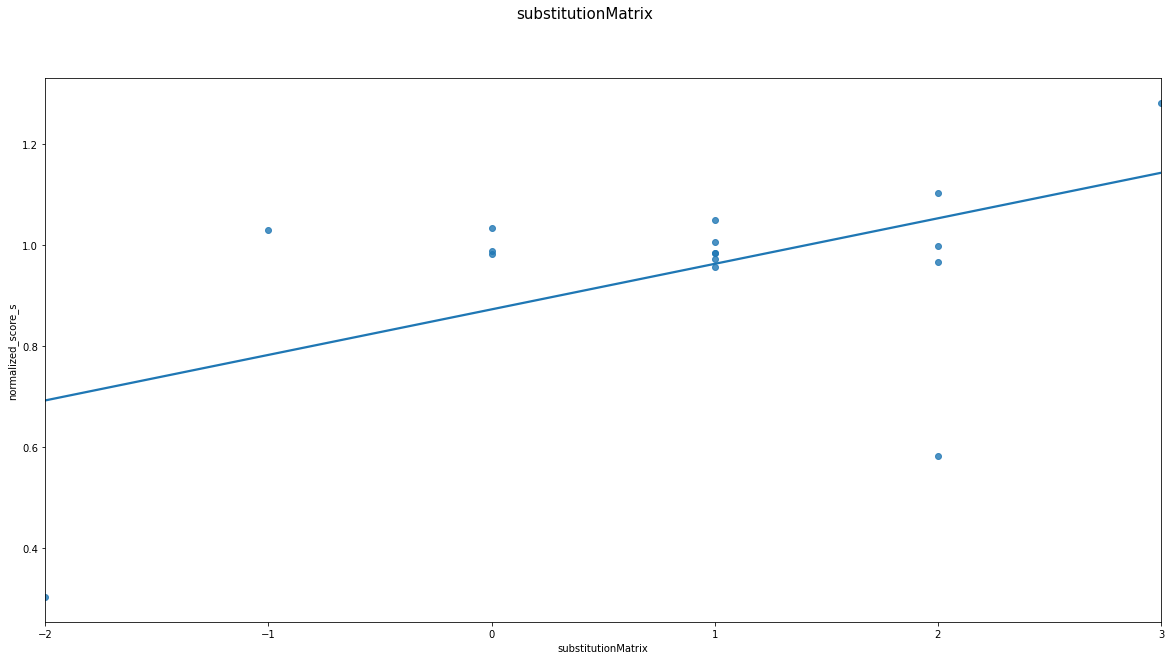

In [109]:
sns.regplot(y = 'normalized_score_s', x = 'substitutionMatrix', ci = None, data = e3_ligase_merged)
plt.suptitle('substitutionMatrix',size=15)

Text(0.5, 0.98, 'pssm-native')

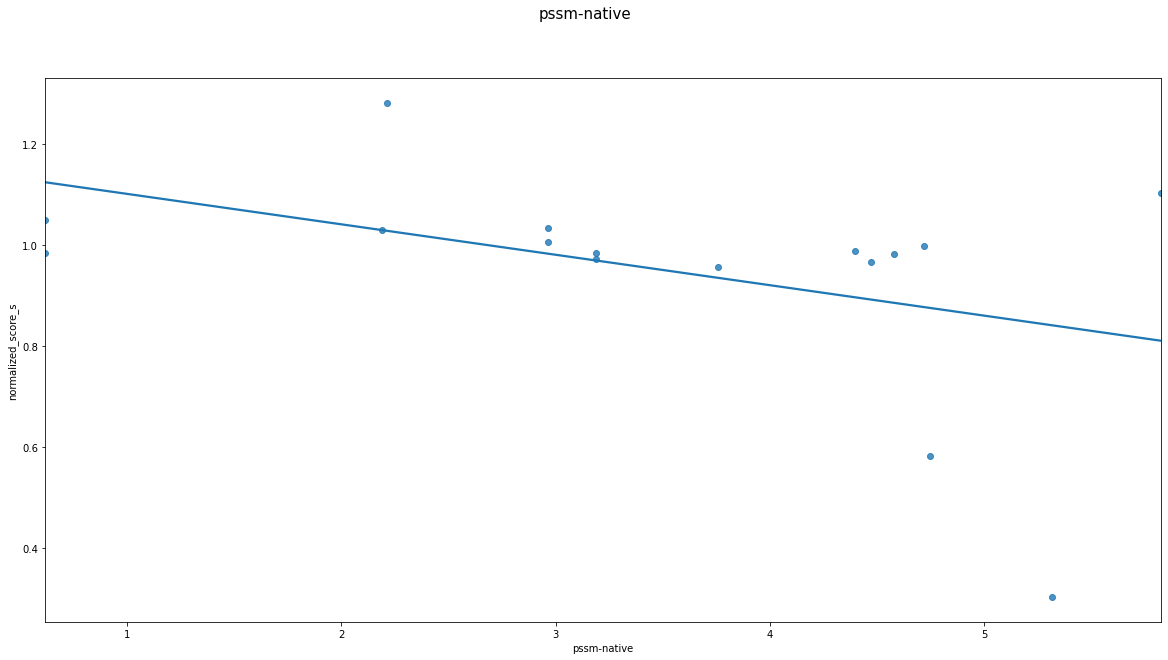

In [110]:
sns.regplot(y = 'normalized_score_s', x = 'pssm-native', ci = None, data = e3_ligase_merged)
plt.suptitle('pssm-native',size=15)

Text(0.5, 0.98, 'entropy')

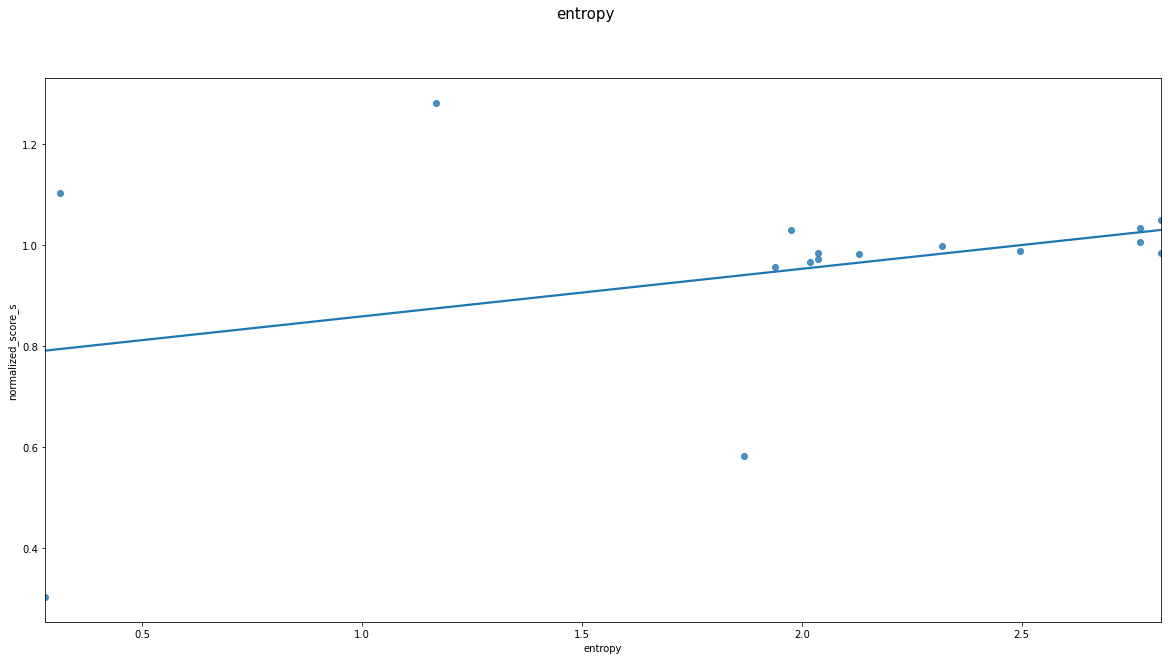

In [111]:
sns.regplot(y = 'normalized_score_s', x = 'entropy', ci = None, data = e3_ligase_merged)
plt.suptitle('entropy',size=15)

Text(0.5, 0.98, 'impRes')

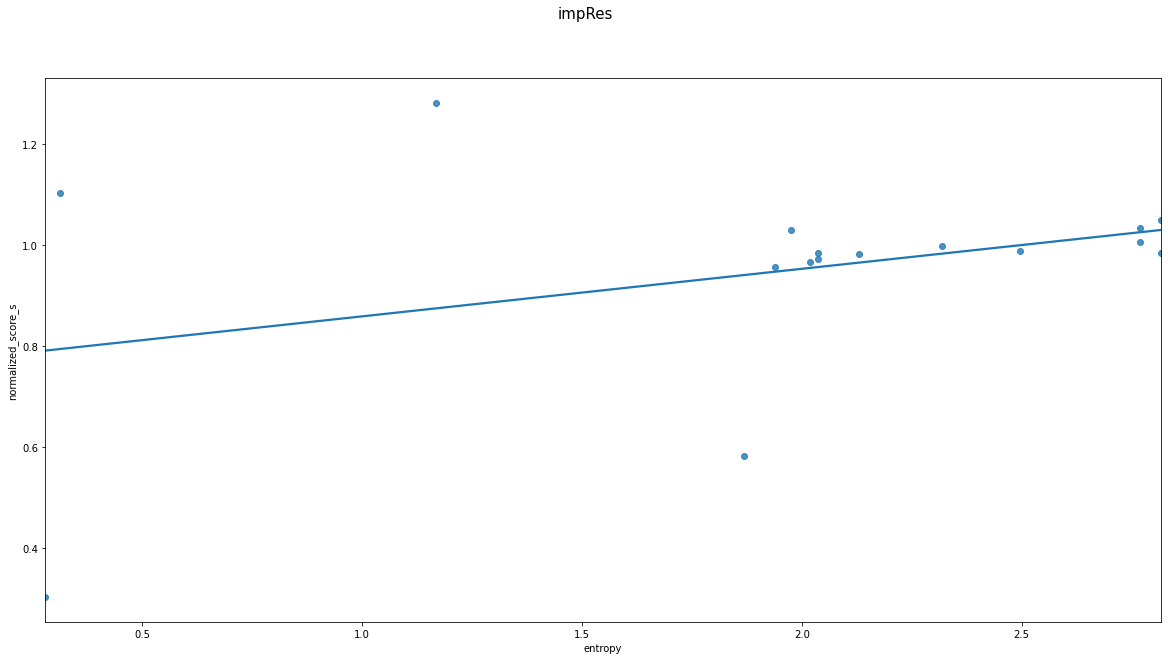

In [87]:
sns.regplot(y = 'normalized_score_s', x = 'entropy', ci = None, data = e3_ligase_merged)
plt.suptitle('impRes',size=15)

<h1>View as SubPlots</h1>

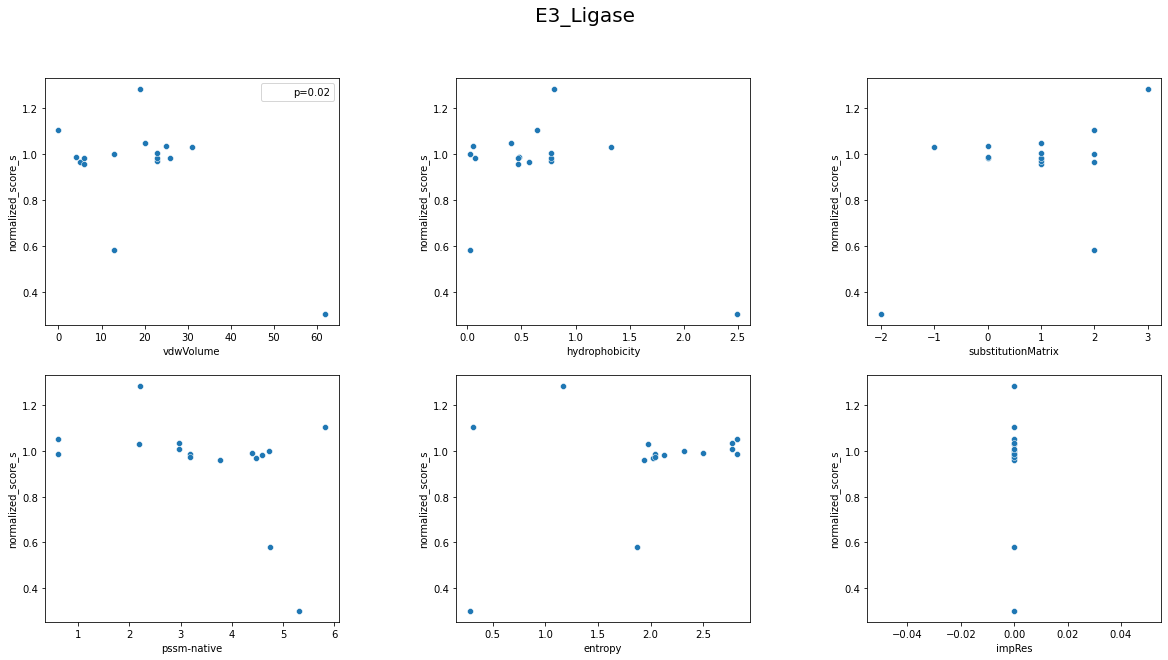

In [114]:
plt.subplots_adjust(wspace=0.4)
plt.suptitle("E3_Ligase", size=20)

plot1 = plt.subplot(2,3,1)
plot1 = sns.scatterplot(x ='vdwVolume',y = 'normalized_score_s', data=e3_ligase_merged)
r, p = stats.pearsonr(e3_ligase_merged["normalized_score_s"],e3_ligase_merged["vdwVolume"] )
phantom, = plot1.plot([], [], linestyle="", alpha=0)
plot1.legend([phantom],['p={:.2f}'.format(p)], fontsize=10)

plot2 = plt.subplot(2,3,2)
plot2 = sns.scatterplot(x ='hydrophobicity', y ='normalized_score_s', data=e3_ligase_merged)

plot3 = plt.subplot(2,3,3)
plot3 = sns.scatterplot(x ='substitutionMatrix', y ='normalized_score_s', data=e3_ligase_merged)

plot4 = plt.subplot(2,3,4)
plot4 = sns.scatterplot(x ='pssm-native', y ='normalized_score_s', data=e3_ligase_merged)

plot5 = plt.subplot(2,3,5)
plot5 = sns.scatterplot(x ='entropy', y ='normalized_score_s', data=e3_ligase_merged)

plot6 = plt.subplot(2,3,6)
plot6 = sns.scatterplot(x ='impRes', y ='normalized_score_s', data=e3_ligase_merged)

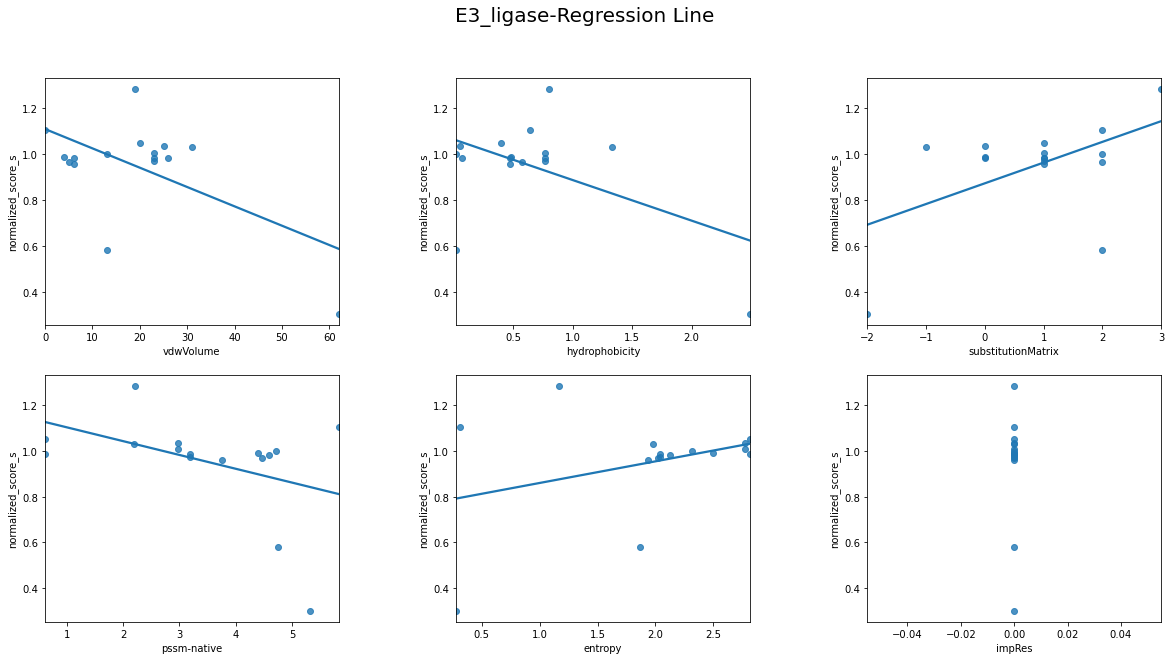

In [117]:
plt.subplots_adjust(wspace=0.4)
plt.suptitle("E3_ligase-Regression Line", size=20)

rg1 = plt.subplot(2,3,1)
rg1 = sns.regplot(y = 'normalized_score_s', x = 'vdwVolume', ci = None, data = e3_ligase_merged);

rg2 = plt.subplot(2,3,2)
rg2 = sns.regplot(y = 'normalized_score_s', x = 'hydrophobicity', ci = None, data = e3_ligase_merged);

rg3 = plt.subplot(2,3,3)
rg3 = sns.regplot(y = 'normalized_score_s', x = 'substitutionMatrix', ci = None, data = e3_ligase_merged);

rg4 = plt.subplot(2,3,4)
rg4 = sns.regplot(y = 'normalized_score_s', x = 'pssm-native', ci = None, data = e3_ligase_merged);

rg5 = plt.subplot(2,3,5)
rg5 = sns.regplot(y = 'normalized_score_s', x = 'entropy', ci = None, data = e3_ligase_merged);

rg6 = plt.subplot(2,3,6)
rg6 = sns.regplot(y = 'normalized_score_s', x = 'impRes', ci = None, data = e3_ligase_merged);

<h1>PSD95pdz3</h1>


Text(0.5, 0.98, 'vdwVolume')

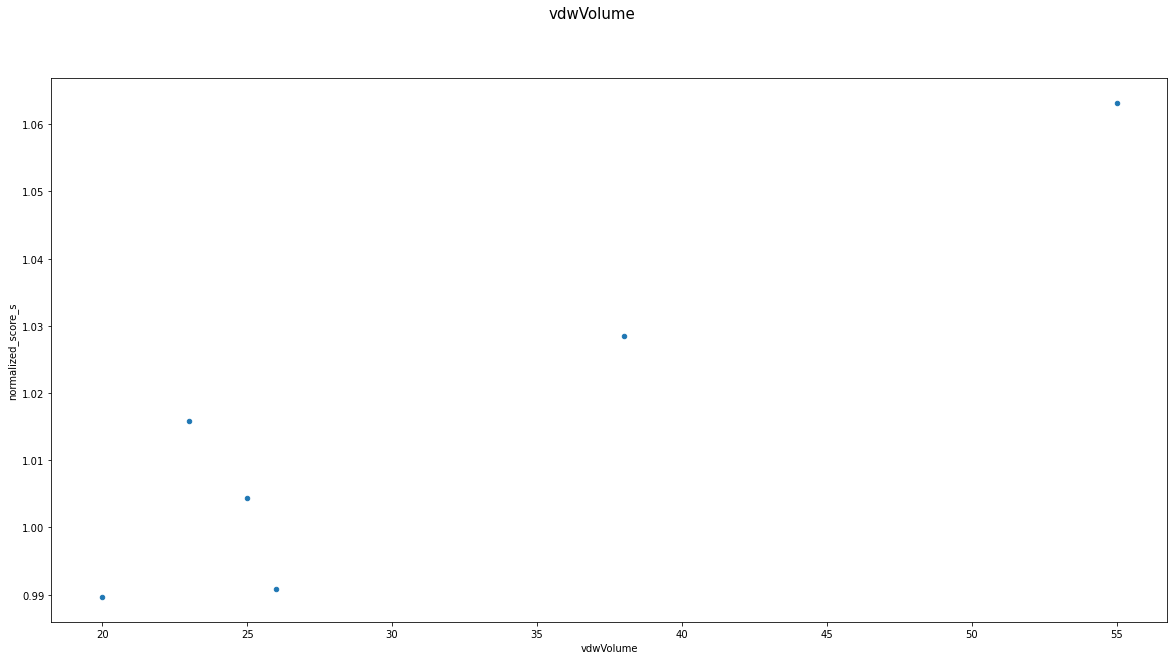

In [119]:
pSD95pdz3_merged.plot.scatter(y='normalized_score_s',x='vdwVolume')
plt.suptitle('vdwVolume',size=15)

Text(0.5, 0.98, 'hydrophobicity')

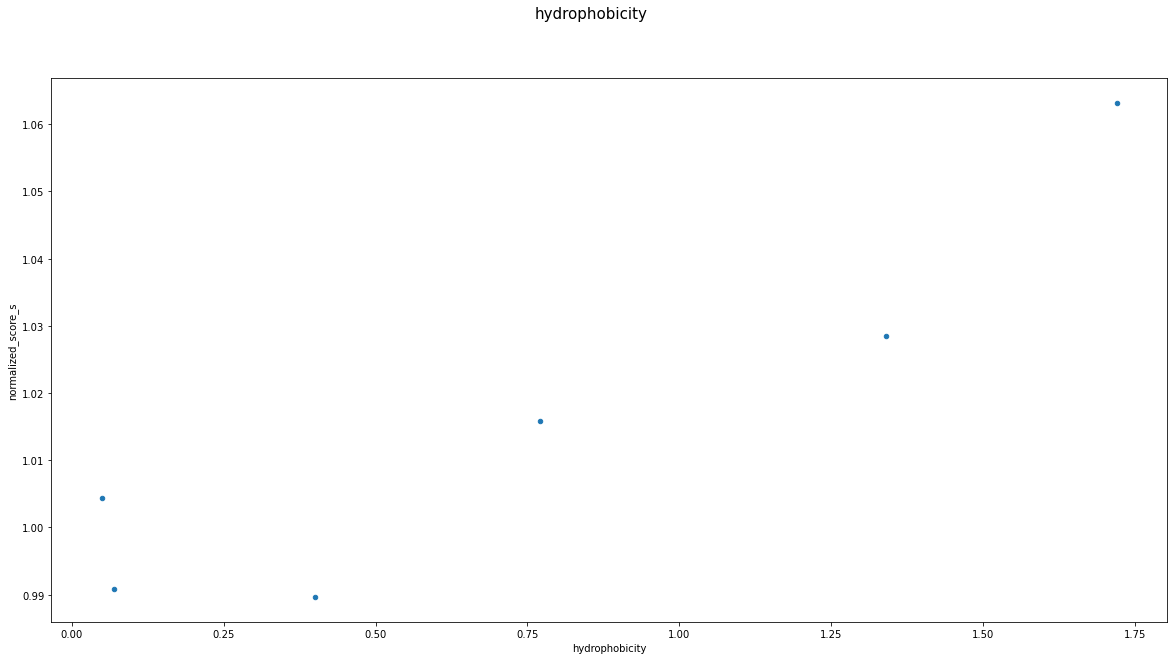

In [120]:
pSD95pdz3_merged.plot.scatter(y='normalized_score_s',x='hydrophobicity')
plt.suptitle('hydrophobicity',size=15)

Text(0.5, 0.98, 'substitutionMatrix')

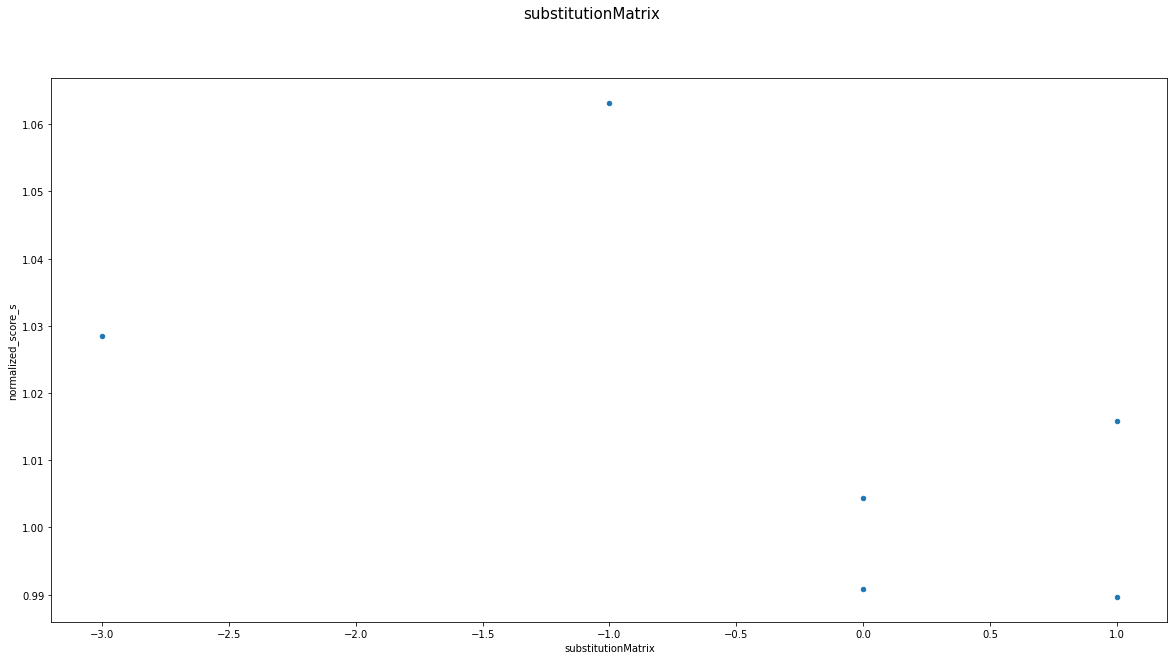

In [121]:
pSD95pdz3_merged.plot.scatter(y='normalized_score_s',x='substitutionMatrix')
plt.suptitle('substitutionMatrix',size=15)

Text(0.5, 0.98, 'pssm-native')

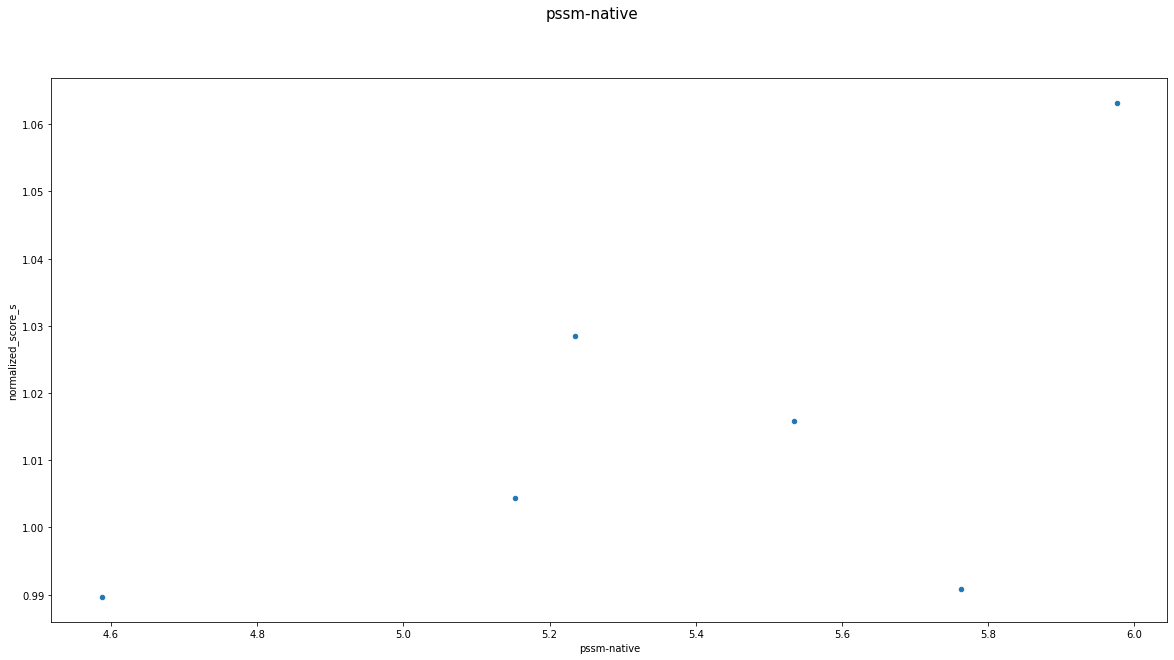

In [122]:
pSD95pdz3_merged.plot.scatter(y='normalized_score_s',x='pssm-native')
plt.suptitle('pssm-native',size=15)

Text(0.5, 0.98, 'entropy')

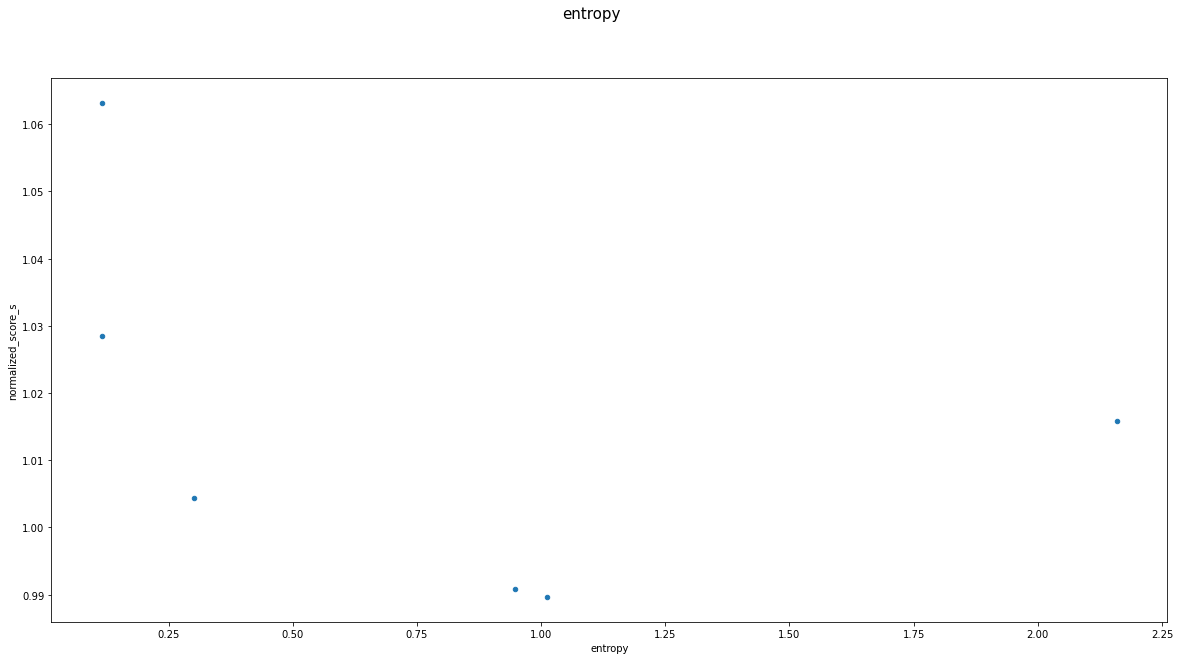

In [123]:
pSD95pdz3_merged.plot.scatter(y='normalized_score_s',x='entropy')
plt.suptitle('entropy',size=15)

<h1>Regression Line</h1>


Text(0.5, 0.98, 'vdwVolume')

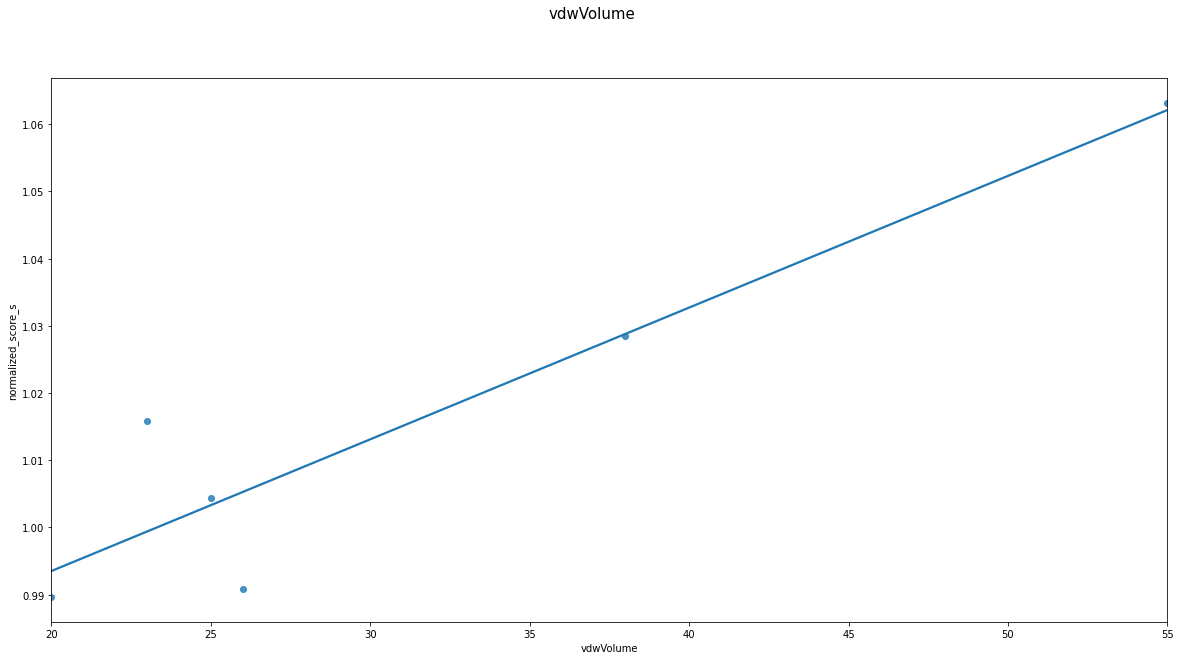

In [124]:
sns.regplot(y = 'normalized_score_s', x = 'vdwVolume', ci = None, data = pSD95pdz3_merged)
plt.suptitle('vdwVolume',size=15)

Text(0.5, 0.98, 'hydrophobicity')

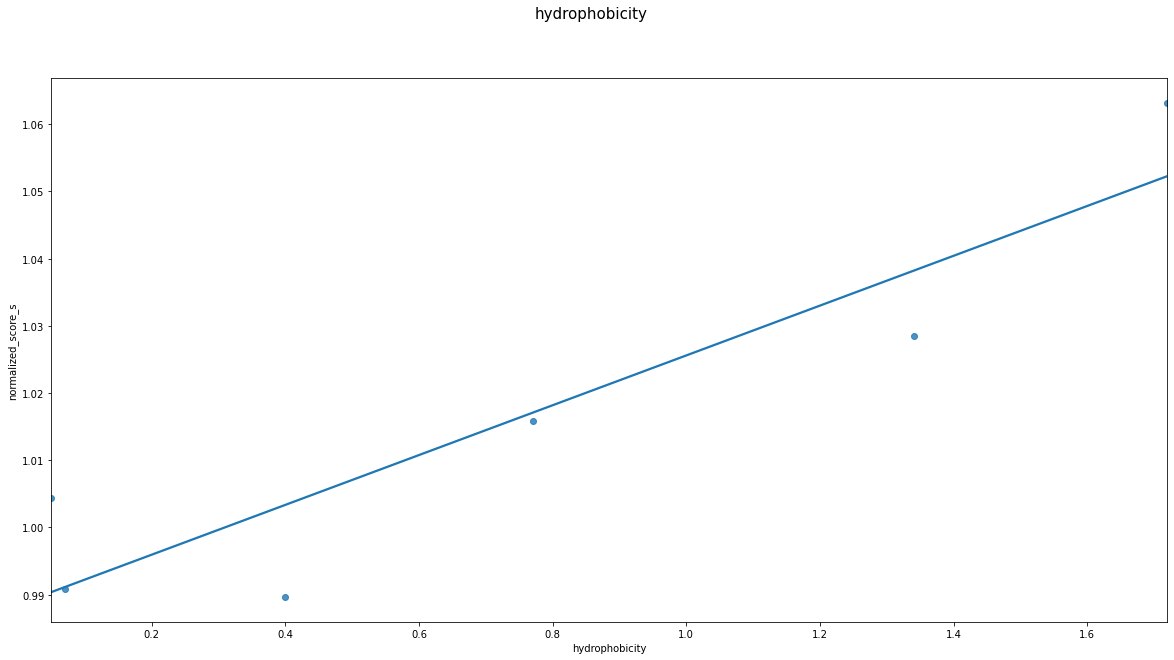

In [125]:
sns.regplot(y = 'normalized_score_s', x = 'hydrophobicity', ci = None, data = pSD95pdz3_merged)
plt.suptitle('hydrophobicity',size=15)

Text(0.5, 0.98, 'substitutionMatrix')

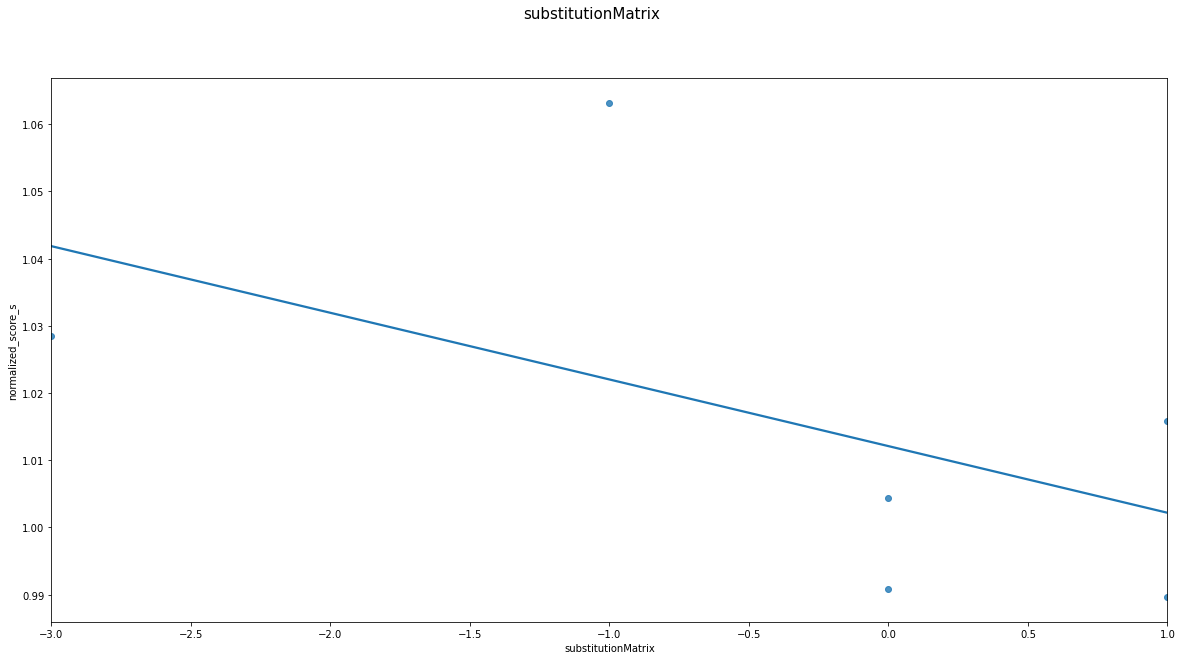

In [126]:
sns.regplot(y = 'normalized_score_s', x = 'substitutionMatrix', ci = None, data = pSD95pdz3_merged)
plt.suptitle('substitutionMatrix',size=15)

Text(0.5, 0.98, 'pssm-native')

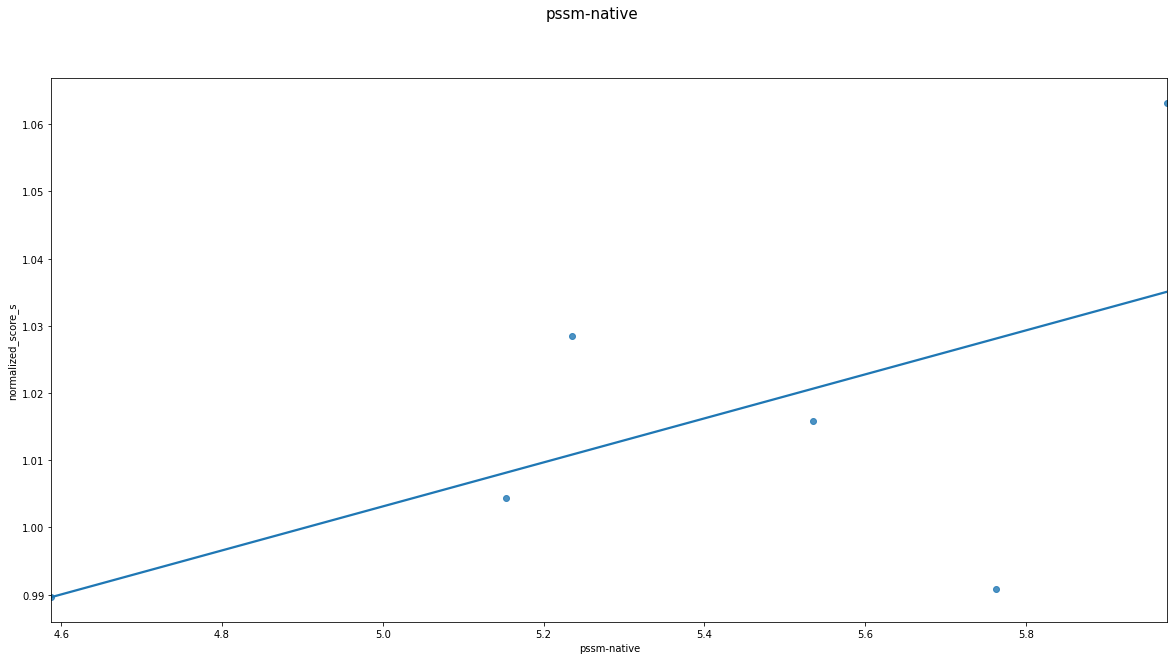

In [127]:
sns.regplot(y = 'normalized_score_s', x = 'pssm-native', ci = None, data = pSD95pdz3_merged)
plt.suptitle('pssm-native',size=15)

Text(0.5, 0.98, 'entropy')

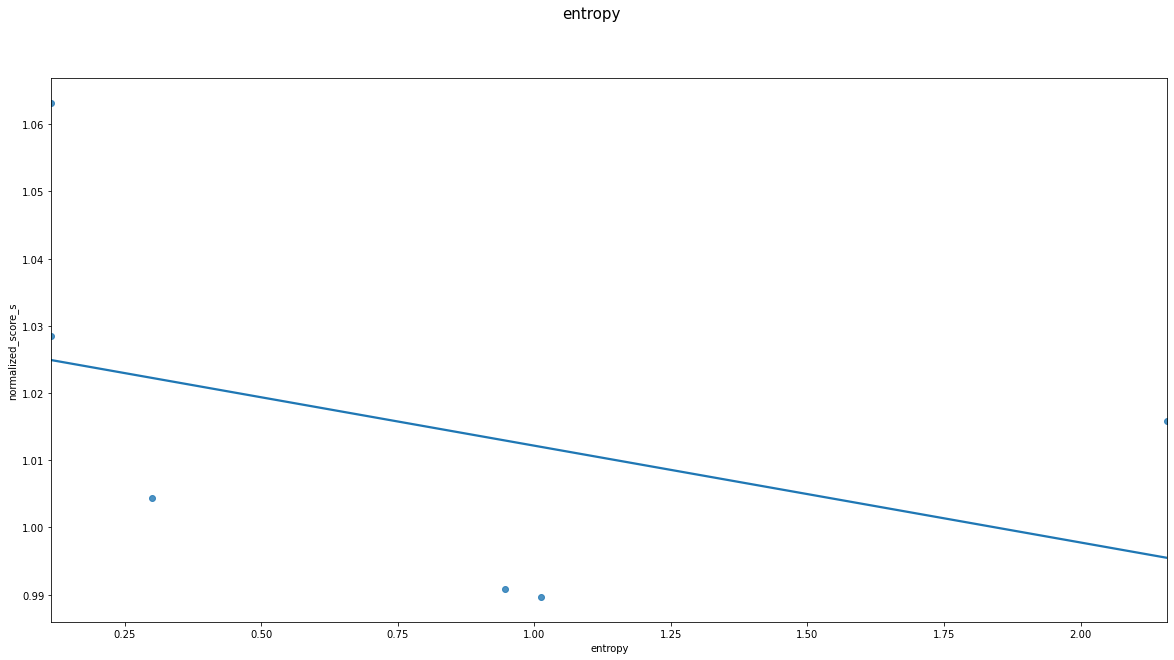

In [129]:
sns.regplot(y = 'normalized_score_s', x = 'entropy', ci = None, data = pSD95pdz3_merged)
plt.suptitle('entropy',size=15)

<h1>View as Subplots<h1>

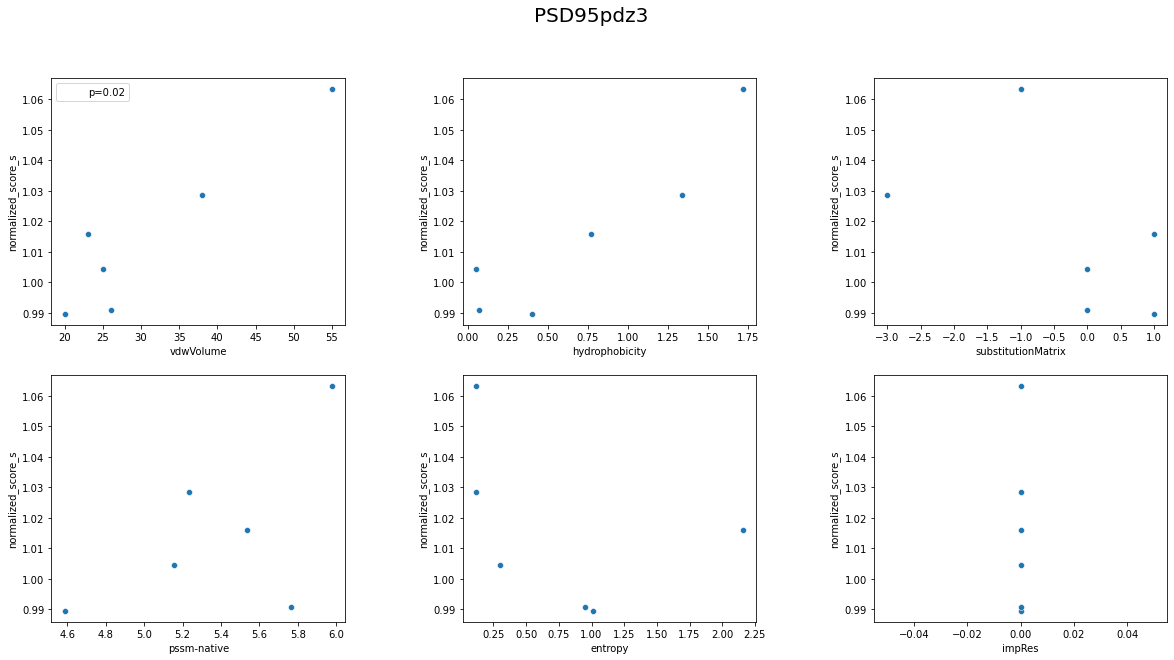

In [131]:
plt.subplots_adjust(wspace=0.4)
plt.suptitle("PSD95pdz3", size=20)

plot1 = plt.subplot(2,3,1)
plot1 = sns.scatterplot(x ='vdwVolume',y = 'normalized_score_s', data=pSD95pdz3_merged)
r, p = stats.pearsonr(e3_ligase_merged["normalized_score_s"],e3_ligase_merged["vdwVolume"] )
phantom, = plot1.plot([], [], linestyle="", alpha=0)
plot1.legend([phantom],['p={:.2f}'.format(p)], fontsize=10)

plot2 = plt.subplot(2,3,2)
plot2 = sns.scatterplot(x ='hydrophobicity', y ='normalized_score_s', data=pSD95pdz3_merged)

plot3 = plt.subplot(2,3,3)
plot3 = sns.scatterplot(x ='substitutionMatrix', y ='normalized_score_s', data=pSD95pdz3_merged)

plot4 = plt.subplot(2,3,4)
plot4 = sns.scatterplot(x ='pssm-native', y ='normalized_score_s', data=pSD95pdz3_merged)

plot5 = plt.subplot(2,3,5)
plot5 = sns.scatterplot(x ='entropy', y ='normalized_score_s', data=pSD95pdz3_merged)

plot6 = plt.subplot(2,3,6)
plot6 = sns.scatterplot(x ='impRes', y ='normalized_score_s', data=pSD95pdz3_merged)

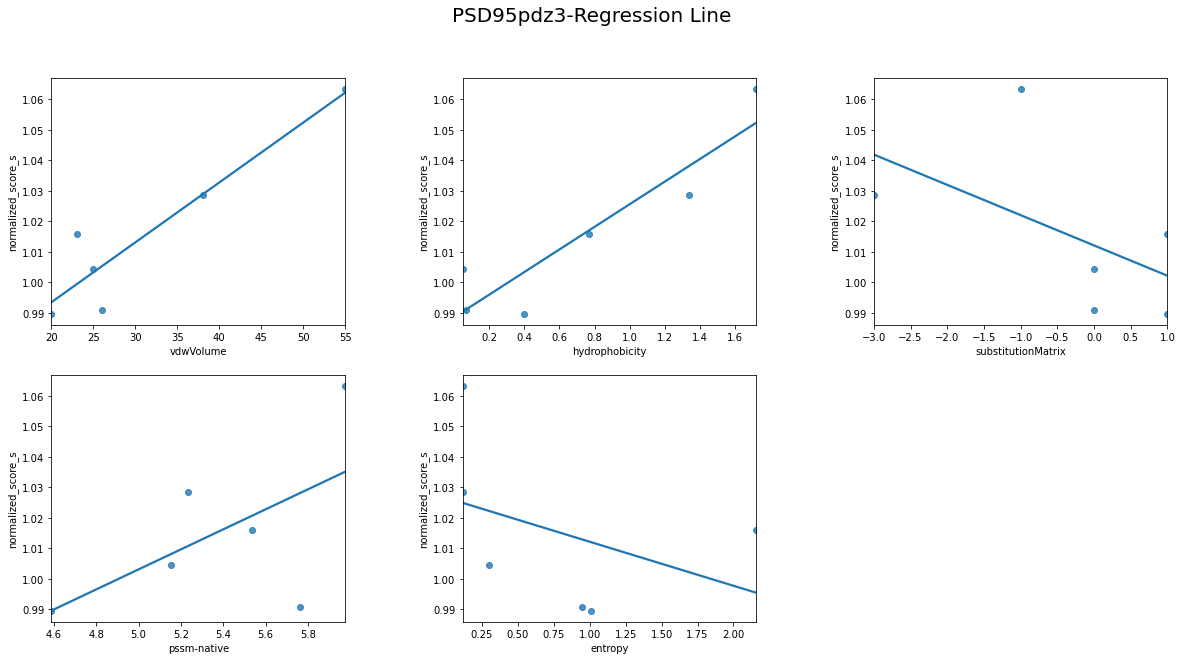

In [136]:
plt.subplots_adjust(wspace=0.4)
plt.suptitle("PSD95pdz3-Regression Line", size=20)

rg1 = plt.subplot(2,3,1)
rg1 = sns.regplot(y = 'normalized_score_s', x = 'vdwVolume', ci = None, data = pSD95pdz3_merged);

rg2 = plt.subplot(2,3,2)
rg2 = sns.regplot(y = 'normalized_score_s', x = 'hydrophobicity', ci = None, data = pSD95pdz3_merged);

rg3 = plt.subplot(2,3,3)
rg3 = sns.regplot(y = 'normalized_score_s', x = 'substitutionMatrix', ci = None, data = pSD95pdz3_merged);

rg4 = plt.subplot(2,3,4)
rg4 = sns.regplot(y = 'normalized_score_s', x = 'pssm-native', ci = None, data = pSD95pdz3_merged);

rg5 = plt.subplot(2,3,5)
rg5 = sns.regplot(y = 'normalized_score_s', x = 'entropy', ci = None, data = pSD95pdz3_merged);

In [ ]:
##INCOMPLETE,STILL IN PROGRESS